In [1]:
import matplotlib.pyplot as plt   
import numpy as np
import gaps_online as go

Can't load RUST API! No module named 'rust_dataclasses'


In [2]:
import os
import scipy as sp

In [9]:
fig = plt.figure(1)
# change the fonts
plt.rc('font',family='serif')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.rm'] = 'serif'
plt.rcParams['mathtext.it'] = 'serif:italic'
plt.rcParams['mathtext.bf'] = 'serif:bold'
plt.rcParams['font.size'] = 12.5
plt.rcParams['axes.linewidth'] = 1

def plotroot(dat, x1, x2, xlab, ylab, title, ylim, xlo=0, log=False):

    fig,ax = plt.subplots(figsize=(9,7))

    # define the bins; 100 evenly spaced between -5 and 5
    bins = np.linspace(x1,x2,100)
    
    # plot the data, using our bin edges
    plt.hist(dat,bins,histtype="step",color="blue")

    # Make a box of parameters in the top right
    bboxd = dict(boxstyle="square", facecolor="w")
    nentries = len(dat)
    mu = np.mean(dat)
    sigma = np.std(dat-mu)
    tbtext = ("Entries   {0:d}\n".format(nentries) + "Mean   {0:.4f}\n".format(mu) + "RMS   {0:.5f}".format(sigma))
    plt.text(.9, 1., tbtext, transform=ax.transAxes, fontsize=10, verticalalignment="top", horizontalalignment="center", bbox=bboxd)

    # Label axes and graph title
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    
    if log:
        plt.yscale("log")

    # Change ticks on axes
    ax.minorticks_on()
    ax.tick_params(axis="both",which="both",direction="in")

    # Set x-axis limits
    plt.xlim(xlo,x2)
    plt.ylim(0,ylim)

    # Efficiently use 5 x 5 space
    plt.tight_layout()
    #plt.savefig(title + ".png")
    plt.show()


def plotroot_trunc(dat, x1, x2, xlab, ylab, title, ylim, xlo=0, log=False):

    fig,ax = plt.subplots(figsize=(9,7))

    # define the bins; 100 evenly spaced between -5 and 5
    bins = np.linspace(x1,x2,100)

    # Make a box of parameters in the top right
    bboxd = dict(boxstyle="square", facecolor="w")
    nentries = len(dat)
    mu = np.mean(dat)
    sigma = np.std(dat-mu)

    datarr = np.array(dat)
    trunc1 = datarr[datarr < mu+4*sigma]
    trunc = trunc1[trunc1 > mu-4*sigma]

    mu_t = np.mean(trunc)
    sigma_t = np.std(trunc-mu)
    nentries_t = trunc.size

    outliers = nentries-nentries_t

    # plot the data, using our bin edges
    plt.hist(trunc,bins,histtype="step",color="blue")
    
    tbtext = ("Entries   {0:d}\n".format(nentries_t) + "Mean   {0:.3f}\n".format(mu_t) + "RMS   {0:.5f}\n".format(sigma_t) + "Outliers   {0:d}".format(outliers) )
    plt.text(.9, 1., tbtext, transform=ax.transAxes, fontsize=10, verticalalignment="top", horizontalalignment="center", bbox=bboxd)

    # Label axes and graph title
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title(title)
    
    if log:
        plt.yscale("log")

    # Change ticks on axes
    ax.minorticks_on()
    ax.tick_params(axis="both",which="both",direction="in")

    # Set x-axis limits
    plt.xlim(xlo,x2)
    plt.ylim(0,ylim)

    # Efficiently use 5 x 5 space
    plt.tight_layout()
    #plt.savefig(title + ".png")
    plt.show()



<Figure size 640x480 with 0 Axes>

In [7]:
# Current RBs in the GAPS instrument

files = ["01", "02", "03", "04", "05", "06", "07", "08", "09", "11", "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24", "25", "26", "27", "28", "29", "30", "31", "32", "33", "34", "35", "36", "39", "40", "41", "42", "44", "46"]
len(files)


40

In [13]:
#calfolder_string = "/mnt/tof-nas/nevis-data/tofdata/run/127/"
calfolder_string = "/mnt/tof-nas/nevis-data/tofdata/calibration/240426/"
filename = sorted(os.listdir(calfolder_string))
filename

['RB01_2024_04_26-17_50_37.cali.tof.gaps',
 'RB02_2024_04_26-17_50_29.cali.tof.gaps',
 'RB03_2024_04_26-17_50_41.cali.tof.gaps',
 'RB04_2024_04_26-17_50_27.cali.tof.gaps',
 'RB05_2024_04_26-17_50_25.cali.tof.gaps',
 'RB06_2024_04_26-17_50_28.cali.tof.gaps',
 'RB07_2024_04_26-17_50_25.cali.tof.gaps',
 'RB08_2024_04_26-17_50_37.cali.tof.gaps',
 'RB09_2024_04_26-17_50_38.cali.tof.gaps',
 'RB11_2024_04_26-17_50_36.cali.tof.gaps',
 'RB13_2024_04_26-17_50_41.cali.tof.gaps',
 'RB14_2024_04_26-17_50_41.cali.tof.gaps',
 'RB15_2024_04_26-17_50_41.cali.tof.gaps',
 'RB16_2024_04_26-17_50_38.cali.tof.gaps',
 'RB17_2024_04_26-17_50_25.cali.tof.gaps',
 'RB18_2024_04_26-17_50_37.cali.tof.gaps',
 'RB19_2024_04_26-17_30_54.cali.tof.gaps',
 'RB20_2024_04_26-17_30_53.cali.tof.gaps',
 'RB21_2024_04_26-17_50_42.cali.tof.gaps',
 'RB22_2024_04_26-17_50_36.cali.tof.gaps',
 'RB23_2024_04_26-17_50_40.cali.tof.gaps',
 'RB24_2024_04_26-17_50_40.cali.tof.gaps',
 'RB25_2024_04_26-17_50_37.cali.tof.gaps',
 'RB26_2024

# Plot Calibration Constant Distributions

## TCAL: timing bin widths

In [14]:
tcal_avg = []
tcal_std = []

for ind in range(len(files)):

    print(filename[ind])

    cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    
    for j in range(9):
        
        tcal_avg.append(np.mean(cal.t_bin[j]))
        tcal_std.append(np.std(cal.t_bin[j]))

        #if j==4 and ind == 0:
            #plotroot(cal.t_bin[j],0,5,"tbin value","tbin count","Cell width RB1 ch5",500,xlo=0, log=True)
            
        if (np.std(cal.t_bin[j]) < 0.081) or (np.std(cal.t_bin[j]) > 0.14):
            #plotroot(cal.t_bin[j],0,5,"tbin value","tbin count","Cell width RB" + str(cal.rb_id) +" ch" + str(j+1),500,xlo=0,log=True)
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": diff tcal std = " + str(np.std(cal.t_bin[j])))


        if (np.mean(cal.t_bin[j]) < 0.48824):
            #plotroot(cal.t_bin[j],0,5,"tbin value","tbin count","Cell width RB" + str(cal.rb_id) +" ch" + str(j+1),500,xlo=0,log=True)
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": diff tcal mean = " + str(np.mean(cal.t_bin[j])))







RB01_2024_04_26-17_50_37.cali.tof.gaps
RB02_2024_04_26-17_50_29.cali.tof.gaps
RB03_2024_04_26-17_50_41.cali.tof.gaps
RB04_2024_04_26-17_50_27.cali.tof.gaps
RB05_2024_04_26-17_50_25.cali.tof.gaps
RB06_2024_04_26-17_50_28.cali.tof.gaps
RB07_2024_04_26-17_50_25.cali.tof.gaps
RB08_2024_04_26-17_50_37.cali.tof.gaps
RB09_2024_04_26-17_50_38.cali.tof.gaps
RB11_2024_04_26-17_50_36.cali.tof.gaps
RB13_2024_04_26-17_50_41.cali.tof.gaps
RB14_2024_04_26-17_50_41.cali.tof.gaps
RB15_2024_04_26-17_50_41.cali.tof.gaps
RB16_2024_04_26-17_50_38.cali.tof.gaps
RB17_2024_04_26-17_50_25.cali.tof.gaps
RB18_2024_04_26-17_50_37.cali.tof.gaps
RB19_2024_04_26-17_30_54.cali.tof.gaps
RB20_2024_04_26-17_30_53.cali.tof.gaps
RB21_2024_04_26-17_50_42.cali.tof.gaps
RB22_2024_04_26-17_50_36.cali.tof.gaps
RB23_2024_04_26-17_50_40.cali.tof.gaps
RB24_2024_04_26-17_50_40.cali.tof.gaps
RB25_2024_04_26-17_50_37.cali.tof.gaps
RB26_2024_04_26-17_50_37.cali.tof.gaps
RB27_2024_04_26-17_50_41.cali.tof.gaps
RB28_2024_04_26-17_50_23.

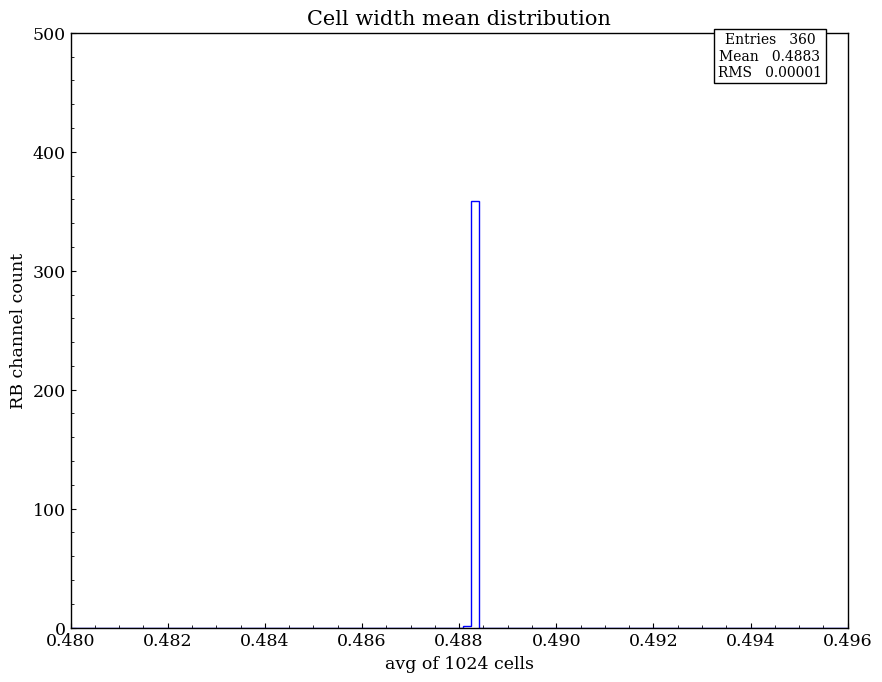

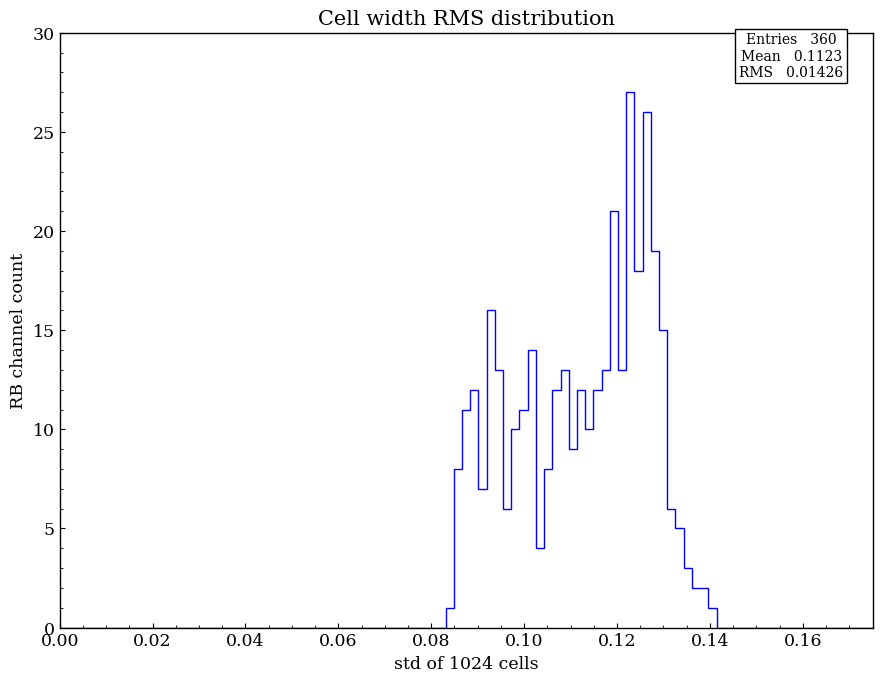

In [15]:
plotroot(tcal_avg,0.48,0.496,"avg of 1024 cells","RB channel count","Cell width mean distribution",500,xlo=0.48)
plotroot(tcal_std,0,0.175,"std of 1024 cells","RB channel count","Cell width RMS distribution",30,xlo=0)

if any boards have low RMS or mean not equal to 0.488, plot the tbin distribution for their channels below:

RB01_2024_04_23-23_59_37.cali.tof.gaps


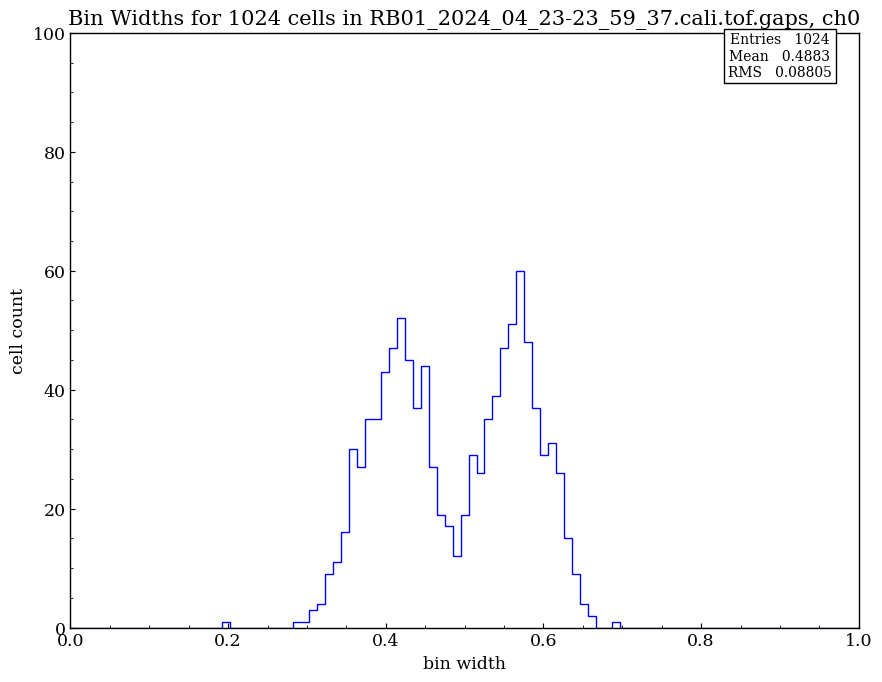

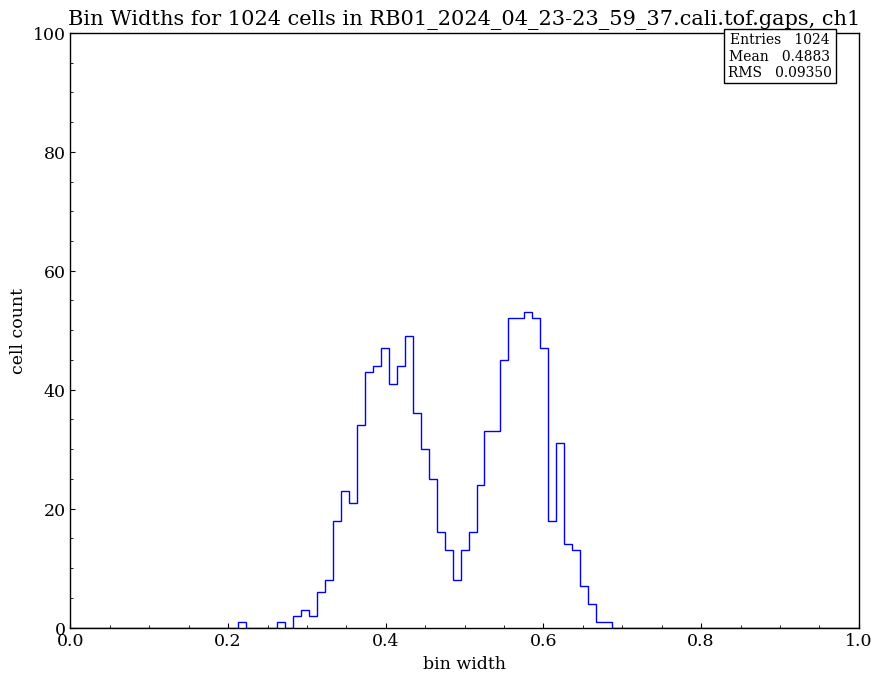

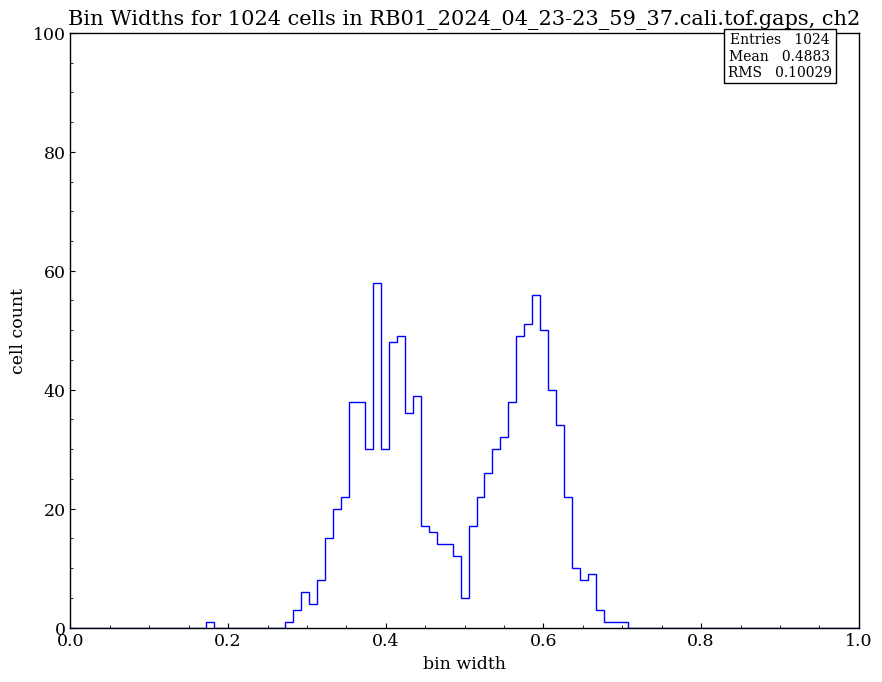

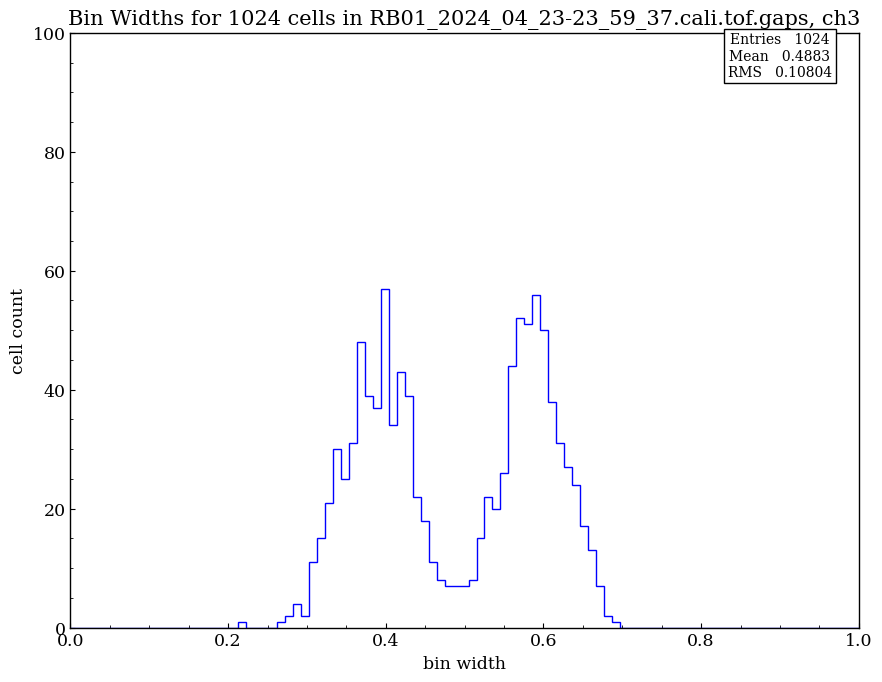

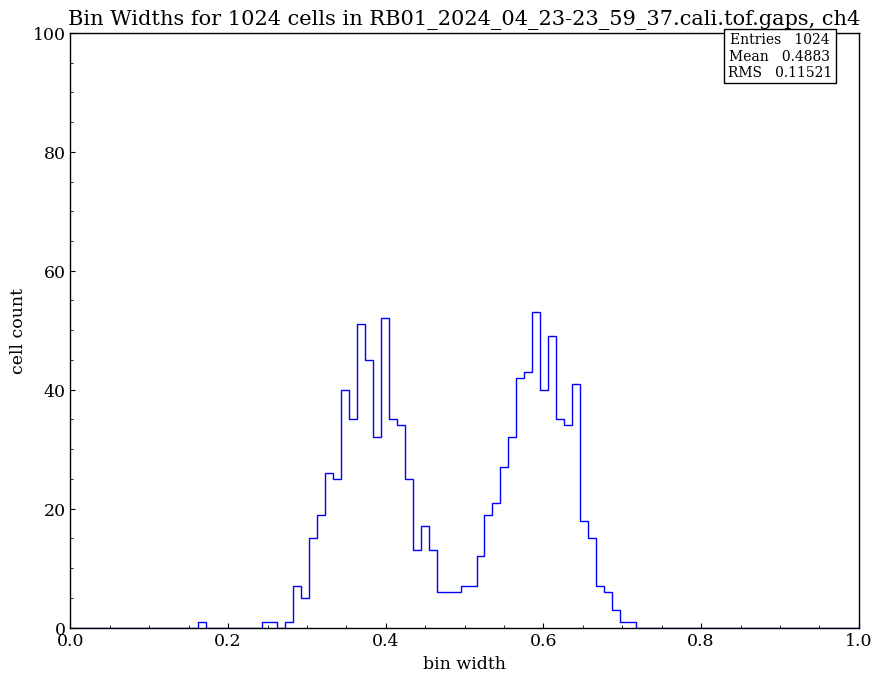

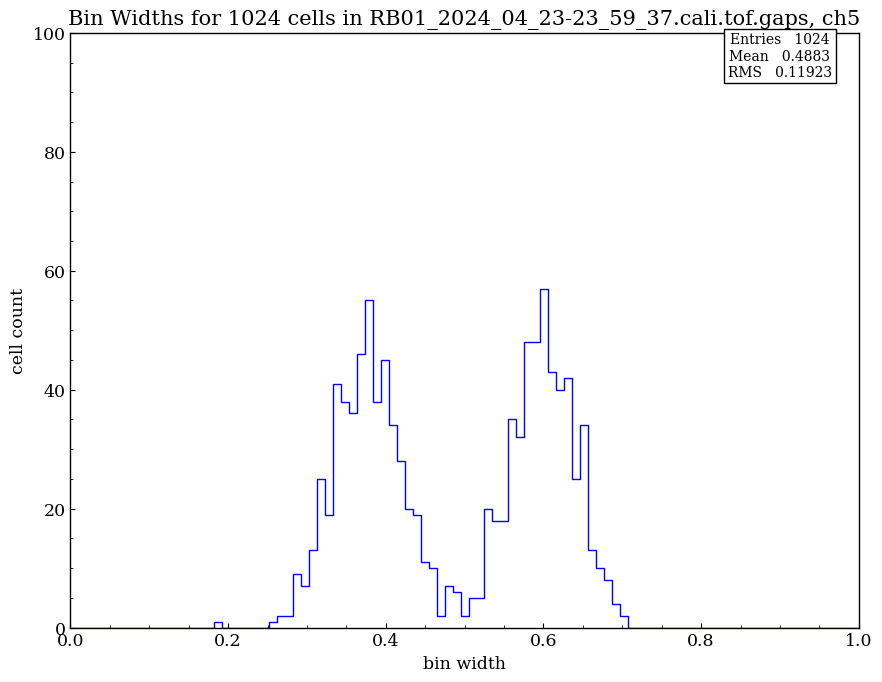

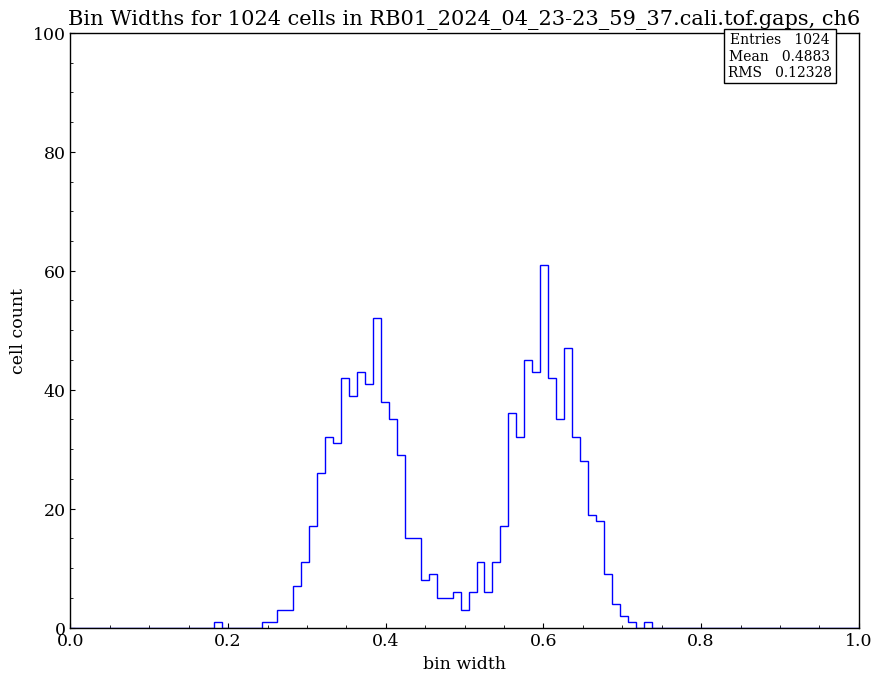

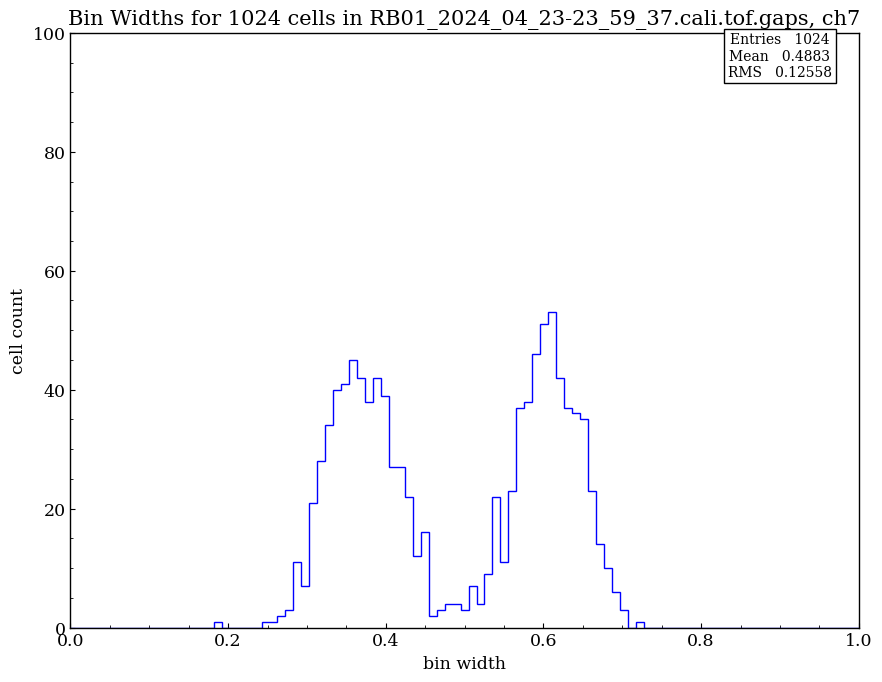

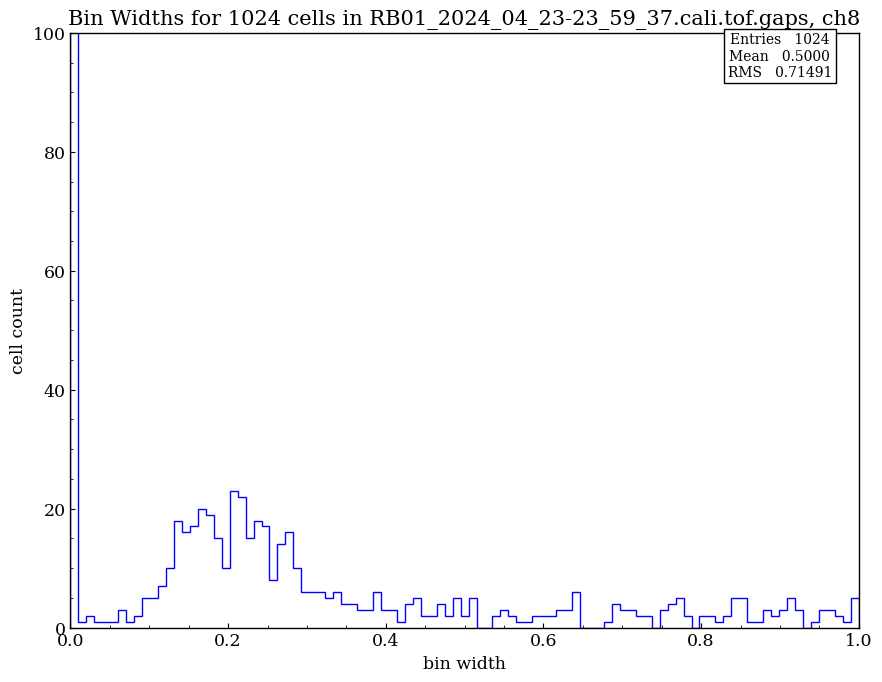

RB27_2024_04_23-23_59_41.cali.tof.gaps


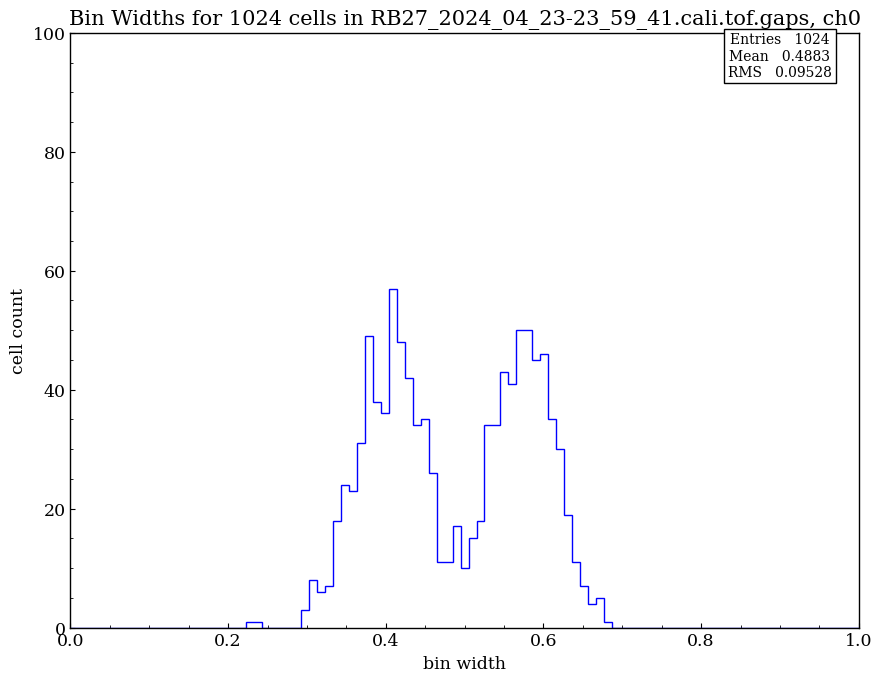

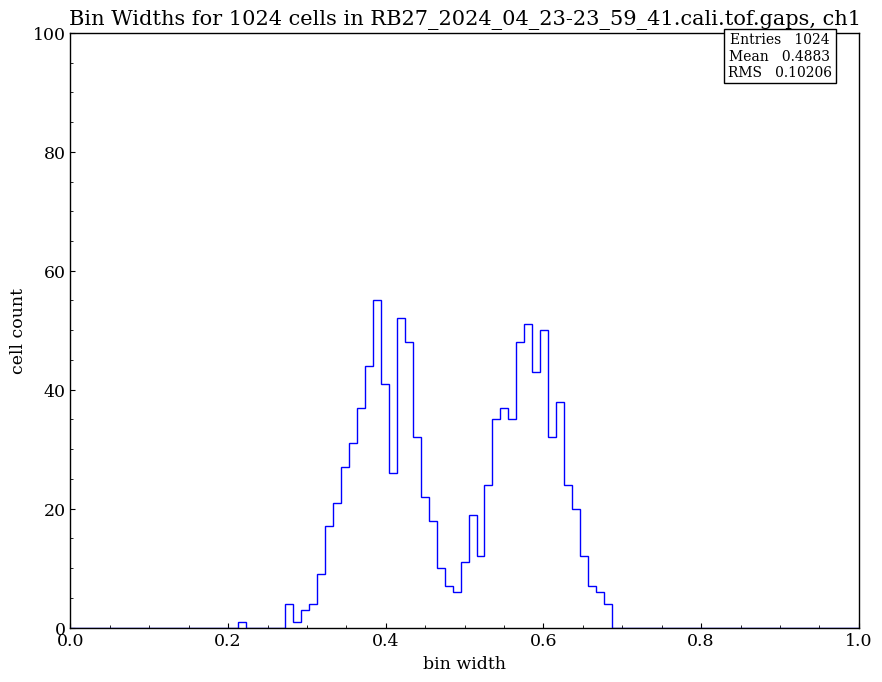

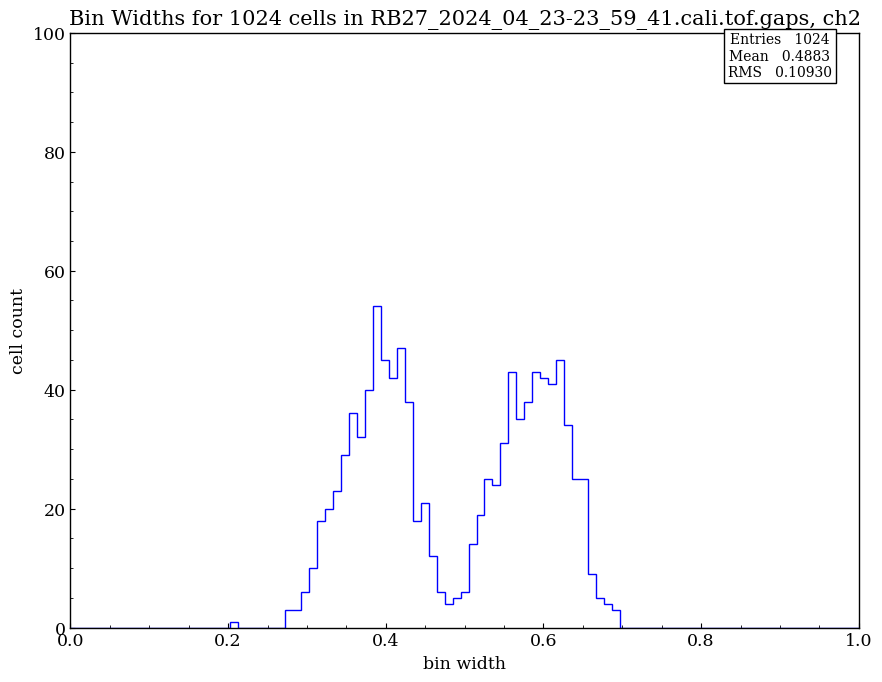

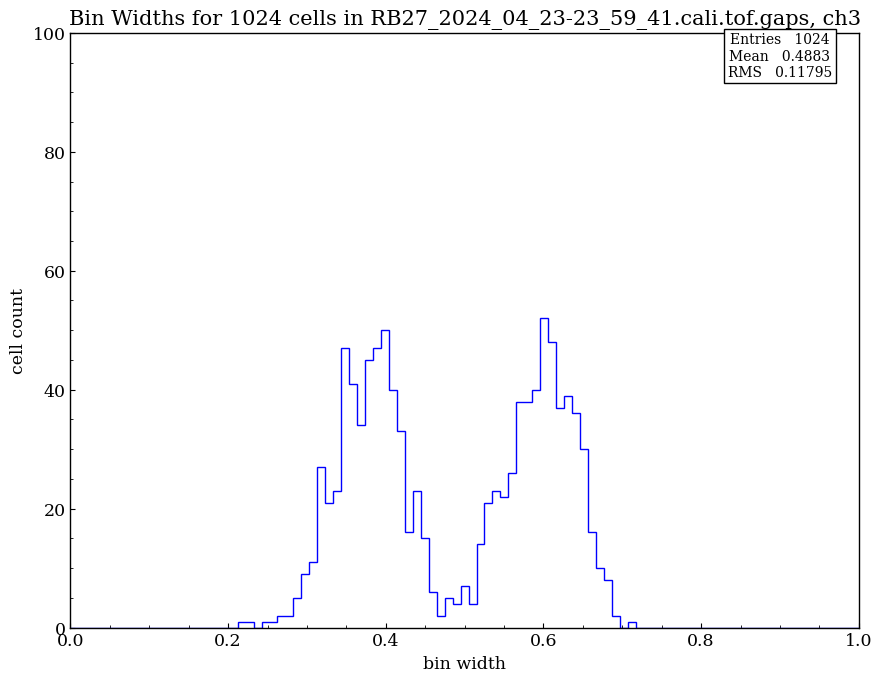

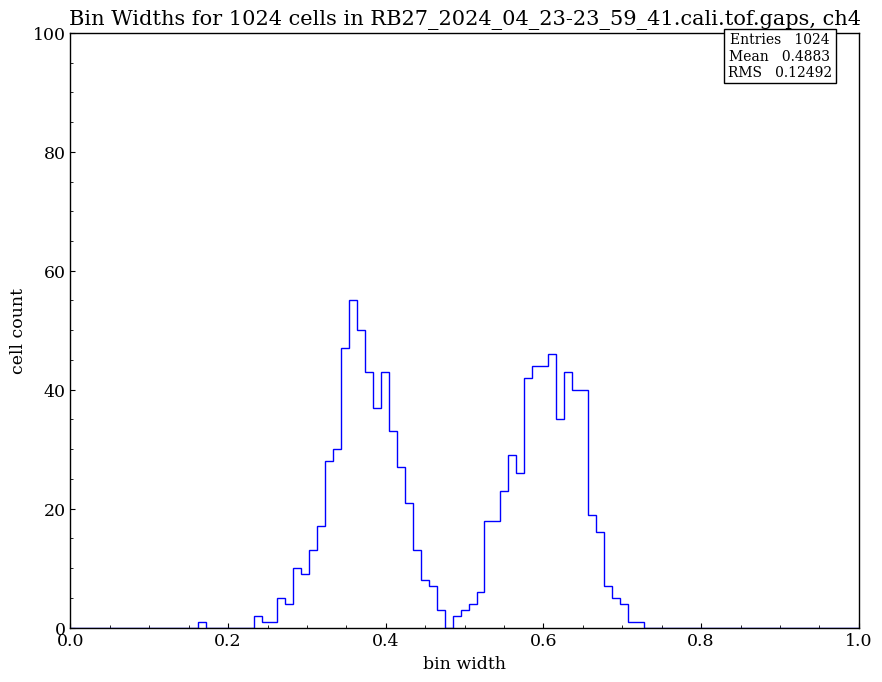

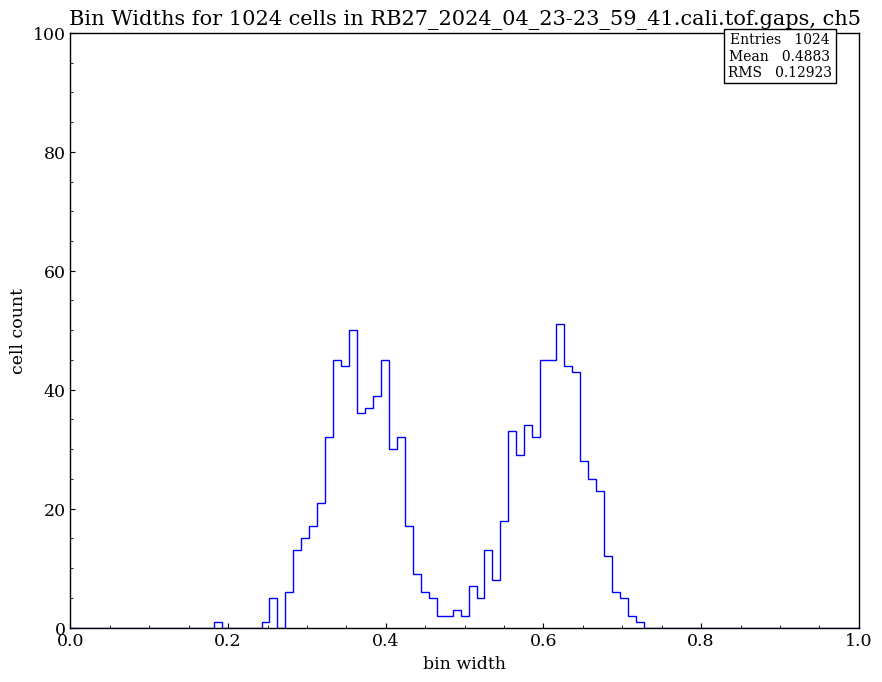

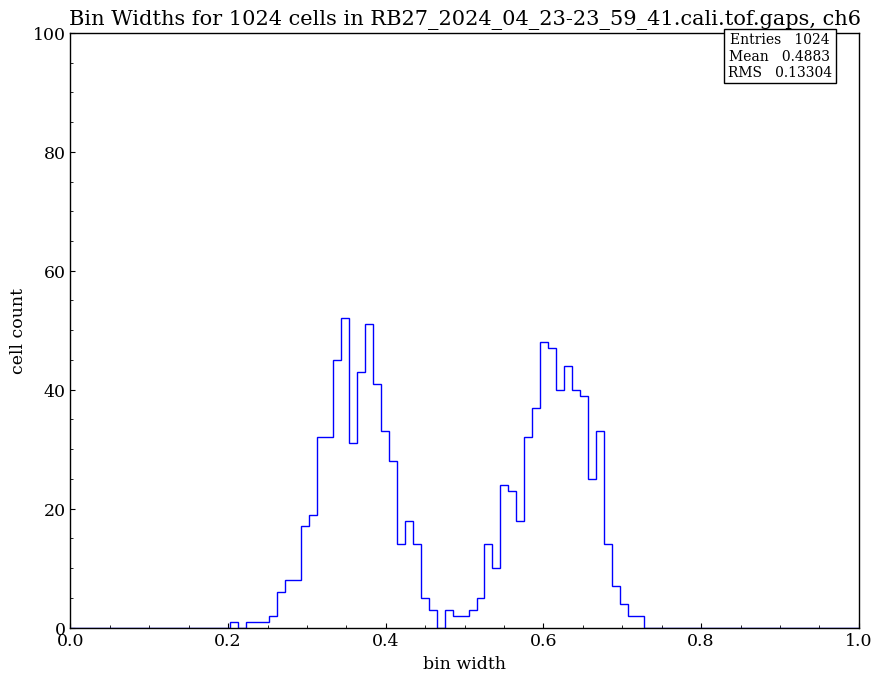

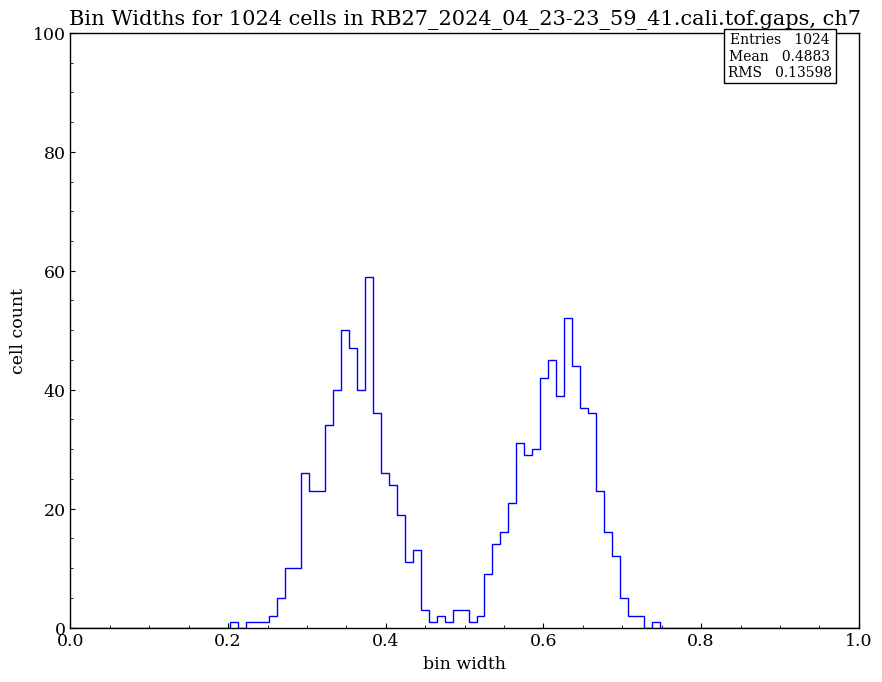

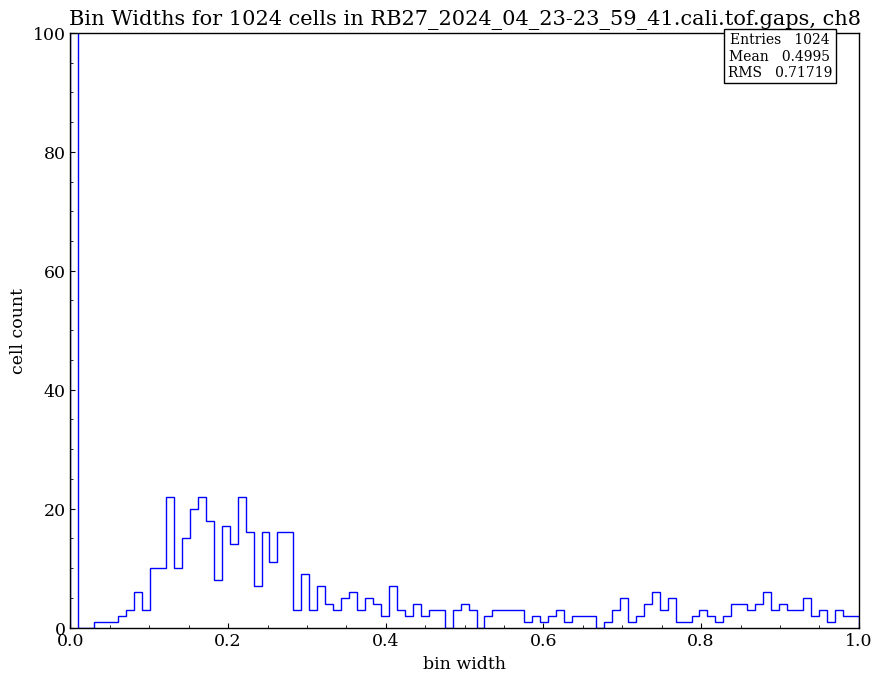

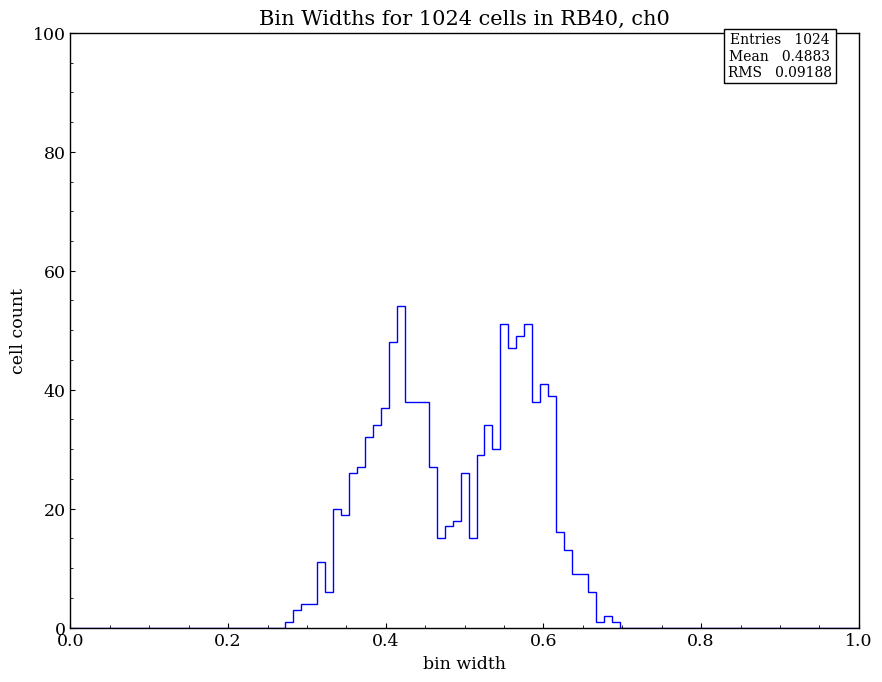

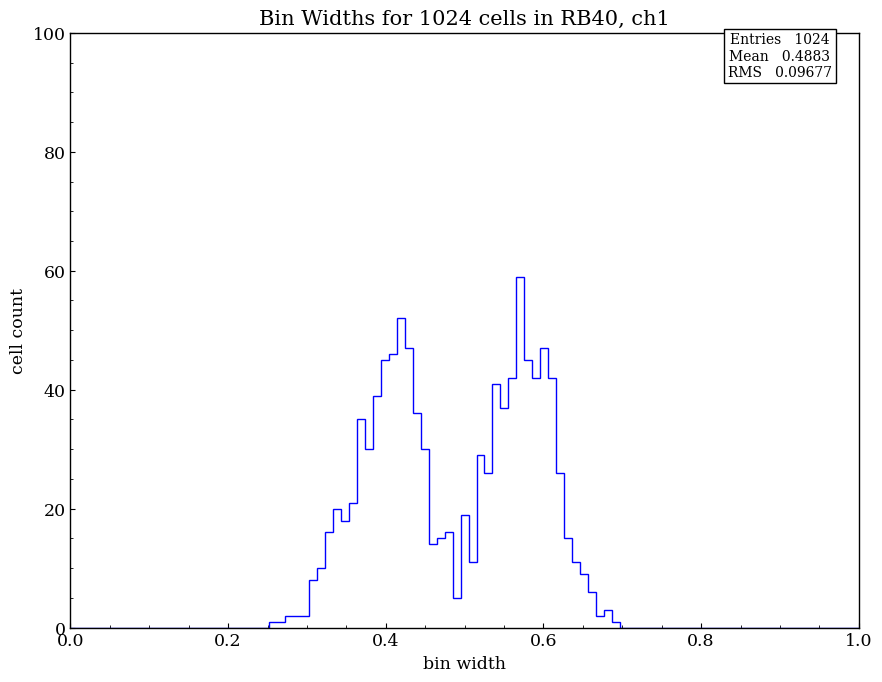

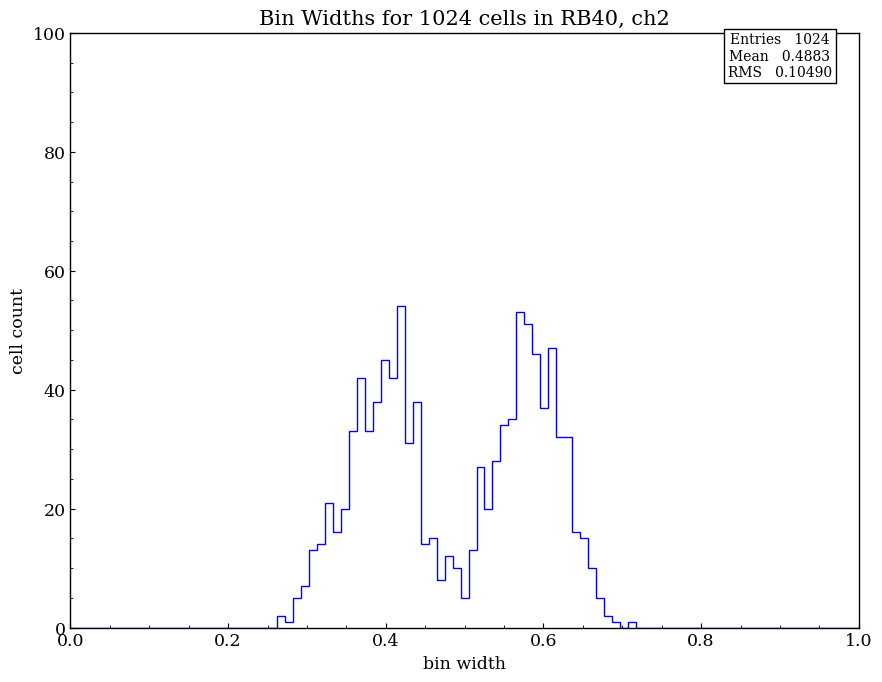

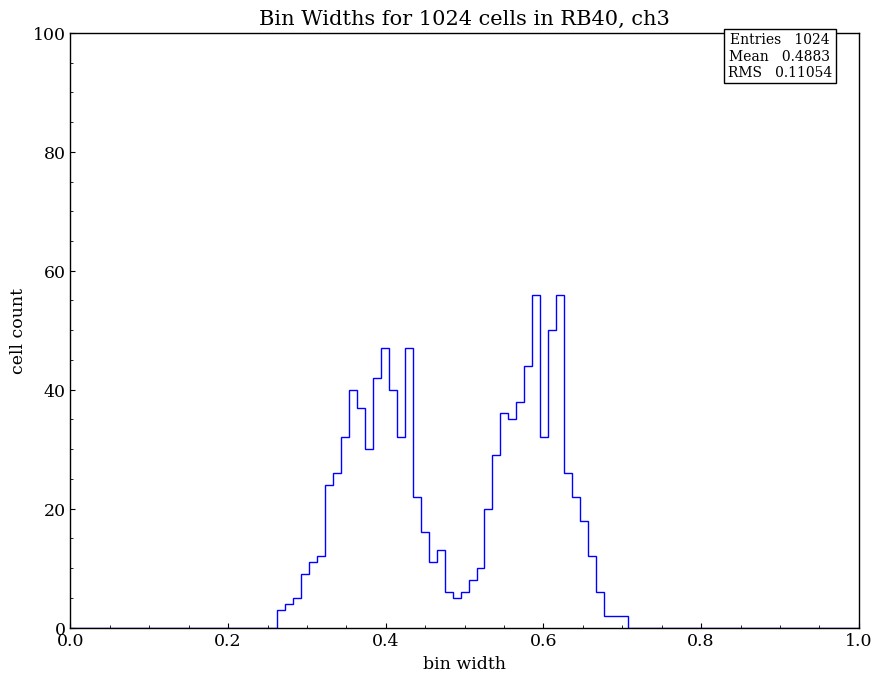

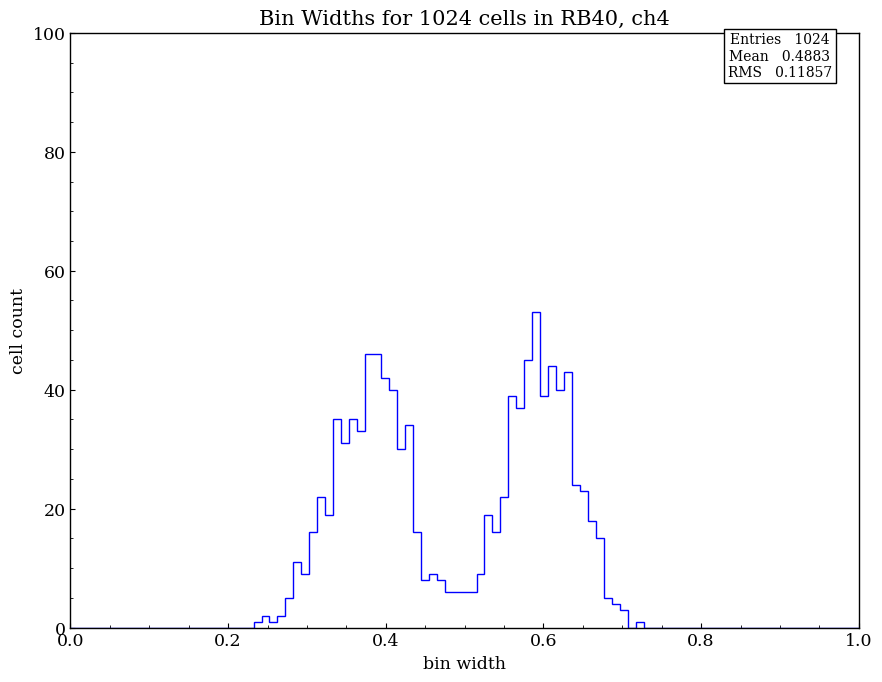

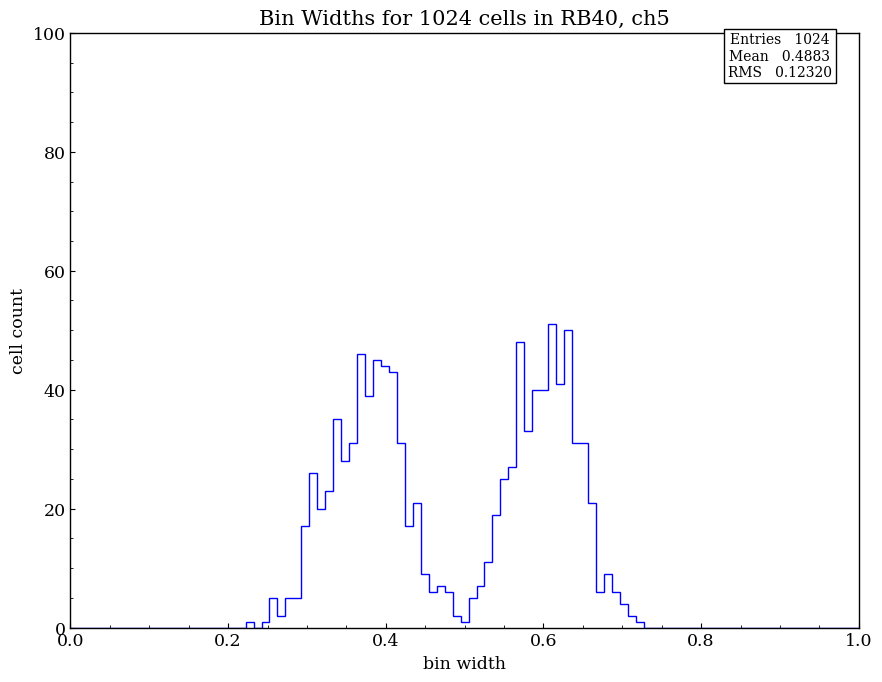

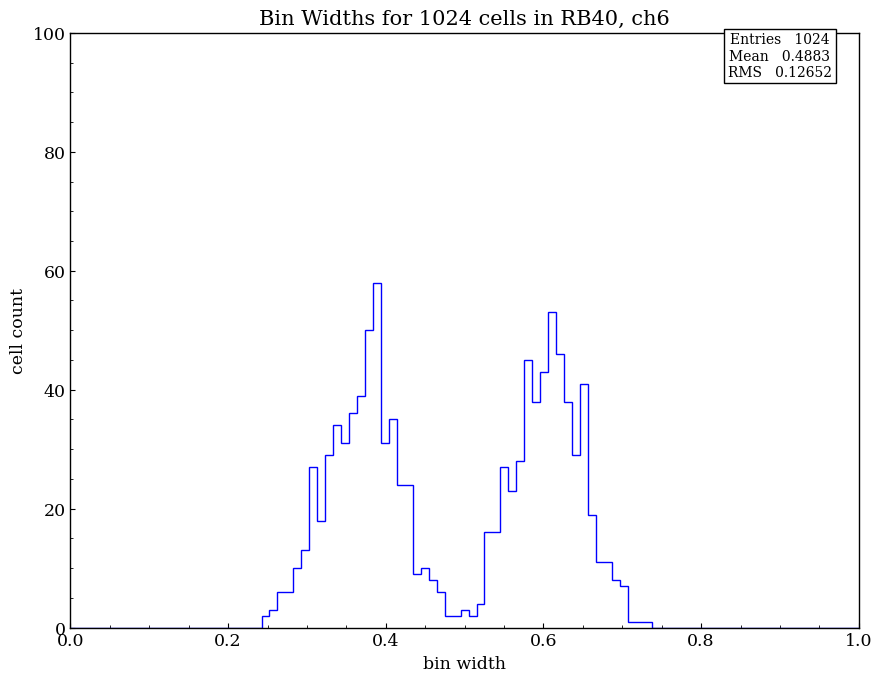

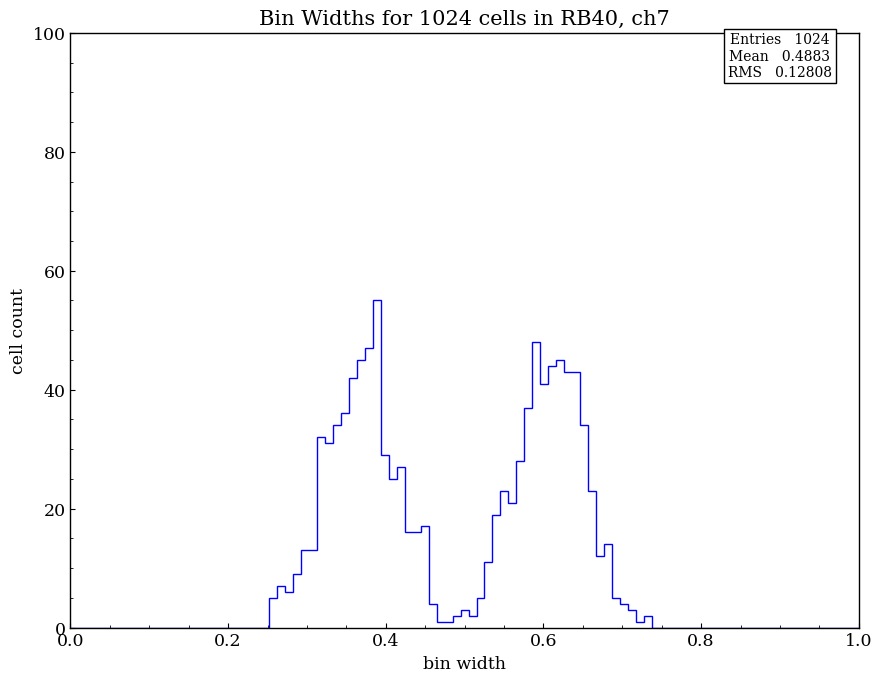

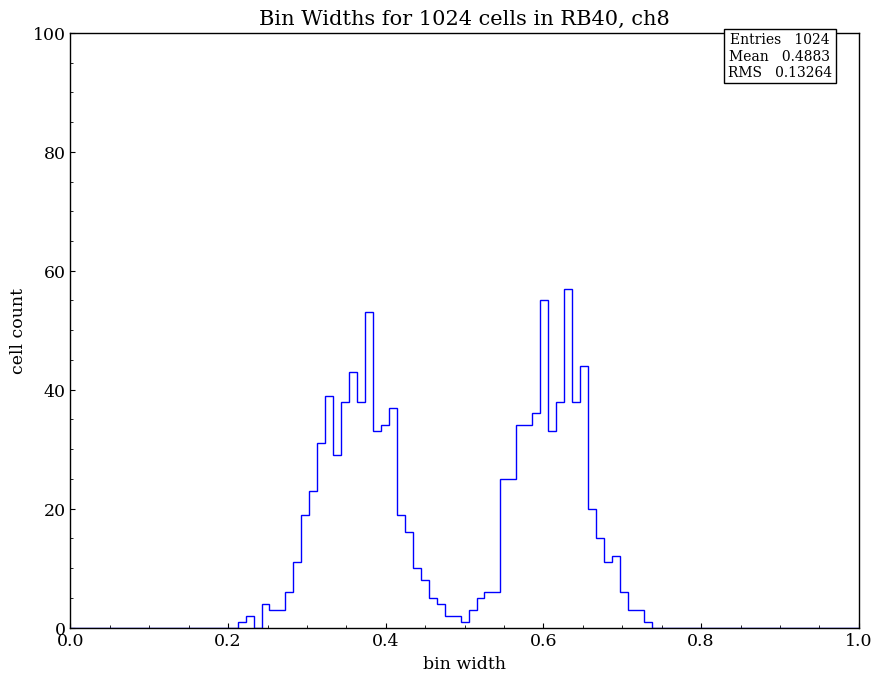

In [55]:
ind=0
print(filename[ind])
cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])

for j in range(9):

    plotroot(cal.t_bin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in " +filename[ind]+ ", ch" + str(j),100)


ind=24
print(filename[ind])
cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])

for j in range(9):

    plotroot(cal.t_bin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in " +filename[ind]+ ", ch" + str(j),100)


cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[35])

for j in range(9):

    plotroot(cal.t_bin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in RB40, ch" + str(j),100)



compare to distributions for "good" data (below)

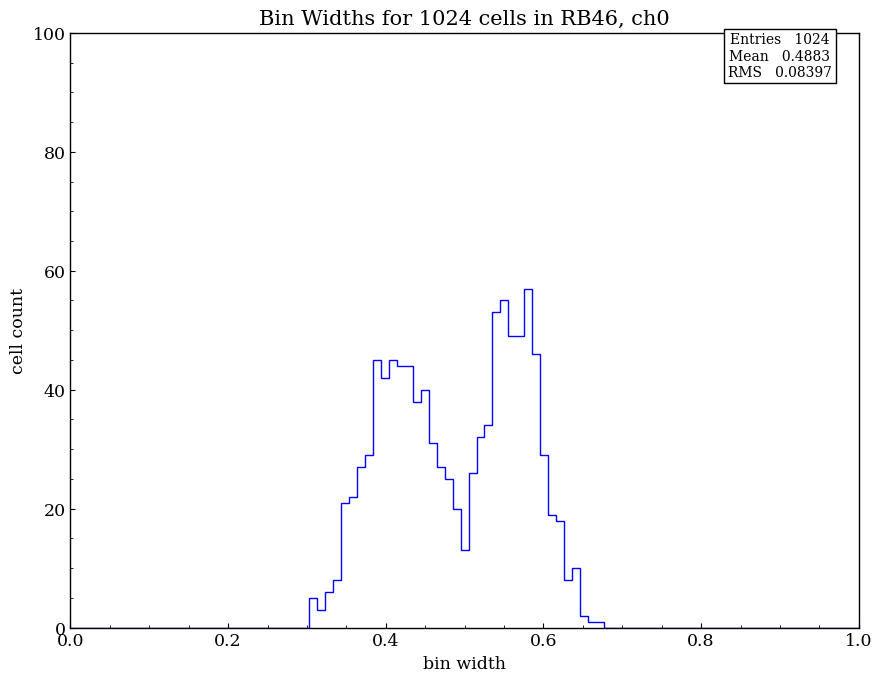

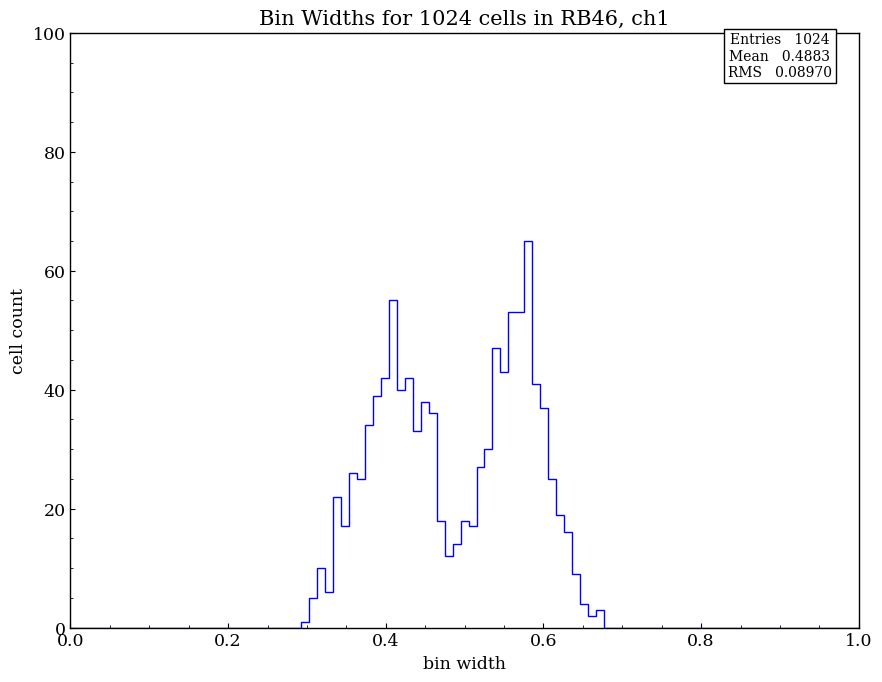

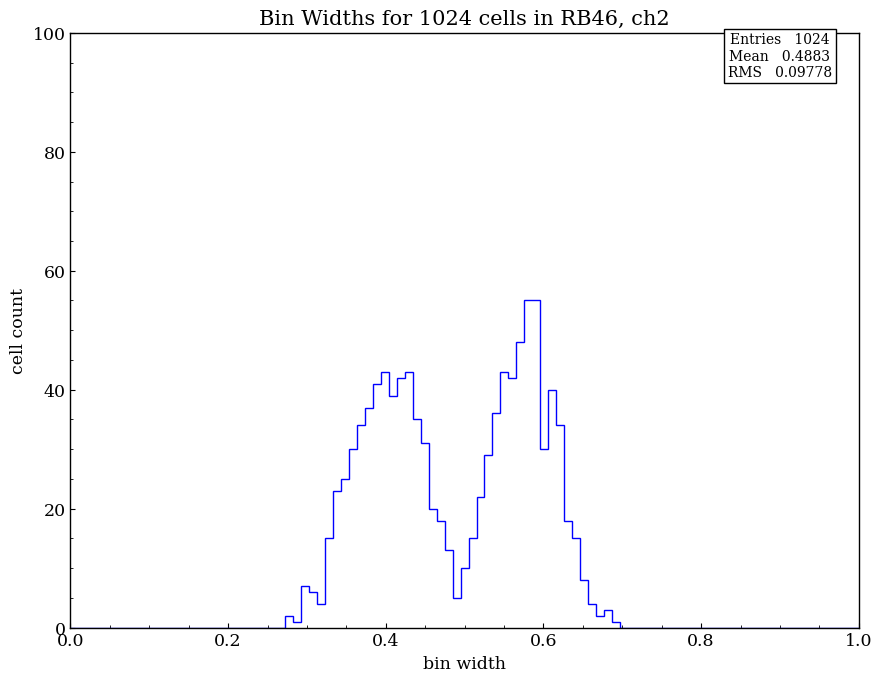

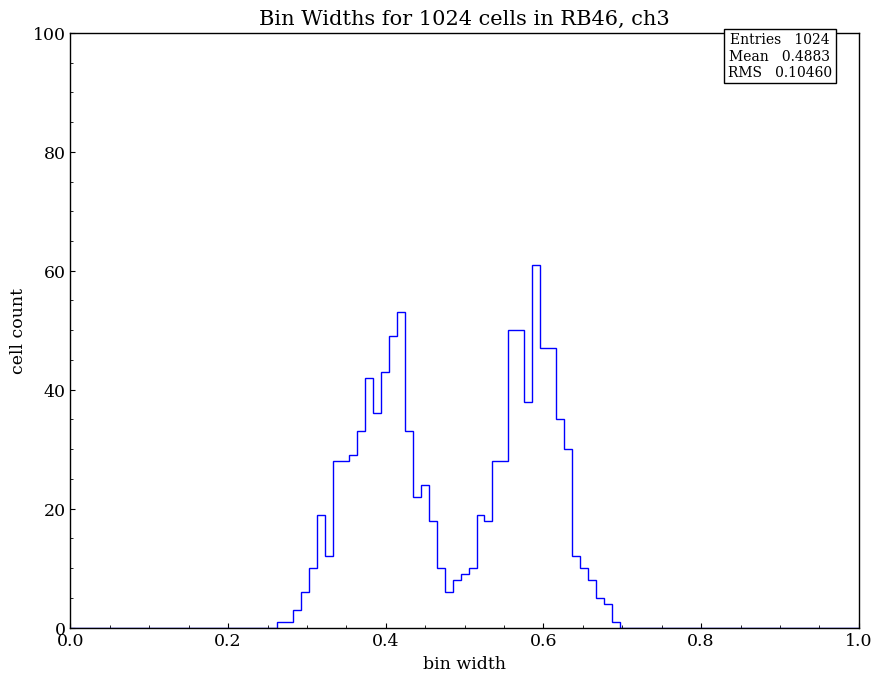

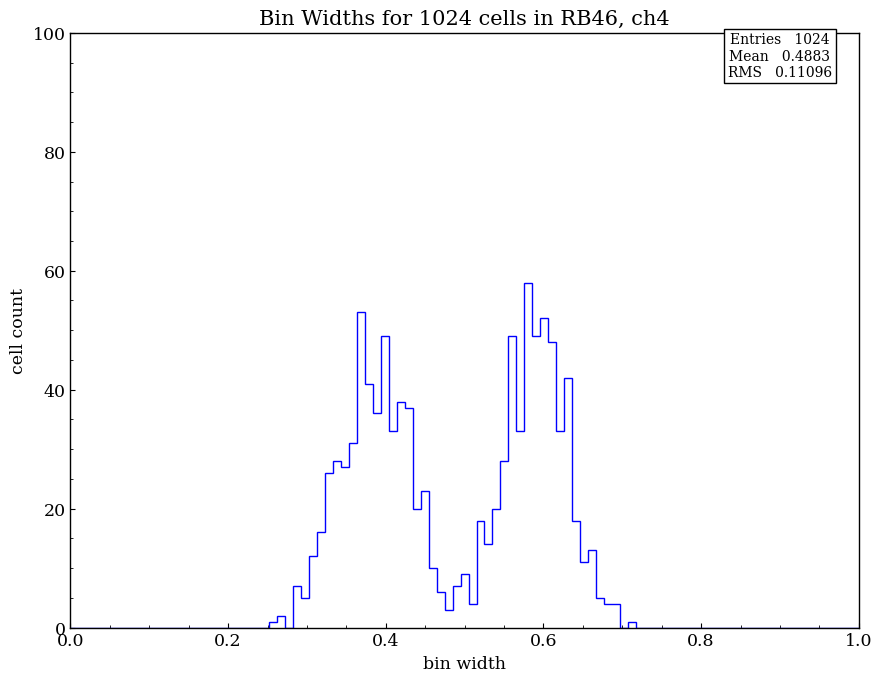

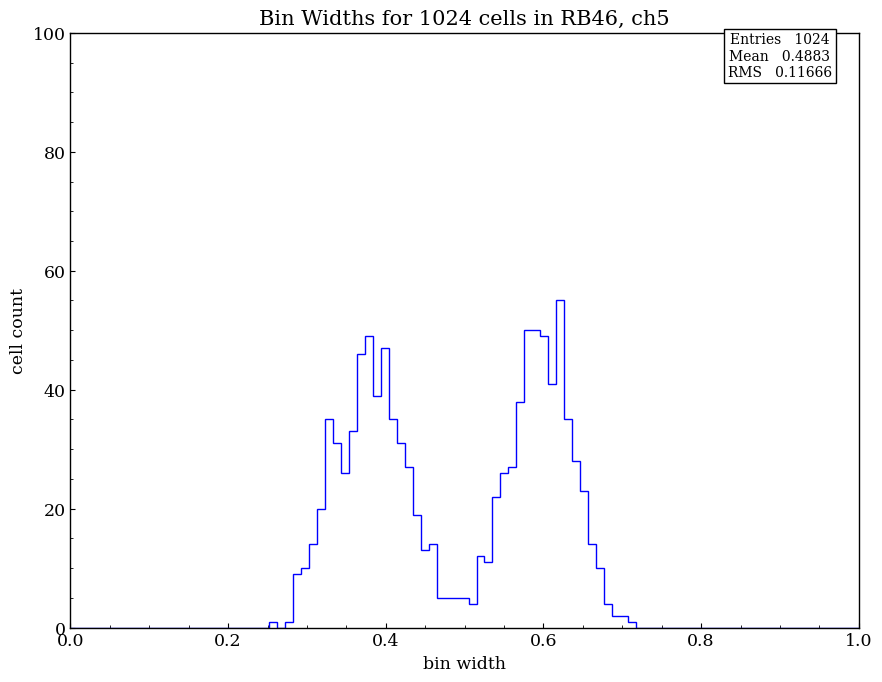

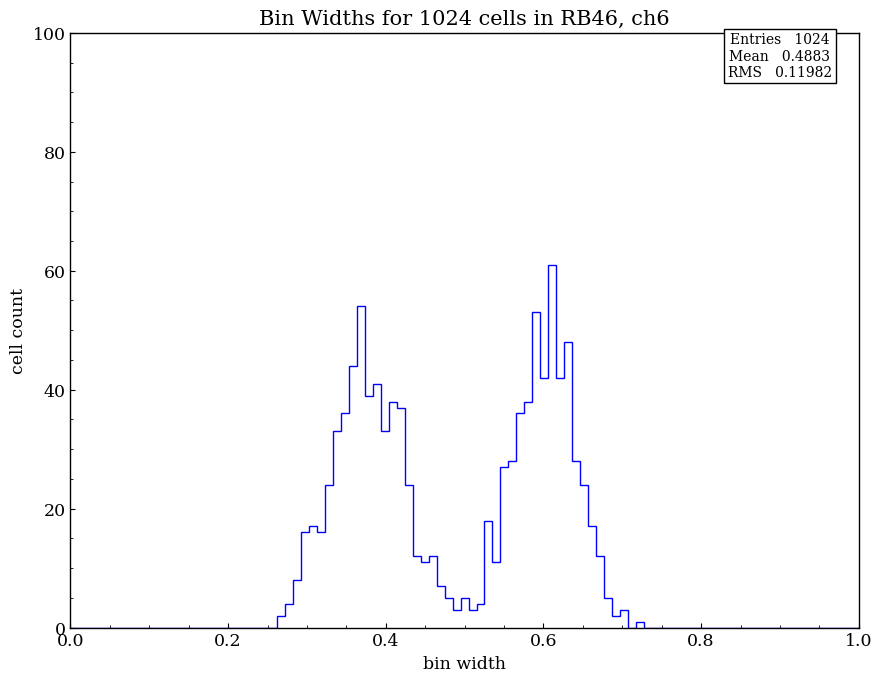

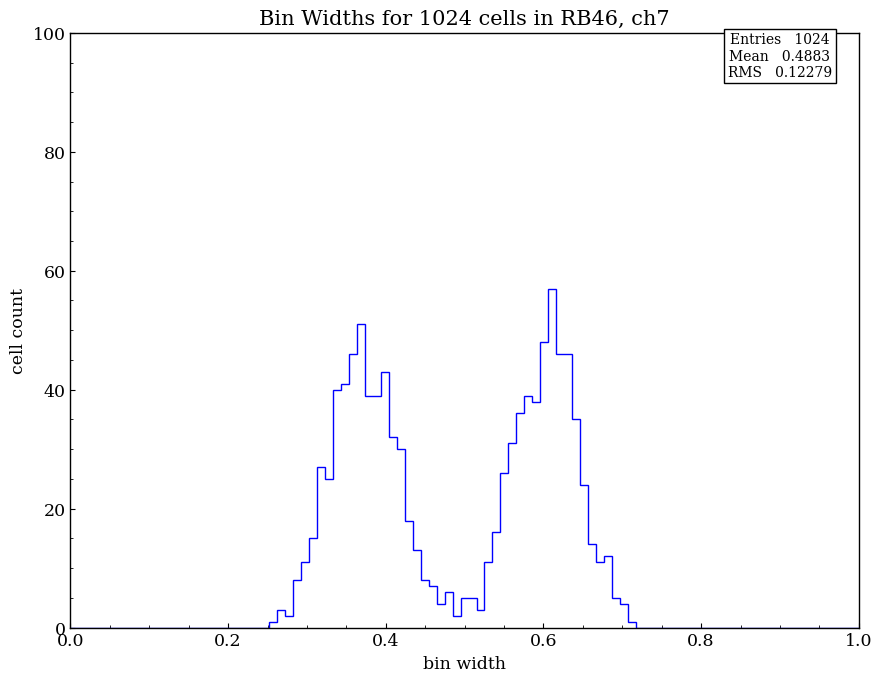

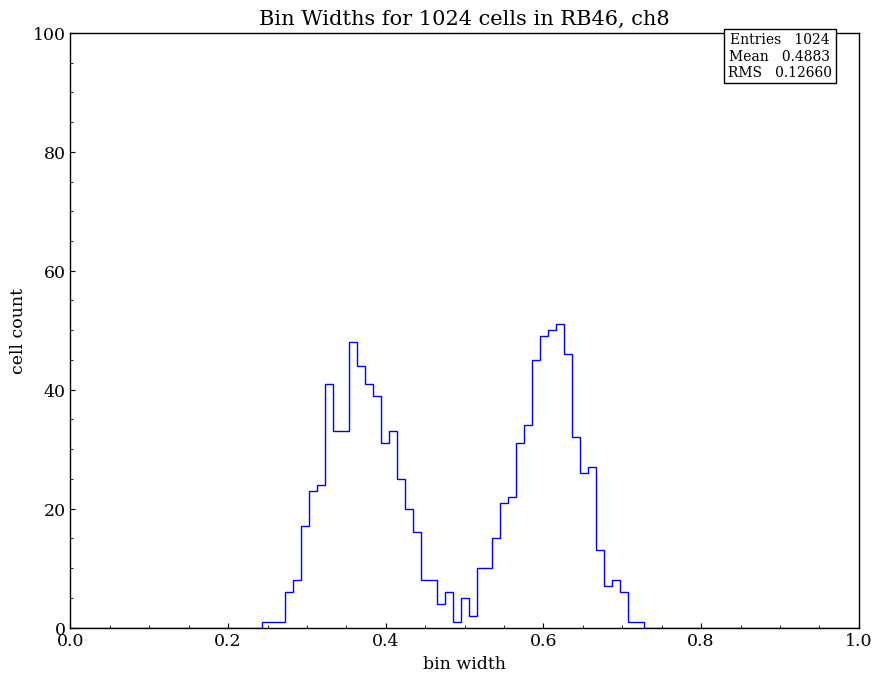

In [22]:
cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[38])

for j in range(9):

    plotroot(cal.t_bin[j],0,1,"bin width","cell count","Bin Widths for 1024 cells in RB46, ch" + str(j),100)

## VCAL1: fixed ADC offset

In [16]:
vcal_1_avg = []
vcal_1_std = []

for ind in range(len(files)):

    print(filename[ind])

    cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    
    for j in range(9):

        vcal_1_avg.append(np.mean(cal.v_offsets[j]))
        vcal_1_std.append(np.std(cal.v_offsets[j]))

       # if j==4 and ind == 0:
       #     plotroot(cal.v_offsets[j],3500,6000,"bin value","count","fixed ADC offset RB1 ch5",100,xlo=3500)

        if (np.mean(cal.v_offsets[j]) > 5200):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_offset mean = " + str(np.mean(cal.v_offsets[j])))
        if (np.mean(cal.v_offsets[j]) < 4200):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": low v_offset mean = " + str(np.mean(cal.v_offsets[j])))
        if (np.std(cal.v_offsets[j]) > 150):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_offset std = " + str(np.std(cal.v_offsets[j])))

RB01_2024_04_26-17_50_37.cali.tof.gaps
RB02_2024_04_26-17_50_29.cali.tof.gaps
RB03_2024_04_26-17_50_41.cali.tof.gaps
RB04_2024_04_26-17_50_27.cali.tof.gaps
RB05_2024_04_26-17_50_25.cali.tof.gaps
RB06_2024_04_26-17_50_28.cali.tof.gaps
RB07_2024_04_26-17_50_25.cali.tof.gaps
RB08_2024_04_26-17_50_37.cali.tof.gaps
RB09_2024_04_26-17_50_38.cali.tof.gaps
RB11_2024_04_26-17_50_36.cali.tof.gaps
RB13_2024_04_26-17_50_41.cali.tof.gaps
RB14_2024_04_26-17_50_41.cali.tof.gaps
RB15_2024_04_26-17_50_41.cali.tof.gaps
RB16_2024_04_26-17_50_38.cali.tof.gaps
RB17_2024_04_26-17_50_25.cali.tof.gaps
RB18_2024_04_26-17_50_37.cali.tof.gaps
RB19_2024_04_26-17_30_54.cali.tof.gaps
RB20_2024_04_26-17_30_53.cali.tof.gaps
RB21_2024_04_26-17_50_42.cali.tof.gaps
RB22_2024_04_26-17_50_36.cali.tof.gaps
RB23_2024_04_26-17_50_40.cali.tof.gaps
RB24_2024_04_26-17_50_40.cali.tof.gaps
RB25_2024_04_26-17_50_37.cali.tof.gaps
RB26_2024_04_26-17_50_37.cali.tof.gaps
RB27_2024_04_26-17_50_41.cali.tof.gaps
RB28_2024_04_26-17_50_23.

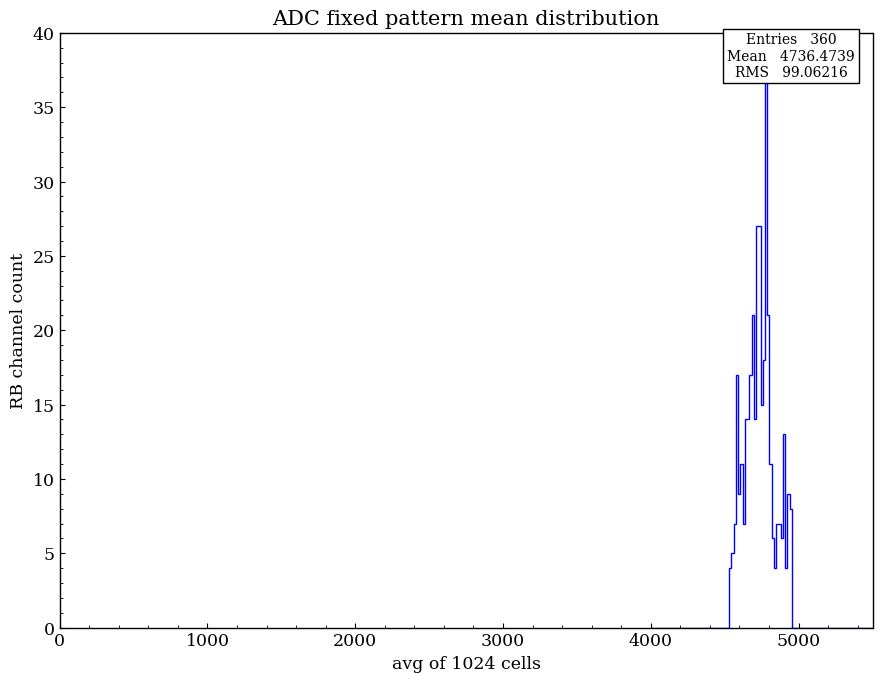

  plt.ylim(0,ylim)



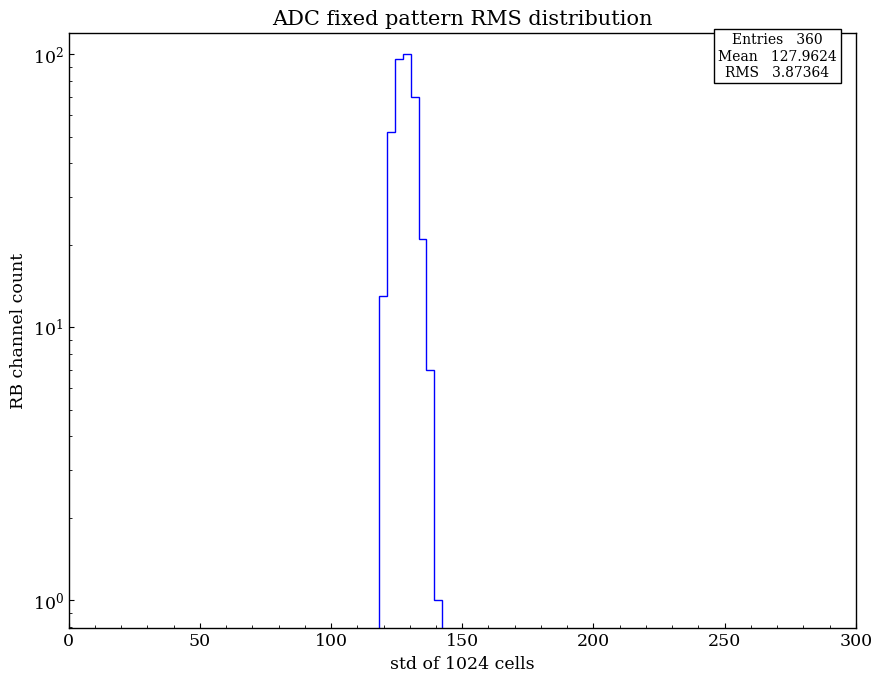

In [17]:
plotroot(vcal_1_avg,4000,5500,"avg of 1024 cells","RB channel count","ADC fixed pattern mean distribution",40)
plotroot(vcal_1_std,0,300,"std of 1024 cells","RB channel count","ADC fixed pattern RMS distribution",120,log=True)

check for outliers or bimodal distribution. if any RB channels have high RMS (or outlier averages), plot them below:

In [78]:
cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[24])
rb01 = cal.v_offsets[8]

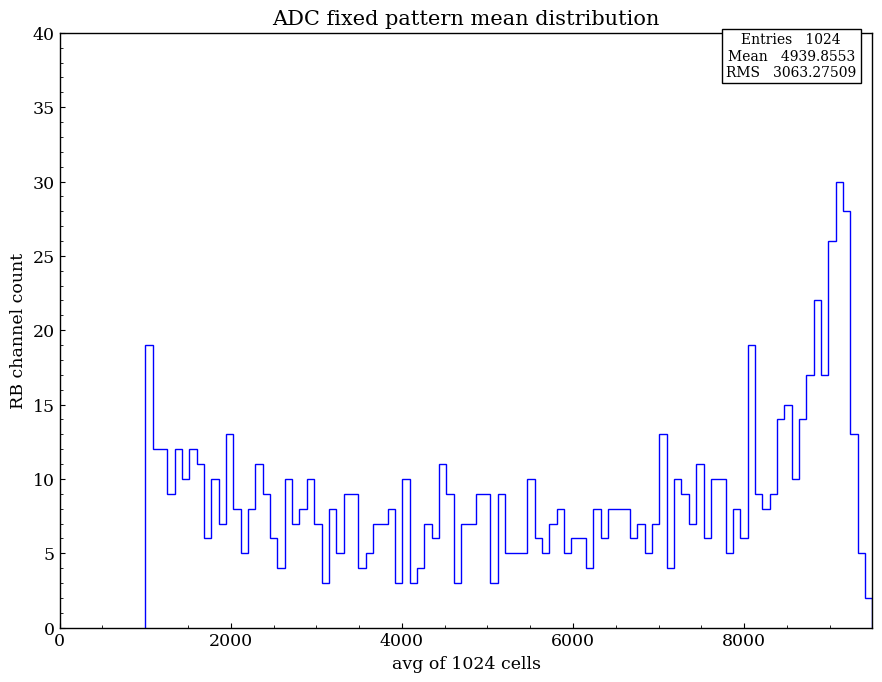

In [79]:
plotroot(rb01,1000,9500,"avg of 1024 cells","RB channel count","ADC fixed pattern mean distribution",40)

## VCAL2: droop

In [18]:
vcal_2_avg = []
vcal_2_std = []

for ind in range(len(files)):

    print(filename[ind])
    cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    
    for j in range(9):

        vcal_2_avg.append(np.mean(cal.v_dips[j]))
        vcal_2_std.append(np.std(cal.v_dips[j]))

        #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        
        if (np.std(cal.v_dips[j]) > 5):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_dip std = " + str(np.std(cal.v_dips[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        if (np.mean(cal.v_dips[j]) < -0.5):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": low v_dip mean = " + str(np.mean(cal.v_dips[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        if (np.mean(cal.v_dips[j]) > 0.5):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high v_dip mean = " + str(np.mean(cal.v_dips[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)

RB01_2024_04_26-17_50_37.cali.tof.gaps
RB 1 Ch 1: high v_dip std = 4.938844117504124
RB02_2024_04_26-17_50_29.cali.tof.gaps
RB 2 Ch 1: high v_dip std = 4.469554670225023
RB03_2024_04_26-17_50_41.cali.tof.gaps
RB 3 Ch 1: high v_dip std = 5.57736455013384
RB 3 Ch 2: high v_dip std = 4.277663030069677
RB04_2024_04_26-17_50_27.cali.tof.gaps
RB 4 Ch 1: high v_dip std = 4.746193535939906
RB05_2024_04_26-17_50_25.cali.tof.gaps
RB 5 Ch 1: high v_dip std = 4.454479195181084
RB06_2024_04_26-17_50_28.cali.tof.gaps
RB 6 Ch 1: high v_dip std = 5.002794165829432
RB07_2024_04_26-17_50_25.cali.tof.gaps
RB 7 Ch 1: high v_dip std = 4.633363022756304
RB08_2024_04_26-17_50_37.cali.tof.gaps
RB 8 Ch 1: high v_dip std = 4.413320482215077
RB09_2024_04_26-17_50_38.cali.tof.gaps
RB 9 Ch 1: high v_dip std = 5.125965054935113
RB 9 Ch 2: high v_dip std = 4.0462314784970985
RB11_2024_04_26-17_50_36.cali.tof.gaps
RB 11 Ch 1: high v_dip std = 5.166166501810642
RB13_2024_04_26-17_50_41.cali.tof.gaps
RB 13 Ch 1: high v

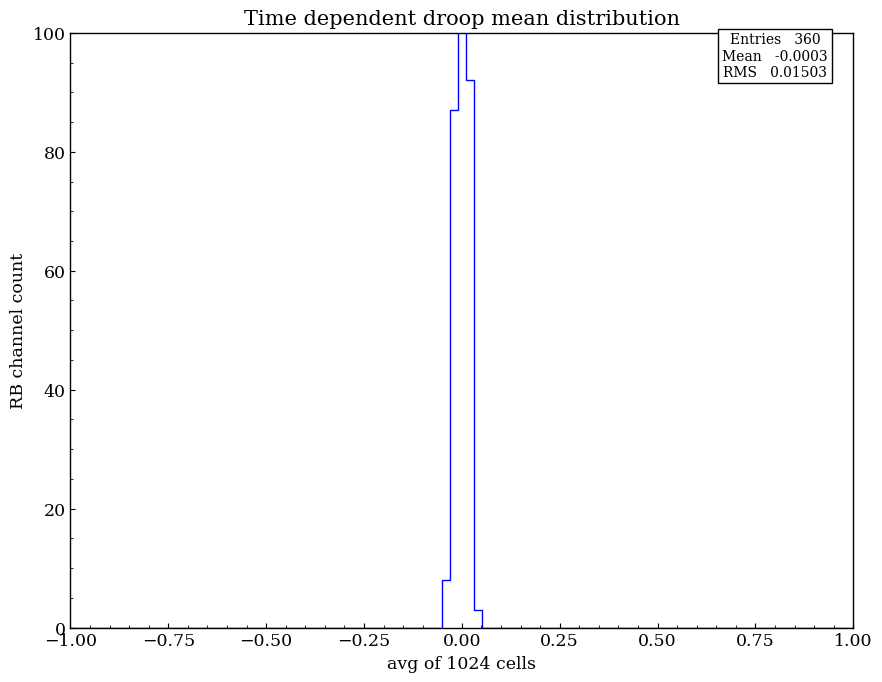

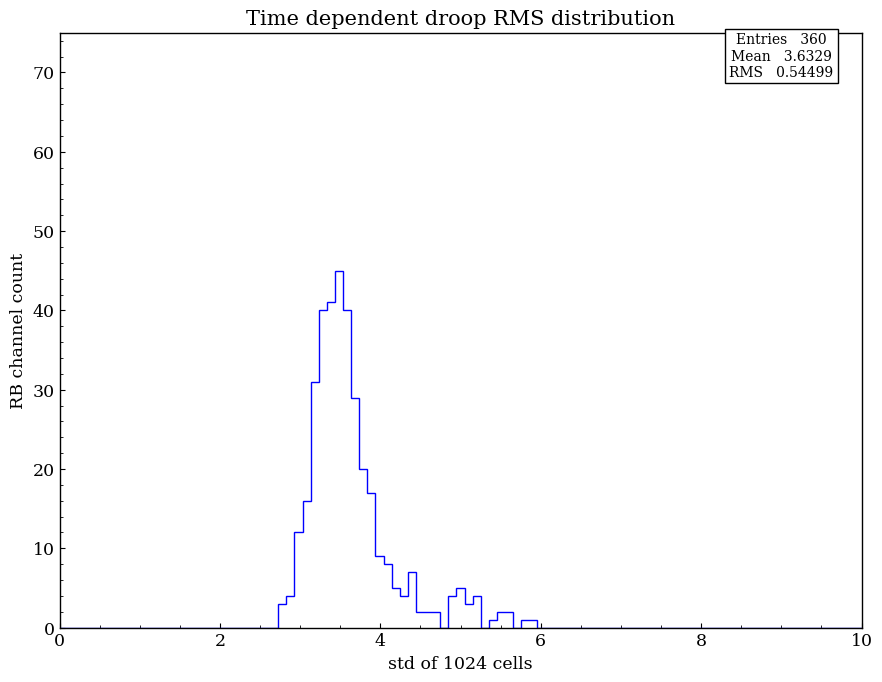

In [19]:
plotroot(vcal_2_avg,-1,1,"avg of 1024 cells","RB channel count","Time dependent droop mean distribution",100, xlo=-1)
plotroot(vcal_2_std,0,10,"std of 1024 cells","RB channel count","Time dependent droop RMS distribution",75)

all RBs have slightly higher droop RMS (so, a more dramatic droop) on ch1; this is a known effect and is expected. if warning message prints for ch1 on any RB, and the RMS is only slightly higher than 5, it can be ignored. 

if a particular board has a low mean value for all channels, or something, plot the distribution below:

In [ ]:
cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[1])

for j in range(9):

    plotroot(cal.v_dips[j],-10,10,"Vdip value","cell count","Time Dependent Droop for 1024 cells in RB1, ch" + str(j),100,xlo=-10)

compare to a "good" distribution:

In [ ]:
al = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[2])

for j in range(3):

    plotroot(cal.v_dips[j],-10,10,"Vdip value","cell count","Time Dependent Droop for 1024 cells in RB4, ch" + str(j),100,xlo=-10)

## VCAL3: Gain

In [20]:
vcal_3_avg = []
vcal_3_std = []

for ind in range(len(files)):

    print(filename[ind])

    cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    
    for j in range(9):

        vcal_3_avg.append(np.mean(cal.v_incs[j]))
        vcal_3_std.append(np.std(cal.v_incs[j]))

        if (np.std(cal.v_incs[j]) > 0.00025):
            print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + ": high gain std = " + str(np.std(cal.v_incs[j])))
            #plotroot(cal.v_dips[j],-15,15,"droop value","cells","Time dependent droop mean distribution RB " + str(cal.rb_id) + " Ch " + str(j+1),100, xlo=-15)
        




RB01_2024_04_26-17_50_37.cali.tof.gaps
RB02_2024_04_26-17_50_29.cali.tof.gaps
RB03_2024_04_26-17_50_41.cali.tof.gaps
RB 3 Ch 1: high gain std = 0.0002273749658063868
RB04_2024_04_26-17_50_27.cali.tof.gaps
RB05_2024_04_26-17_50_25.cali.tof.gaps
RB06_2024_04_26-17_50_28.cali.tof.gaps
RB07_2024_04_26-17_50_25.cali.tof.gaps
RB08_2024_04_26-17_50_37.cali.tof.gaps
RB09_2024_04_26-17_50_38.cali.tof.gaps
RB11_2024_04_26-17_50_36.cali.tof.gaps
RB13_2024_04_26-17_50_41.cali.tof.gaps
RB 13 Ch 1: high gain std = 0.00022655989670051238
RB 13 Ch 9: high gain std = 0.00022435445574029355
RB14_2024_04_26-17_50_41.cali.tof.gaps
RB15_2024_04_26-17_50_41.cali.tof.gaps
RB 15 Ch 1: high gain std = 0.0002203678863601543
RB 15 Ch 9: high gain std = 0.00023124512505648802
RB16_2024_04_26-17_50_38.cali.tof.gaps
RB17_2024_04_26-17_50_25.cali.tof.gaps
RB18_2024_04_26-17_50_37.cali.tof.gaps
RB19_2024_04_26-17_30_54.cali.tof.gaps
RB20_2024_04_26-17_30_53.cali.tof.gaps
RB21_2024_04_26-17_50_42.cali.tof.gaps
RB22_20

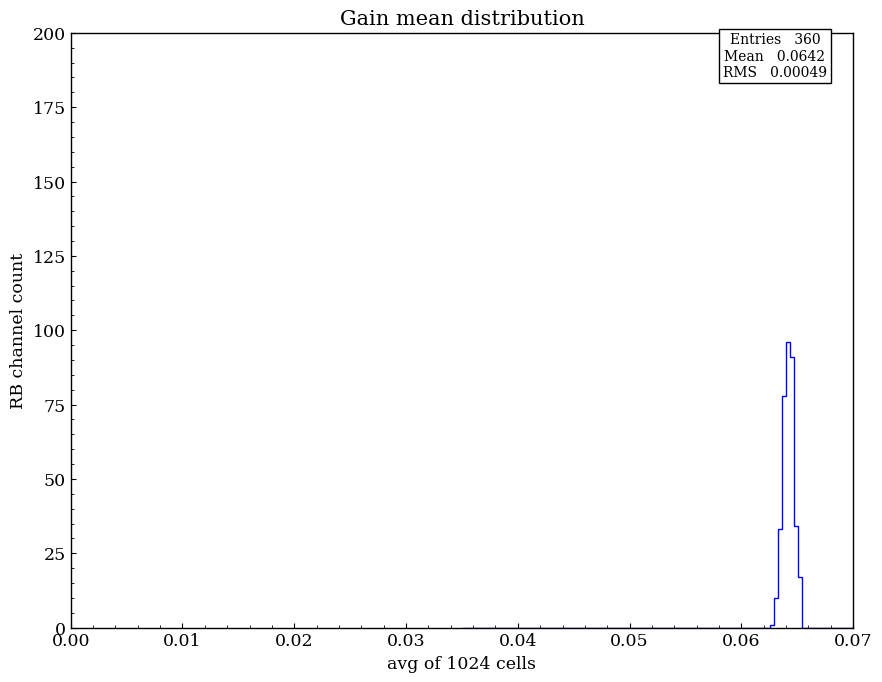

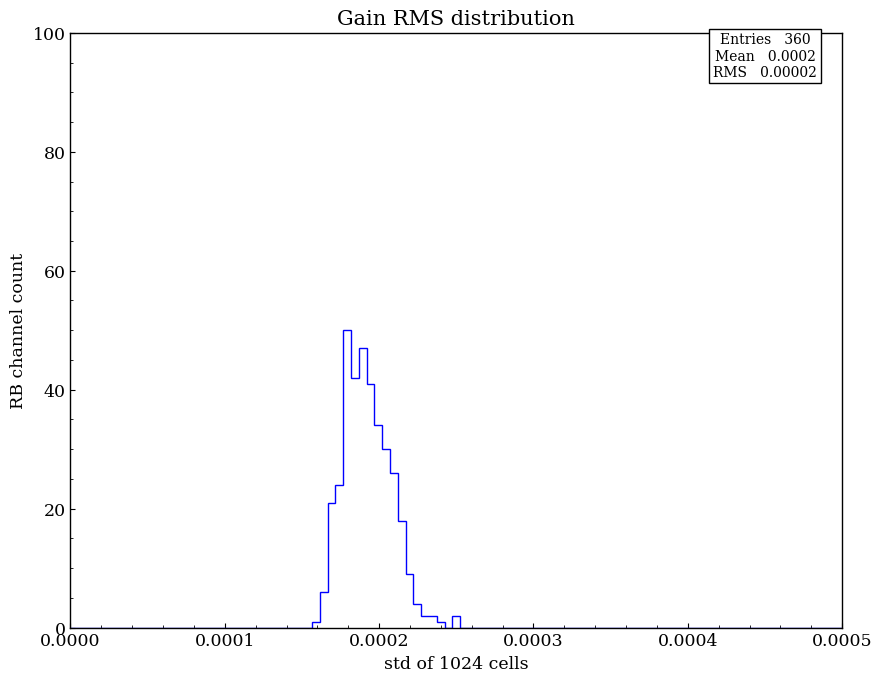

  plt.ylim(0,ylim)



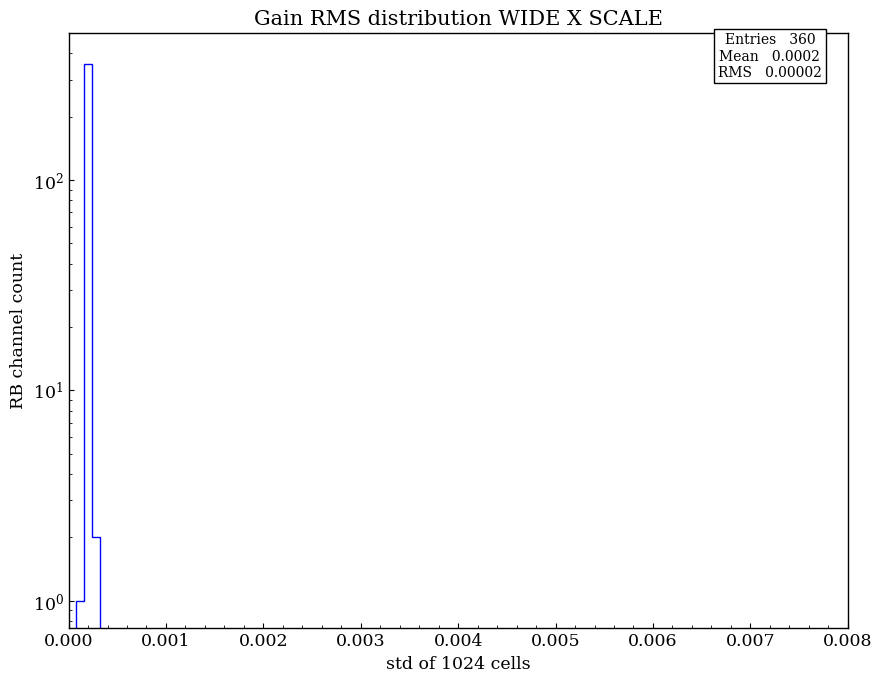

In [21]:
plotroot(vcal_3_avg,0.035,0.07,"avg of 1024 cells","RB channel count","Gain mean distribution",200)
plotroot(vcal_3_std,0,0.0005,"std of 1024 cells","RB channel count","Gain RMS distribution",100)
plotroot(vcal_3_std,0,0.008,"std of 1024 cells","RB channel count","Gain RMS distribution WIDE X SCALE",500,log=True)

# Plot Statistics for NOI and VCAL events

## NOI data: 0mV

pedestal and pedRMS values are plotted for 999 NOI events taken in the calibration data stream 

In [62]:
print(filename[5])
cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[5])

RB06_2024_04_23-23_59_27.cali.tof.gaps


In [63]:
cal

<ReadoutboardCalibration:
 RB             : 6
 .. no calibration data (RBEvents) loaded/available ..
 V Offsets [ch0]: .. 4333.952148 4544.145996..
 V Incrmts [ch0]: .. 0.063114 0.063585..
 V Dips    [ch0]: .. 5.619629 5.372070..
 T Bins    [ch0]: .. 0.478659 0.510875..>

In [65]:
noi_ped = []
noi_pedrms = []

for ind in range(len(files)):

    print(filename[ind])

    cal = go.cxx_api.RBCalibration.from_file(calfolder_string + filename[ind])
    print(len(cal.noi_data))

    for i in range(0,900,1):
    
        ADC = cal.noi_data[i]
        for j in range(9):
        
            rms_temp = np.std(cal.voltages(ADC,spike_cleaning=False)[j][50:900])
            noi_pedrms.append(rms_temp)

            if (rms_temp > 2):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high NOI pedRMS = " + str(rms_temp))
                
                #ADC = cal.noi_data[i]
                #fig,ax = plt.subplots(figsize=(15,5))

                #volts = cal.voltages(ADC,j+1)
                #times = cal.nanoseconds(ADC,j+1)

                #plt.plot(times,volts, label=" Ch " + str(j))
                ##plt.plot((np.roll(times,-1)-times[0])[:-2],volts[:-2], label="tbins shifted 1")
                #plt.title("NOI for RB " + str(cal.rb_id) + " Ev " + str(i))
                #plt.legend()
                ##plt.ylim(-30,200)
                ##plt.xlim(-1,100)
                #plt.grid()
                #plt.show()
            
            mean_temp = np.mean(cal.voltages(ADC,spike_cleaning=False)[j][50:900])
            noi_ped.append(mean_temp)

            if (mean_temp > 1.5) or (mean_temp < -1.5):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high NOI ped = " + str(mean_temp))

RB01_2024_04_23-23_59_37.cali.tof.gaps
0


IndexError: list index out of range

  return _methods._mean(a, axis=axis, dtype=dtype,

  ret = ret.dtype.type(ret / rcount)

  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,

  arrmean = um.true_divide(arrmean, div, out=arrmean,

  ret = ret.dtype.type(ret / rcount)

  plt.yscale("log")

  plt.ylim(0,ylim)



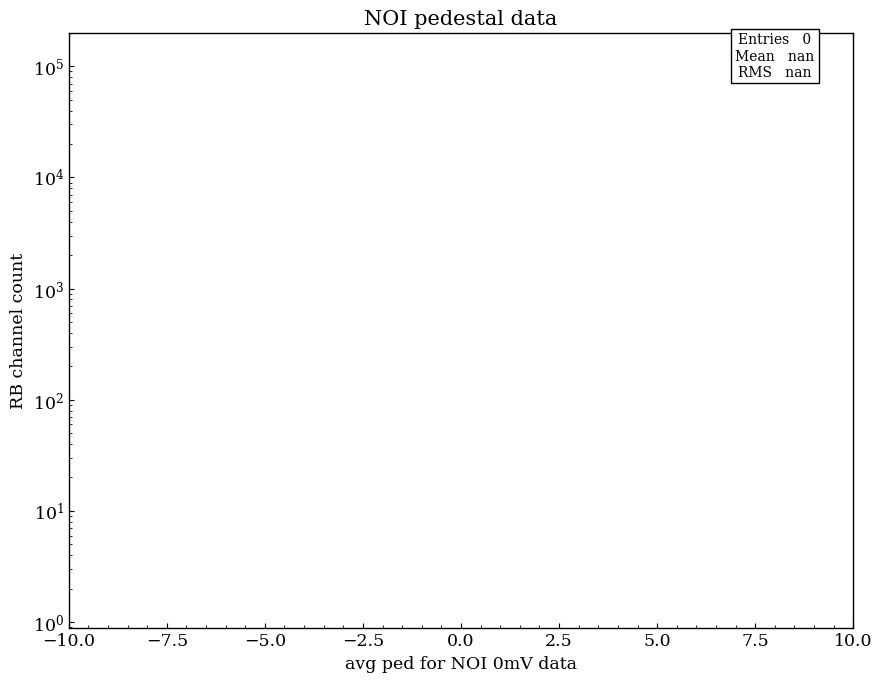

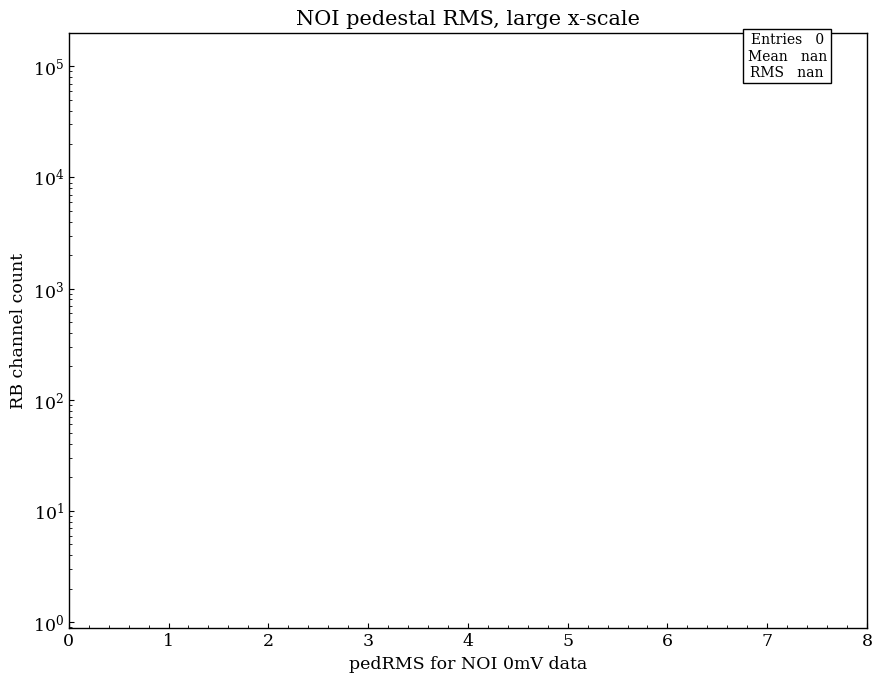

In [30]:
plotroot(noi_ped,-10,10,"avg ped for NOI 0mV data","RB channel count","NOI pedestal data",200000, xlo=-10,log=True)
plotroot(noi_pedrms,0,8,"pedRMS for NOI 0mV data","RB channel count","NOI pedestal RMS, large x-scale",200000, log=True)




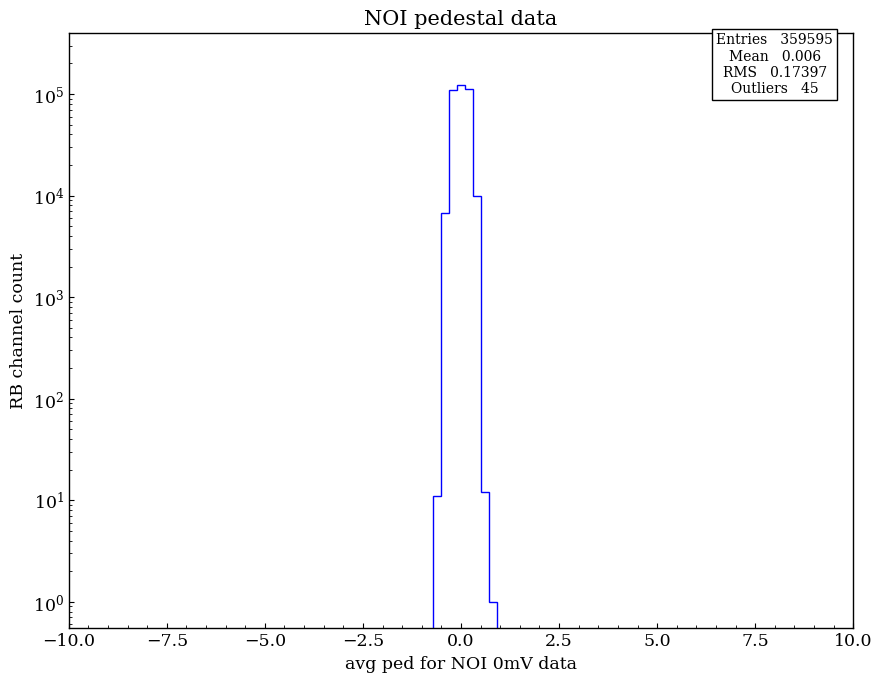

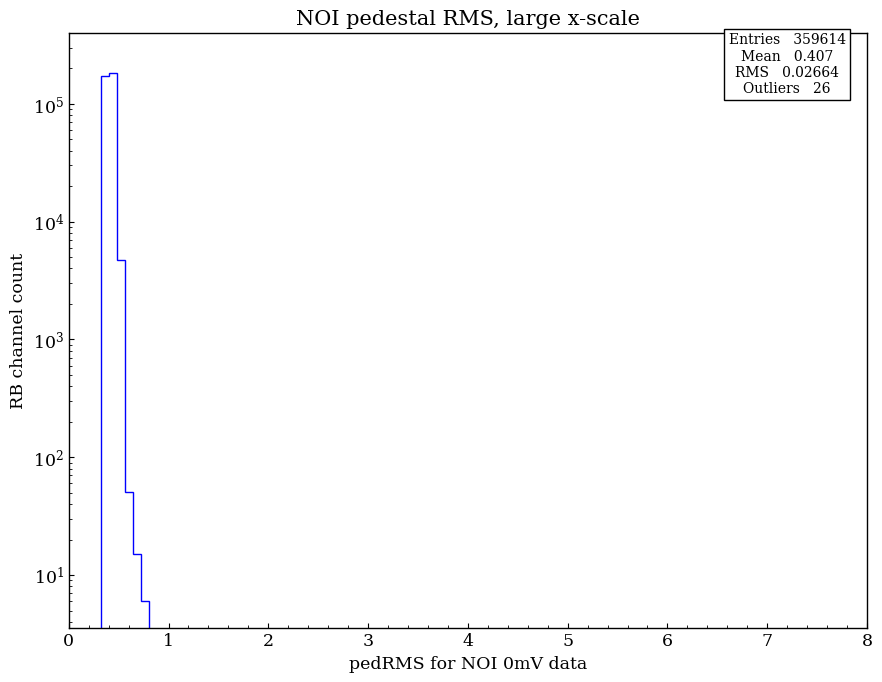

In [13]:
plotroot_trunc(noi_ped,-10,10,"avg ped for NOI 0mV data","RB channel count","NOI pedestal data",400000, xlo=-10,log=True)
plotroot_trunc(noi_pedrms,0,8,"pedRMS for NOI 0mV data","RB channel count","NOI pedestal RMS, large x-scale",400000, log=True)



check for pedRMS and ped mean outliers

## VCAL data: 182mV

pedestal and pedRMS values are plotted for 999 VCAL events taken in the calibration data stream 

In [18]:
vcal_ped = []
vcal_pedrms = []

for ind in range(len(files)):

    print(filename[ind])

    cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[ind])

    for i in range(0,999,1):

        ADC = cal.vcal_data[i]
        for j in range(9):
        
            rms_temp = np.std(cal.voltages(ADC,spike_cleaning=False)[j][50:900])
            vcal_pedrms.append(rms_temp)
            mean_temp = np.mean(cal.voltages(ADC,spike_cleaning=False)[j][50:900])
            vcal_ped.append(mean_temp)

            if (rms_temp > 2):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high VCAL pedRMS = " + str(rms_temp))
                

            if (mean_temp > 182.8):
                print("RB " + str(cal.rb_id) + " Ch " + str(j+1) + " Ev " + str(i) + ": high VCAL ped = " + str(mean_temp) + ", RMS = " + str(rms_temp))

RB01_2024_03_13-22_08_28.cali.tof.gaps
RB02_2024_03_13-22_08_21.cali.tof.gaps
RB 2 Ch 1 Ev 865: high VCAL ped = 187.02908, RMS = 0.8197466
RB 2 Ch 2 Ev 865: high VCAL ped = 187.04448, RMS = 0.79435706
RB 2 Ch 3 Ev 865: high VCAL ped = 187.10452, RMS = 0.8067746
RB 2 Ch 4 Ev 865: high VCAL ped = 187.12732, RMS = 0.8041474
RB 2 Ch 5 Ev 865: high VCAL ped = 187.12189, RMS = 0.7913191
RB 2 Ch 6 Ev 865: high VCAL ped = 187.19412, RMS = 0.81630886
RB 2 Ch 7 Ev 865: high VCAL ped = 187.21245, RMS = 0.7945887
RB 2 Ch 8 Ev 865: high VCAL ped = 187.21191, RMS = 0.78943276
RB 2 Ch 9 Ev 865: high VCAL ped = 187.1418, RMS = 0.7045429
RB03_2024_03_13-22_08_34.cali.tof.gaps
RB04_2024_03_13-22_08_21.cali.tof.gaps
RB05_2024_03_13-22_08_19.cali.tof.gaps
RB06_2024_03_13-22_08_21.cali.tof.gaps
RB07_2024_03_13-22_08_19.cali.tof.gaps
RB08_2024_03_13-22_08_29.cali.tof.gaps
RB09_2024_03_13-22_08_29.cali.tof.gaps
RB11_2024_03_13-22_08_28.cali.tof.gaps
RB13_2024_03_13-22_08_35.cali.tof.gaps
RB14_2024_03_13-22_0

  plt.ylim(0,ylim)



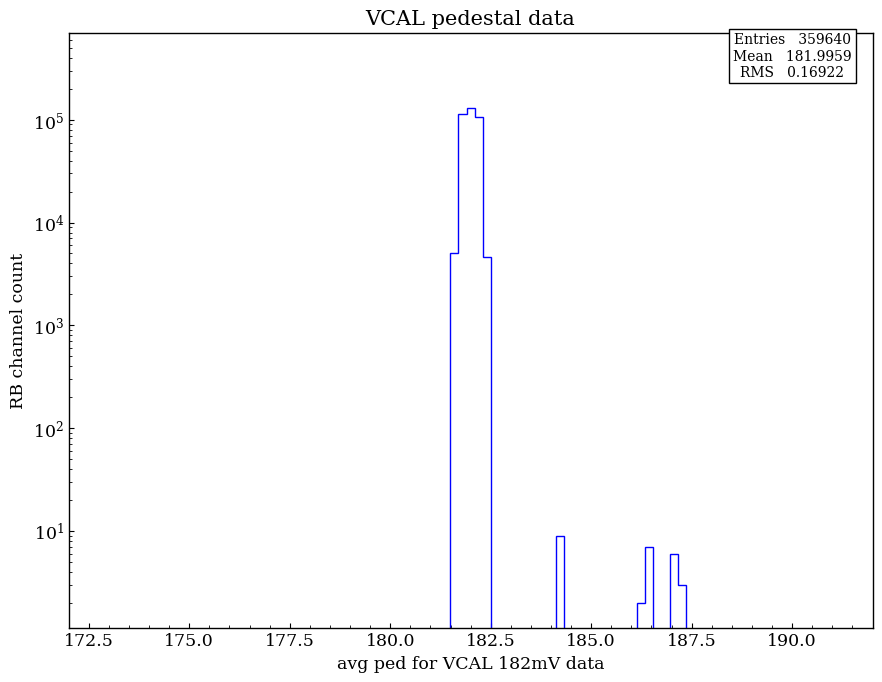

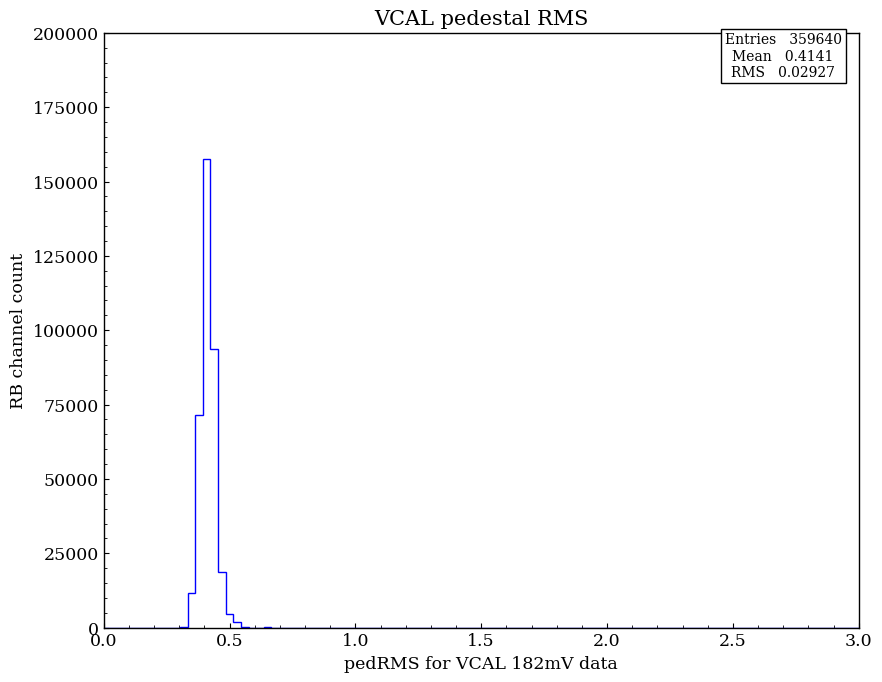

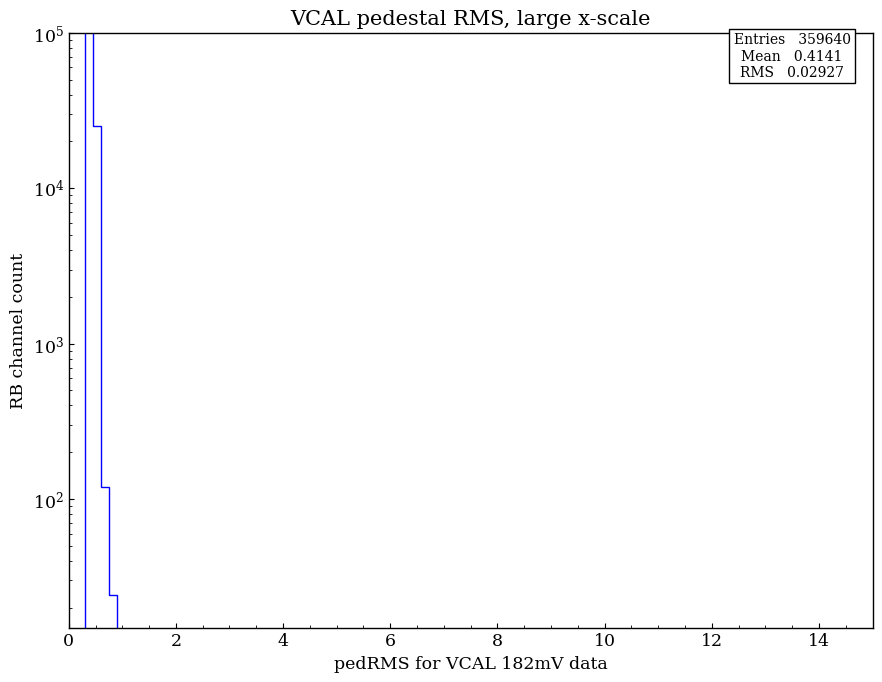

In [17]:
plotroot(vcal_ped,172,192,"avg ped for VCAL 182mV data","RB channel count","VCAL pedestal data",700000,xlo=172,log=True)
plotroot(vcal_pedrms,0,3,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS",200000)
plotroot(vcal_pedrms,0,15,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS, large x-scale",100000, log=True)

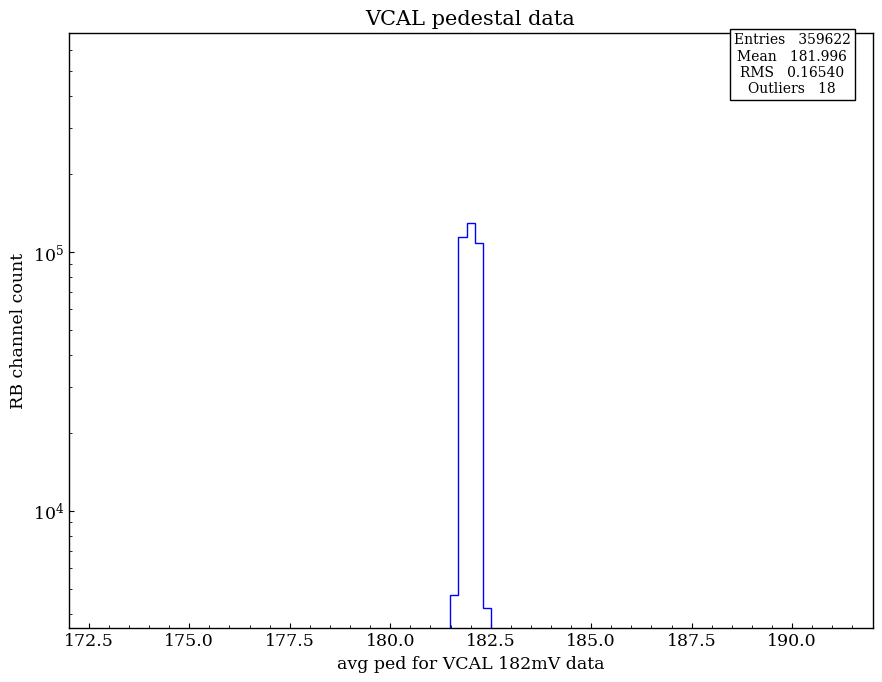

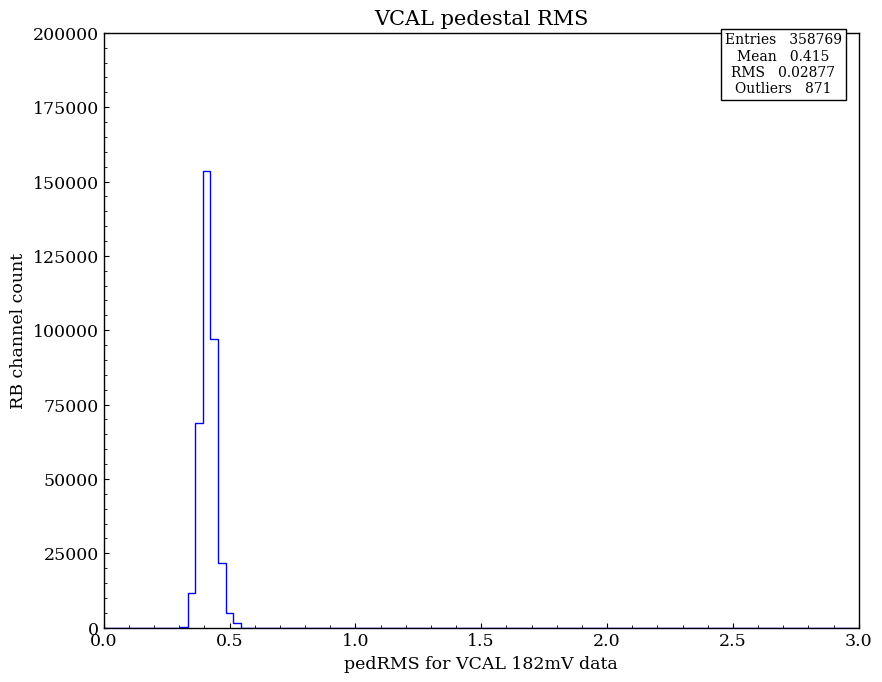

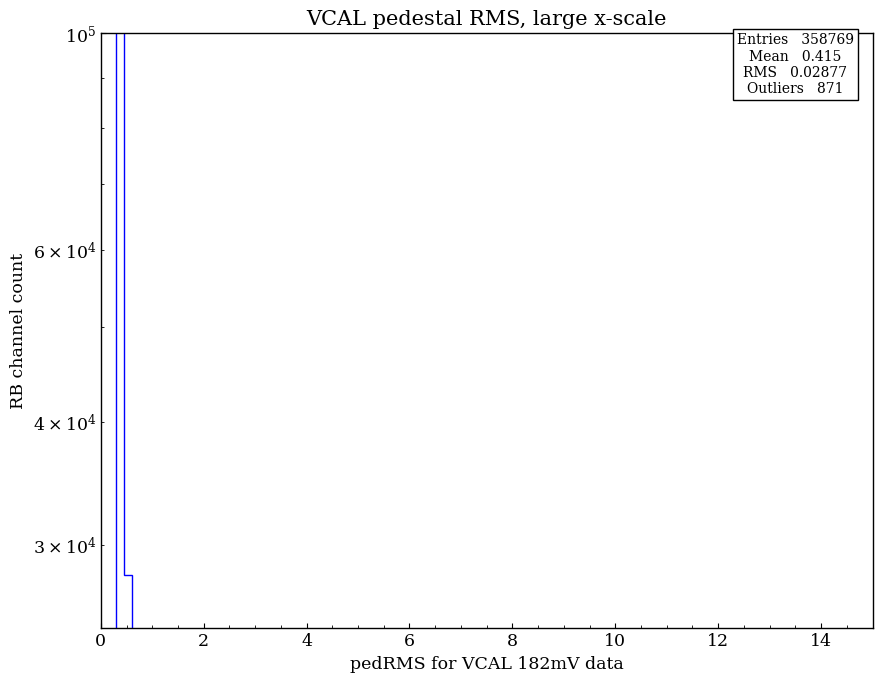

In [44]:
plotroot_trunc(vcal_ped,172,192,"avg ped for VCAL 182mV data","RB channel count","VCAL pedestal data",700000,xlo=172,log=True)
plotroot_trunc(vcal_pedrms,0,3,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS",200000)
plotroot_trunc(vcal_pedrms,0,15,"pedRMS for VCAL 182mV data","RB channel count","VCAL pedestal RMS, large x-scale",100000, log=True)

# Looking at tcal data

In [4]:
def fit_sin(tt, yy):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = 0.025   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0., guess_offset])

    def sinfunc(t, A, w, p, c):  return A * np.sin(w*t + p) + c
    popt, pcov = sp.optimize.curve_fit(sinfunc, tt, yy, p0=guess)
    A, w, p, c = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p) + c
    perr = np.sqrt(np.diag(pcov))
    return {"perr": perr,"amp": A, "omega": w, "phase": p, "offset": c, "freq": f, "period": 1./f, "fitfunc": fitfunc, "maxcov": np.max(pcov), "rawres": (guess,popt,pcov)}



In [6]:
errlists = []

for list in range(1024):
    errlists.append([])

for ind in range(len(files)):

    print(filename[ind])

    cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[ind])

    for i in range(0,2,1):
    #for i in [200,]:
    
        ADC = cal.tcal_data[i]

        for j in range(3):

            volts = cal.voltages(ADC,j+1)
            tbins = cal.t_bin[j]

            for shift in range(1024):

                tbins_rolled = np.roll(tbins,shift)
                times = np.zeros((1024,))
                times[0] = 0
                for bin in range(1,1024,1):
                    times[bin] = times[bin-1] + tbins_rolled[(bin-1+ADC.header.stop_cell)%1024]
                    

                err = fit_sin(times[10:-10], volts[10:-10])["perr"]
                errlists[shift].append(err)

                #fig,ax = plt.subplots(figsize=(15,5))
                #plt.plot(times[10:-10],volts[10:-10])
                #
                #plt.ylim(-300,300)
                #plt.xlim(-1,100)
                #plt.grid()
                #plt.show()

            

            #fig,ax = plt.subplots(figsize=(15,5))
            #plt.plot(times,volts, label="tbins applied normally")
            #plt.plot((np.roll(times,-1))[:-2],volts[:-2], label="tbins shifted 1")
            #plt.title("TCAL sine wave for RB " + str(cal.rb_id) + " Ch " + str(j) + " Ev " + str(i))
            #plt.legend()
            #plt.ylim(-300,300)
            #plt.xlim(-1,100)
            #plt.grid()
            #plt.show()

old!
RB01_2024_02_01-02_08_03.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:21:53] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:21:53] -- Decoding 999 TCAL data events...
old!
RB02_2024_02_01-02_09_45.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:22:08] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:22:08] -- Decoding 997 TCAL data events...
old!
RB03_2024_02_01-02_11_29.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:22:22] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:22:22] -- Decoding 997 TCAL data events...
old!
RB04_2024_02_01-02_13_14.cali.tof.gaps
[info] [calibration.cxx - from_bytestream:365] [2024-02-02 02:22:37] -- Decoding 1000 VCAL data events...
[info] [calibration.cxx - from_bytestream:371] [2024-02-02 02:22:37] -- Decoding 999 

In [7]:
means = []
for i in range(len(errlists)):
    if np.mean(errlists[i]) < 0.02:
        print(i, np.mean(errlists[i]))
    means.append(np.mean(errlists[i]))

0 0.014698867499618046


findfont: Font family ['cursive'] not found. Falling back to DejaVu Sans.
findfont: Generic family 'cursive' not found because none of the following families were found: Apple Chancery, Textile, Zapf Chancery, Sand, Script MT, Felipa, Comic Neue, Comic Sans MS, cursive


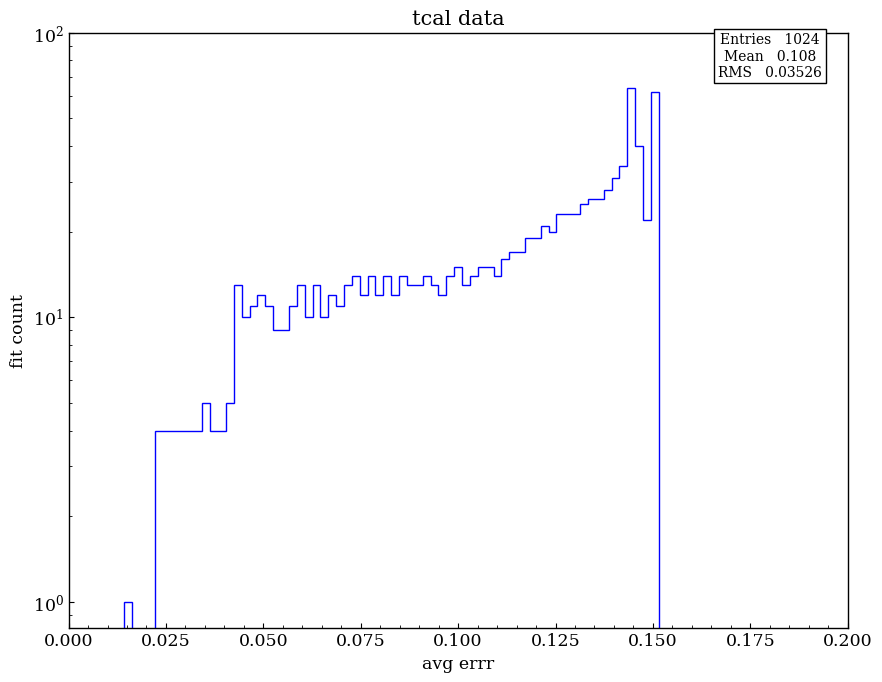

In [8]:

plotroot(means,0,0.2,"avg errr","fit count","tcal data",100, xlo=0,log=True)


## Look at Suspicious NOI data to check for data mangling

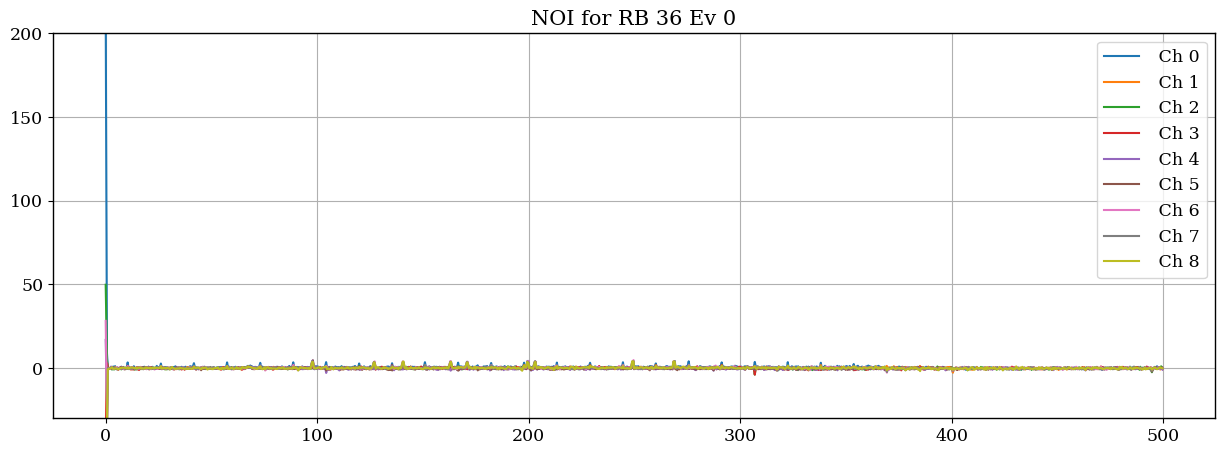

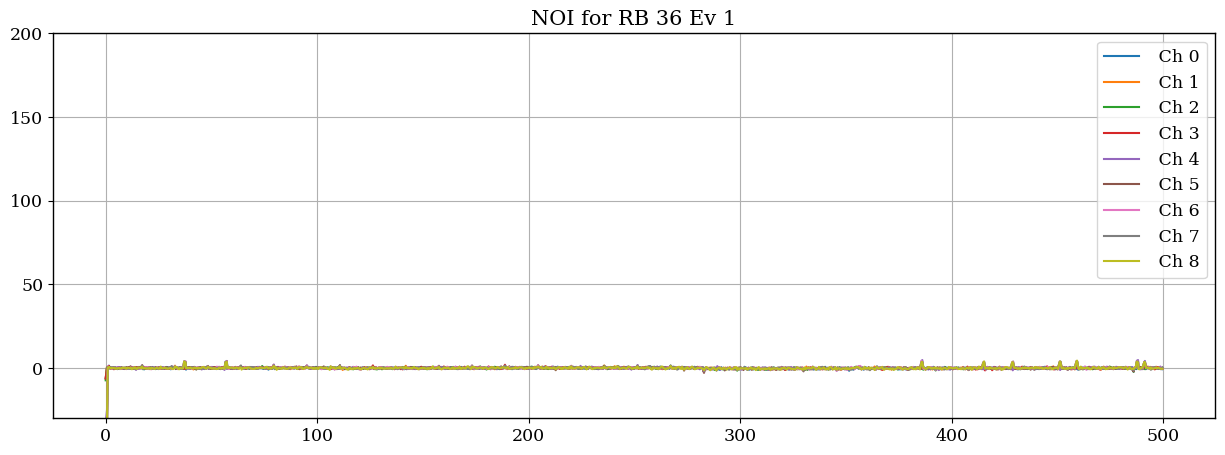

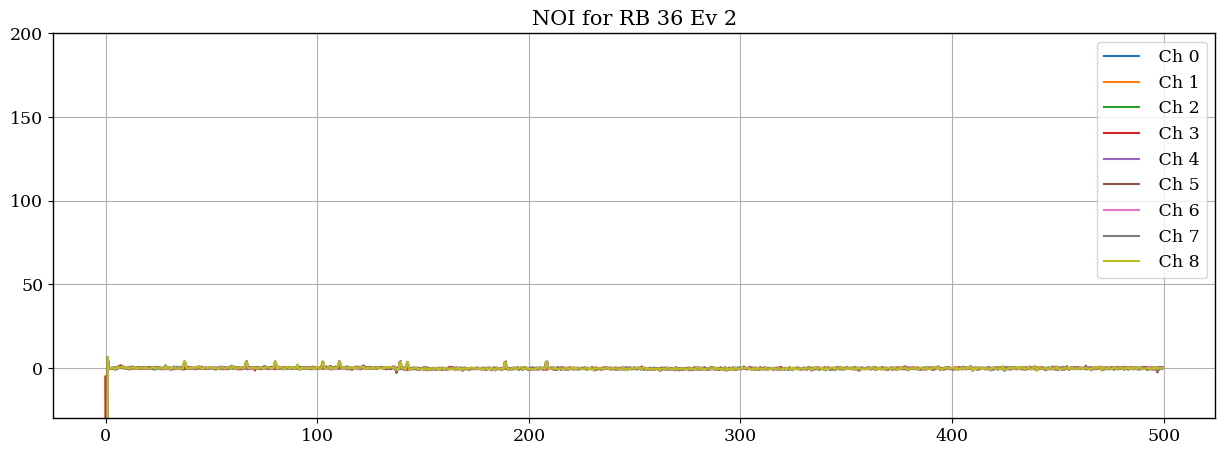

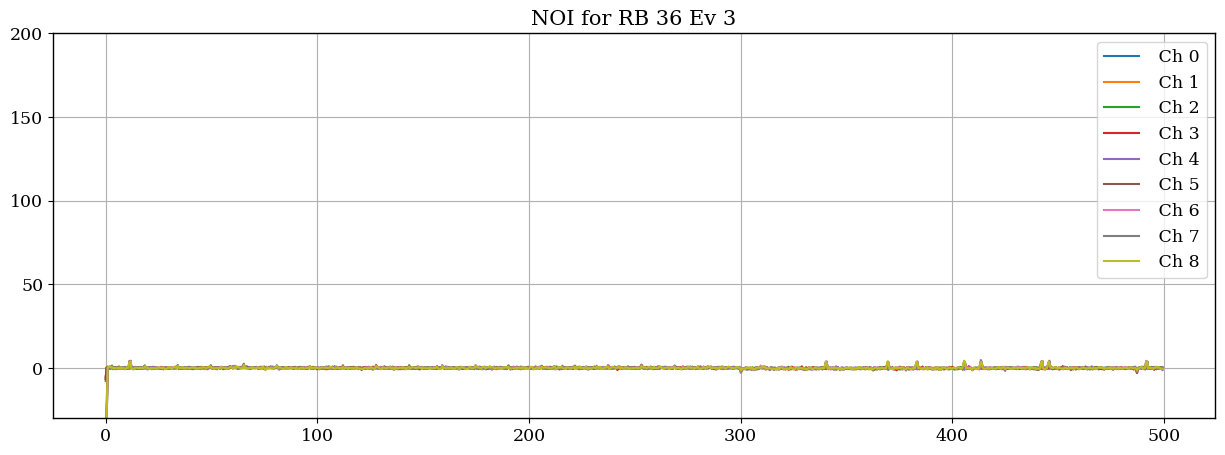

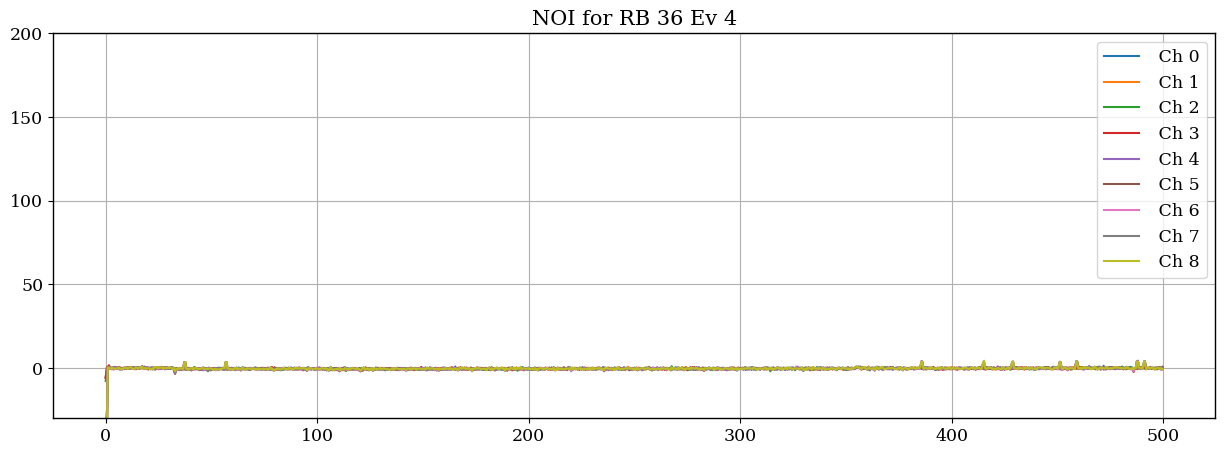

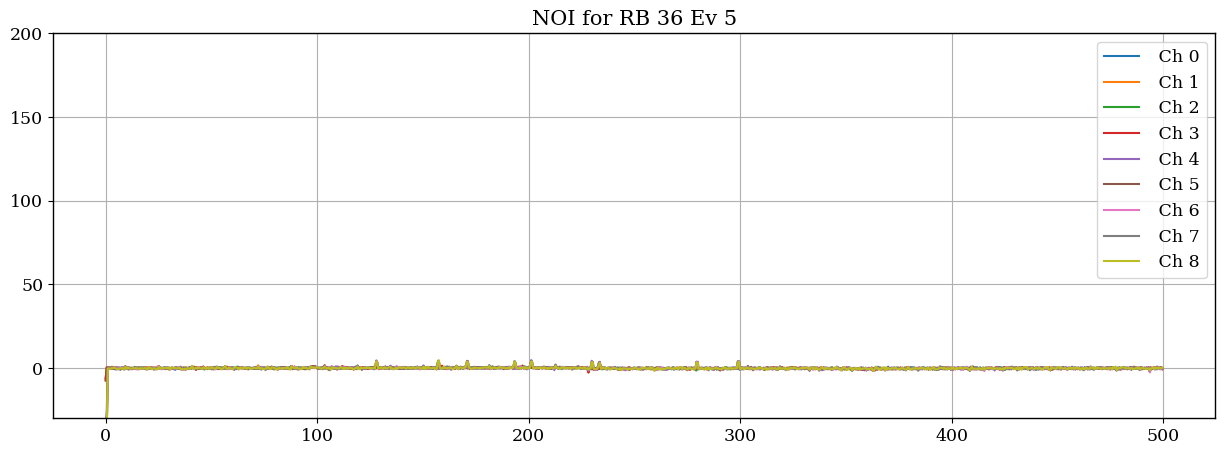

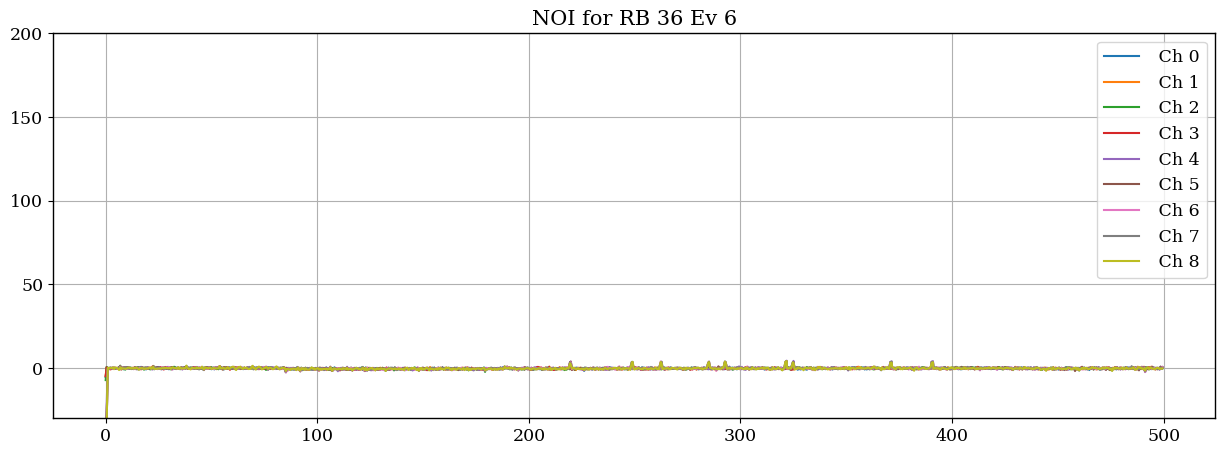

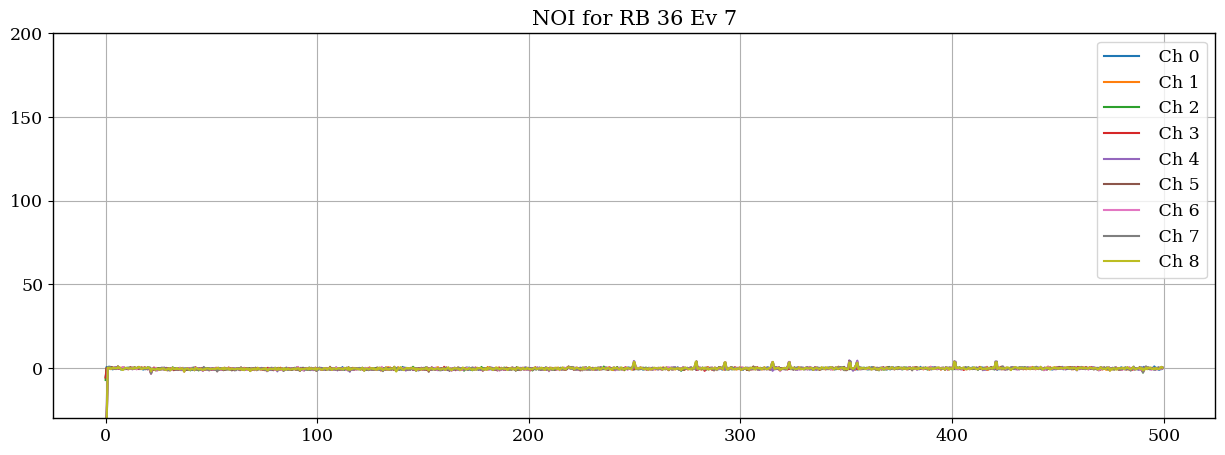

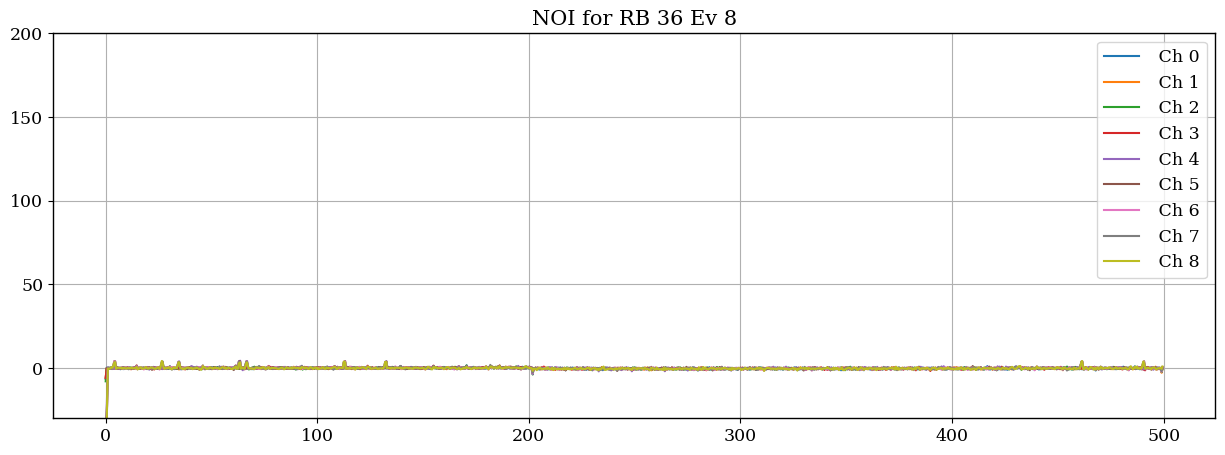

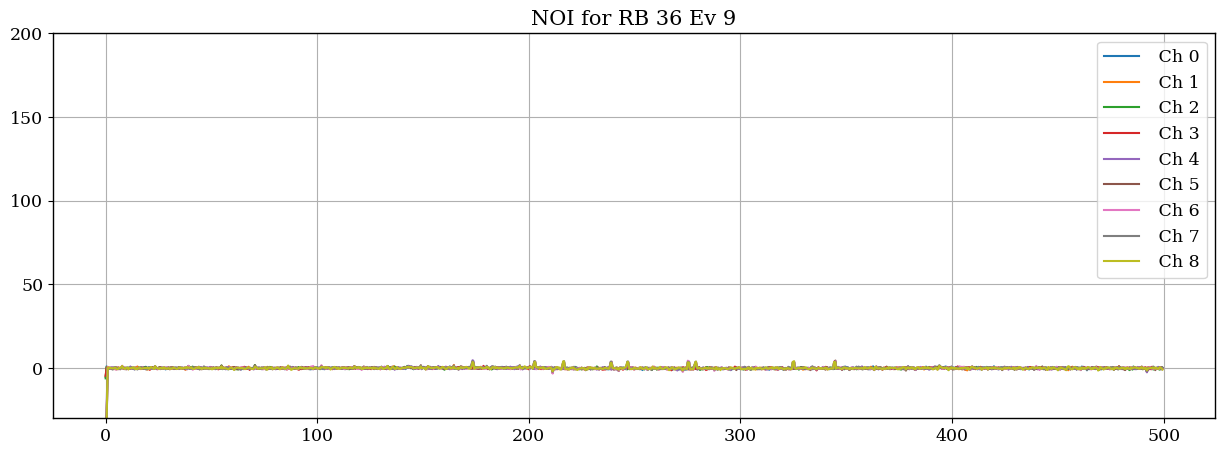

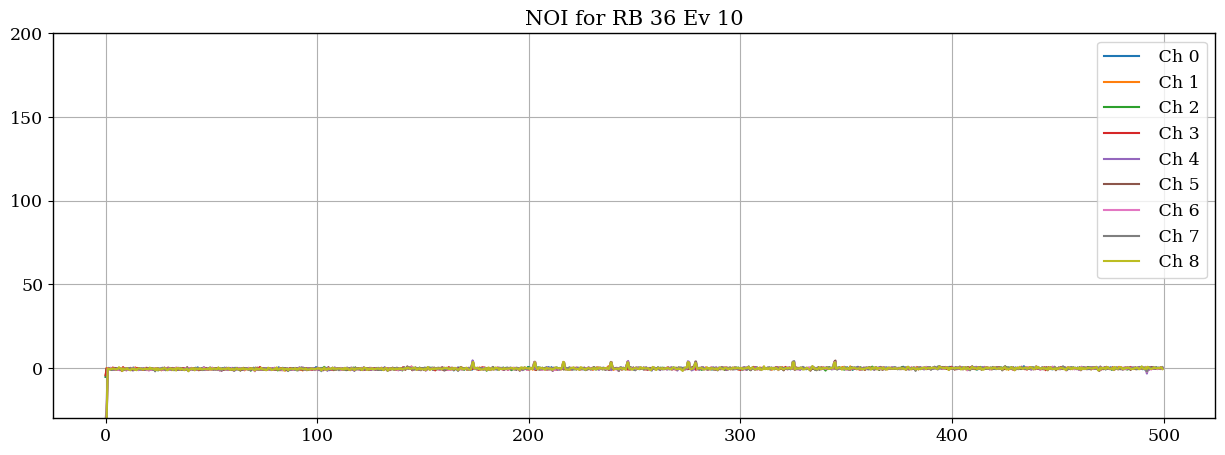

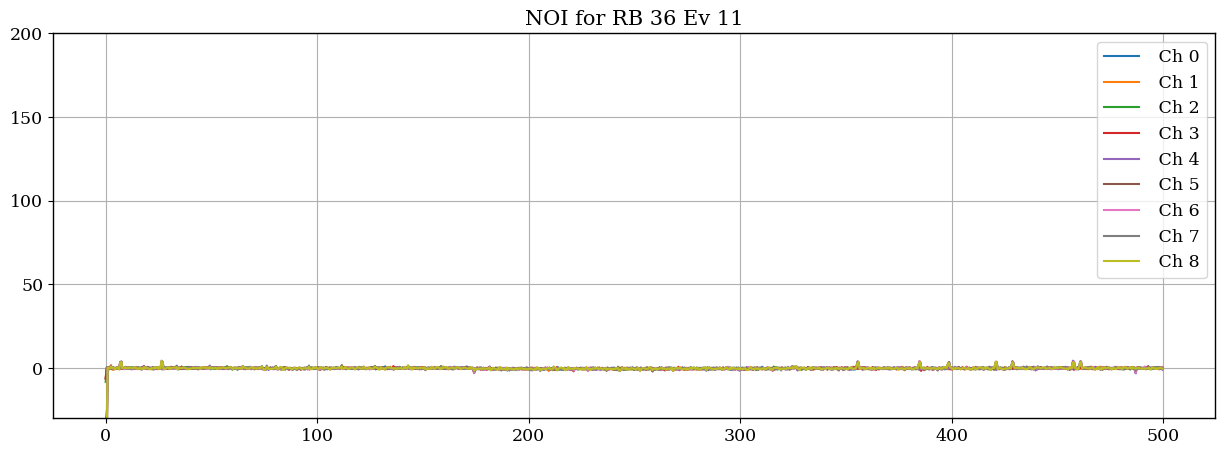

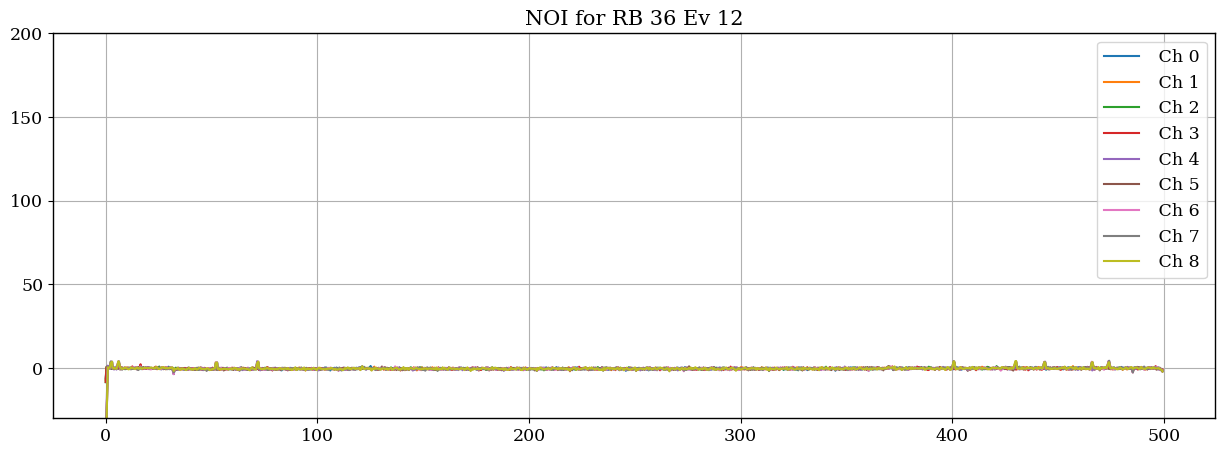

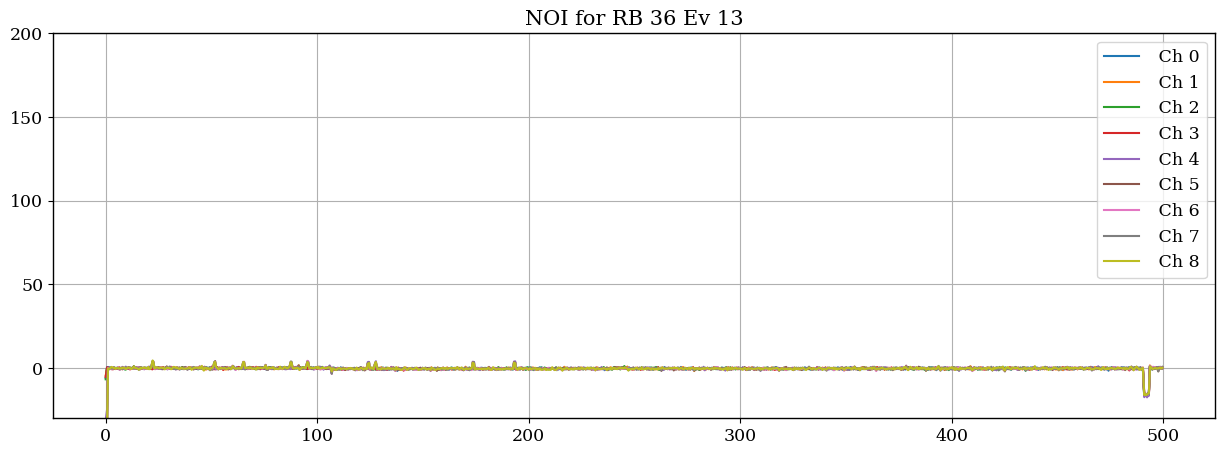

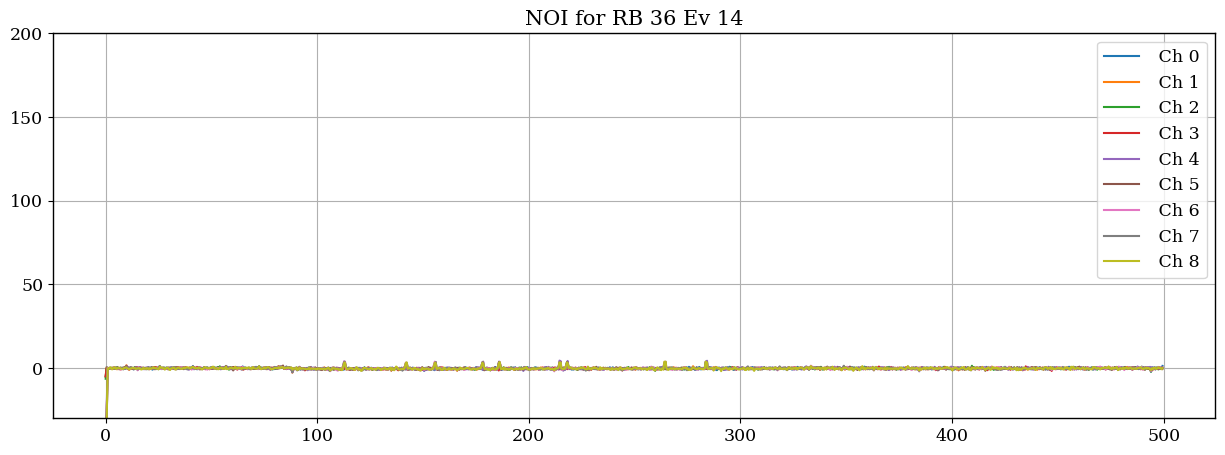

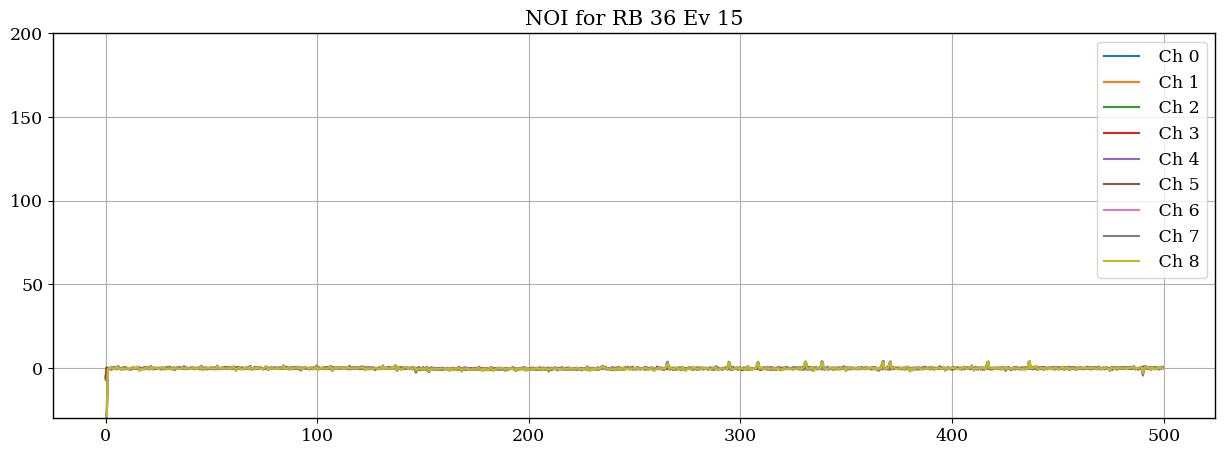

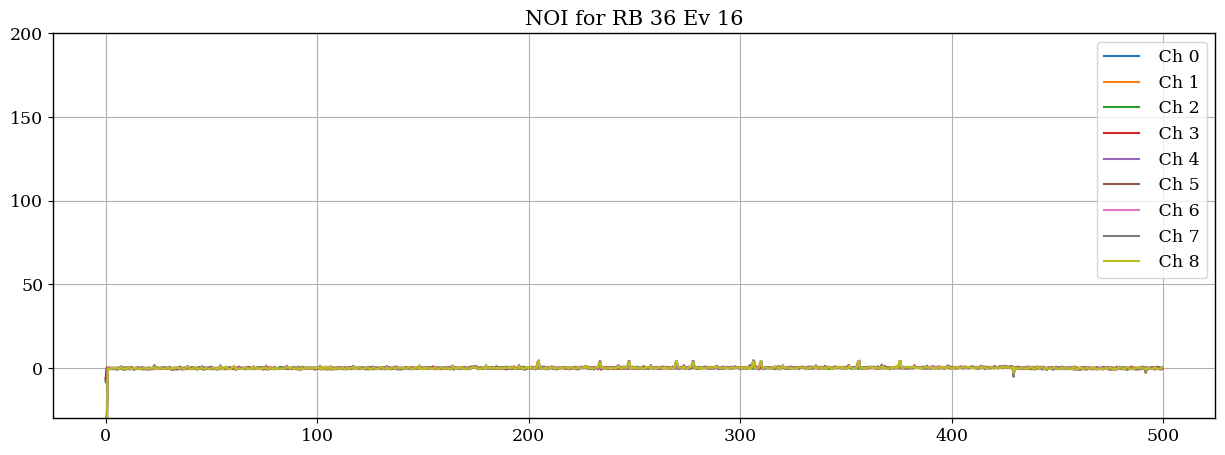

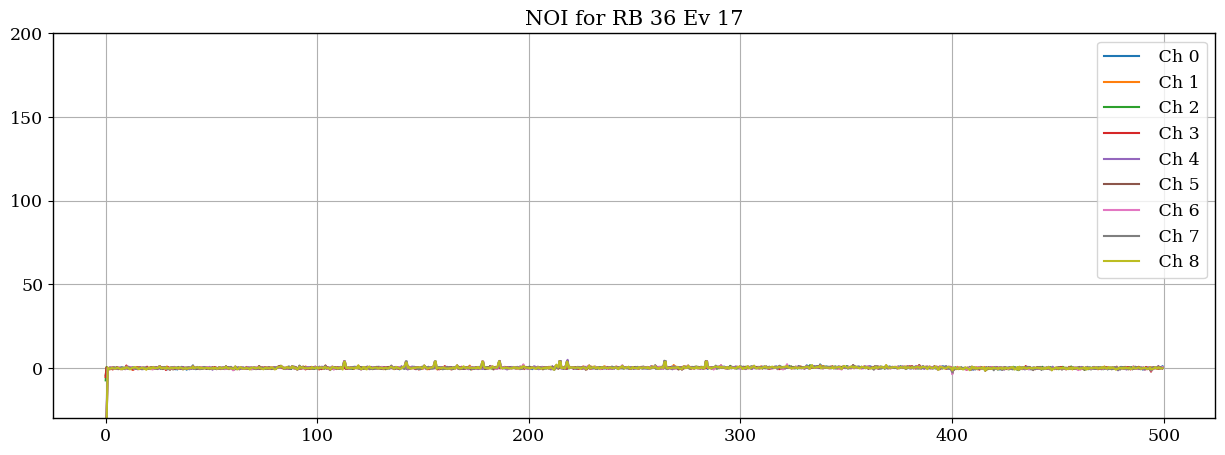

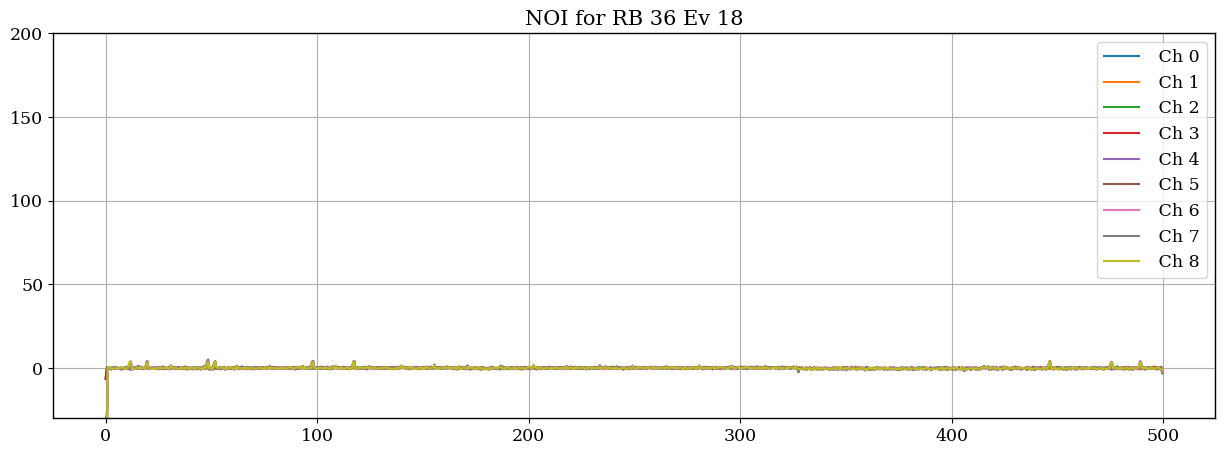

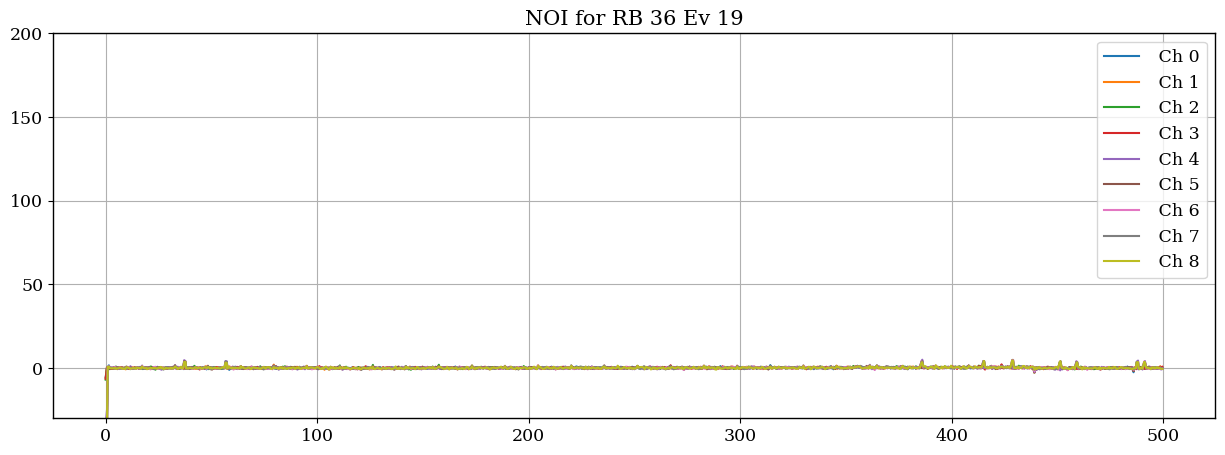

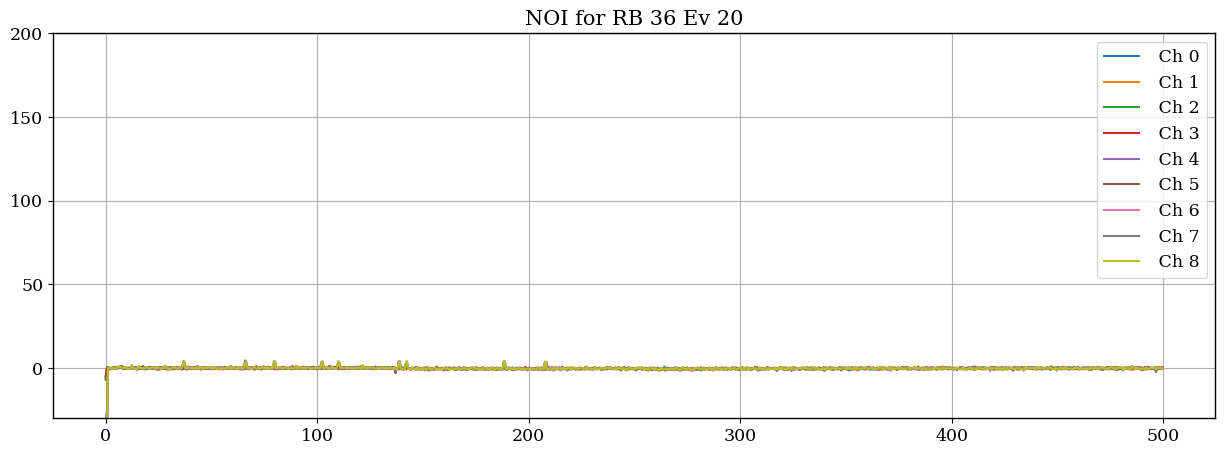

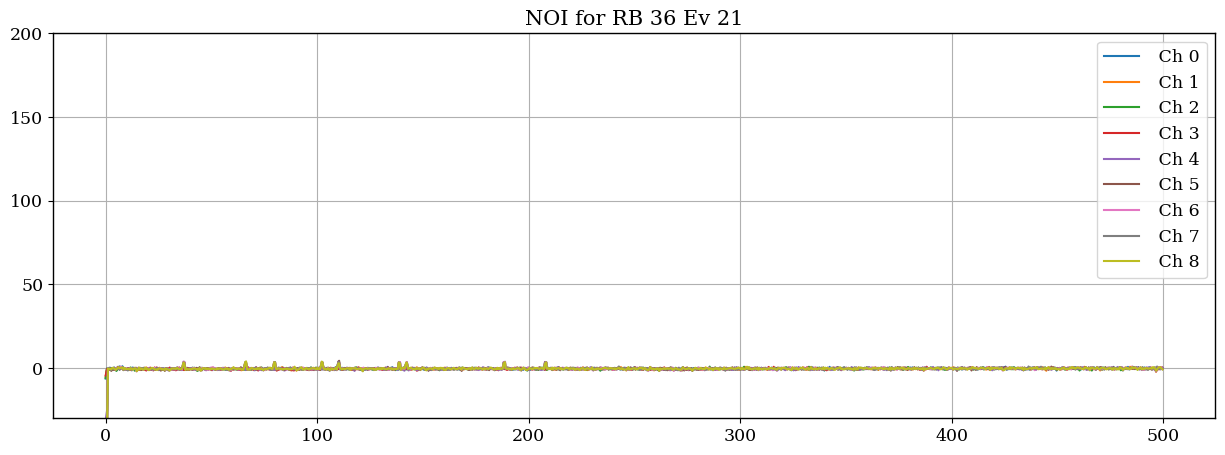

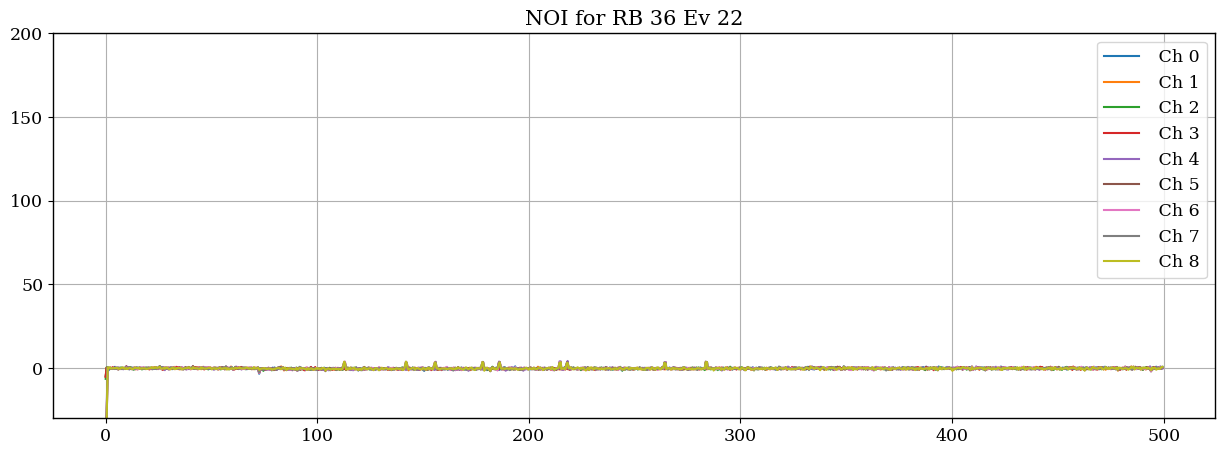

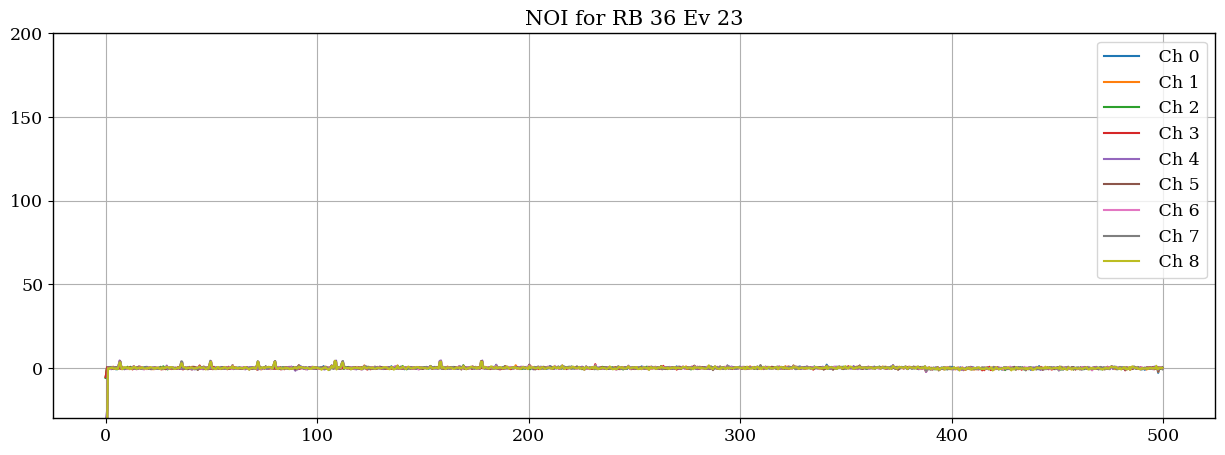

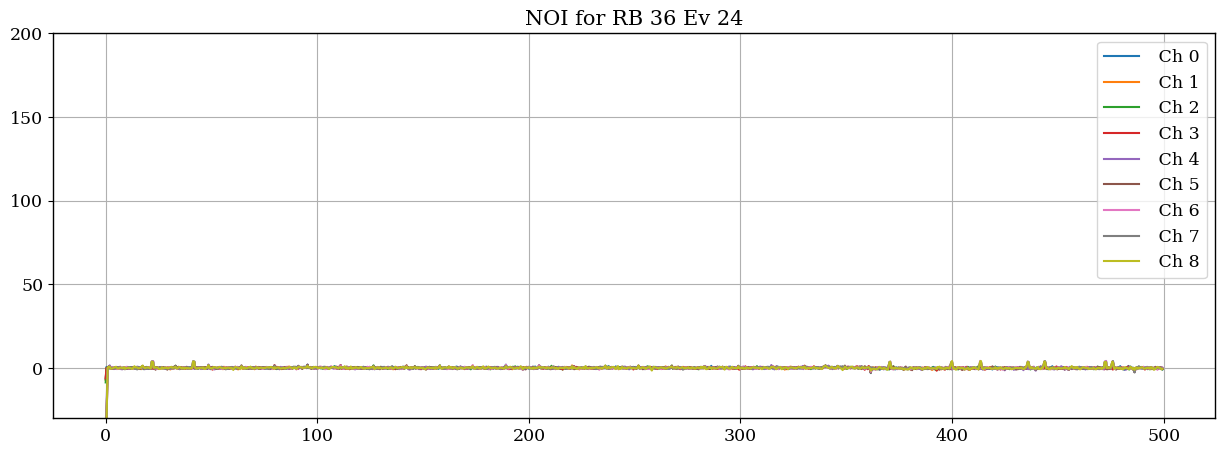

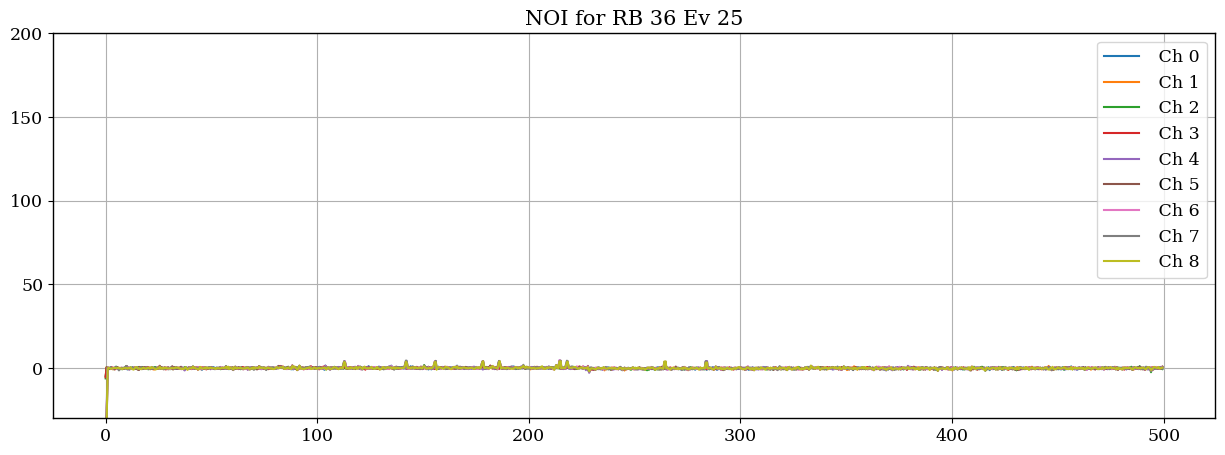

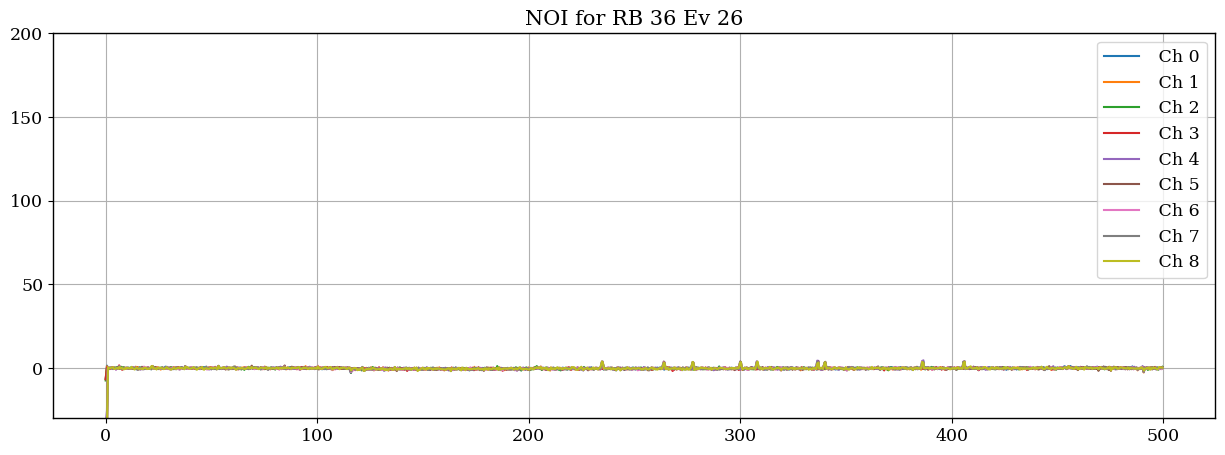

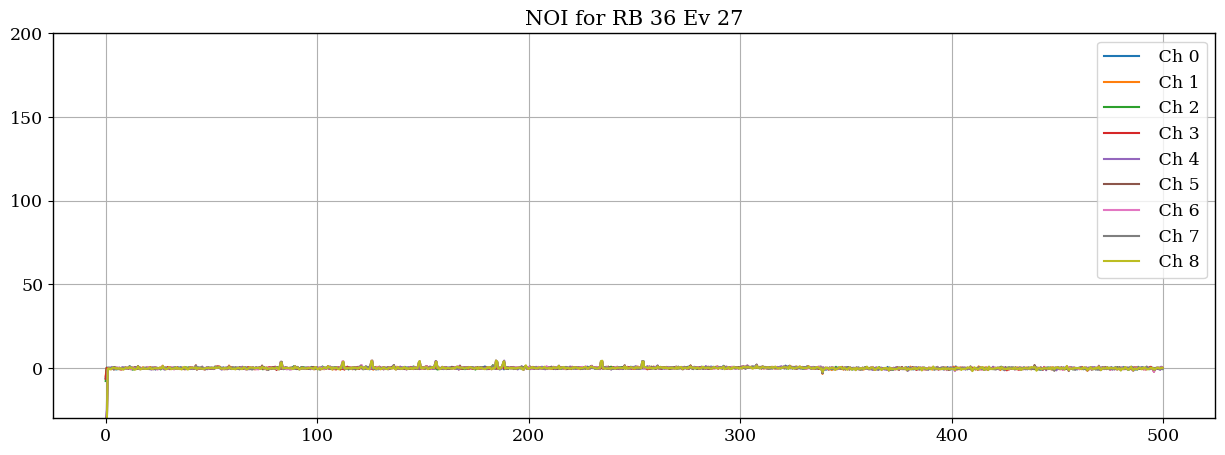

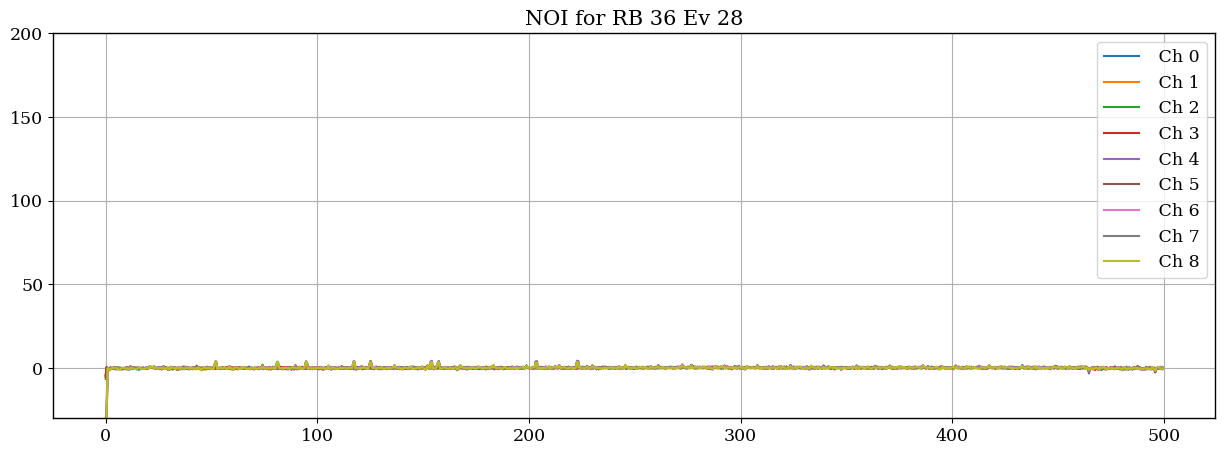

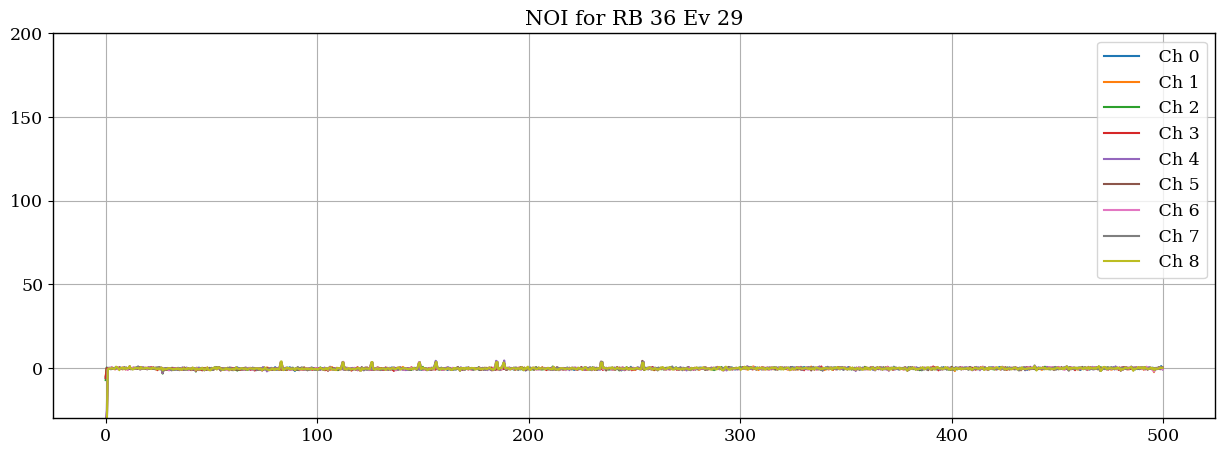

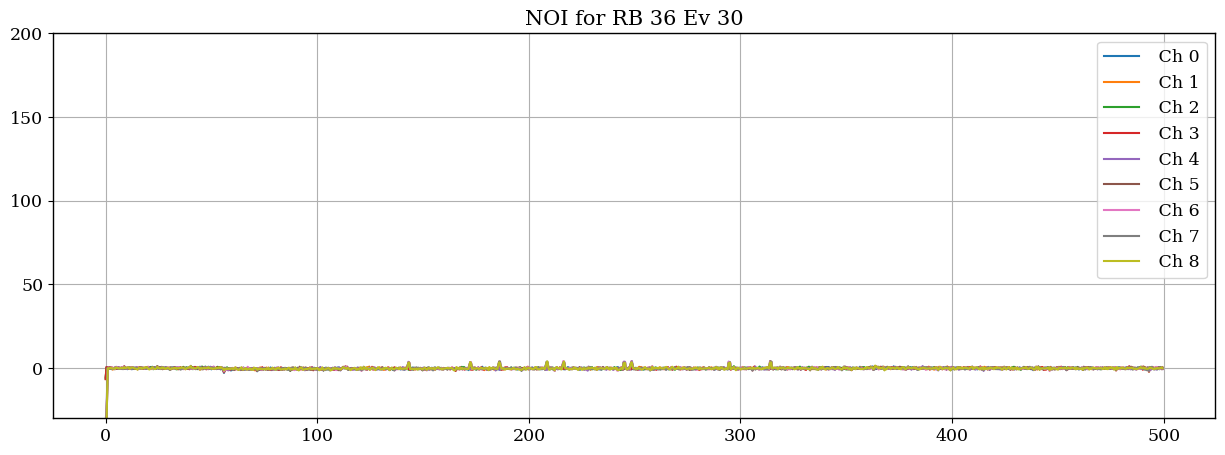

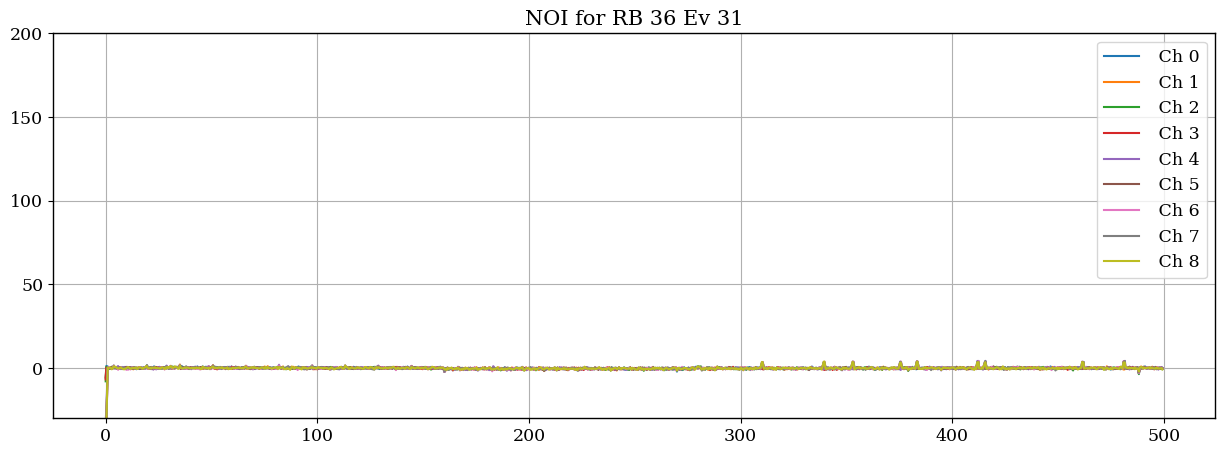

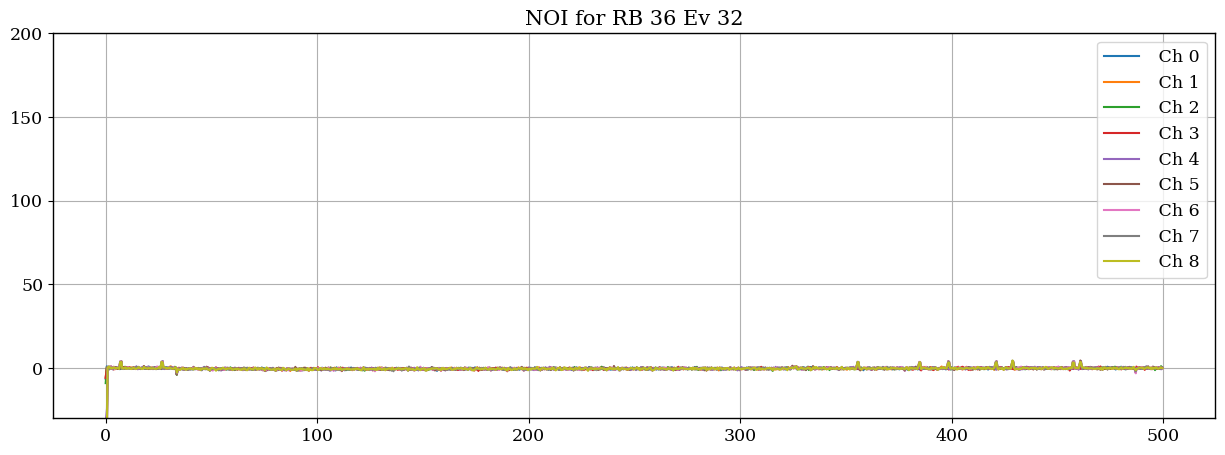

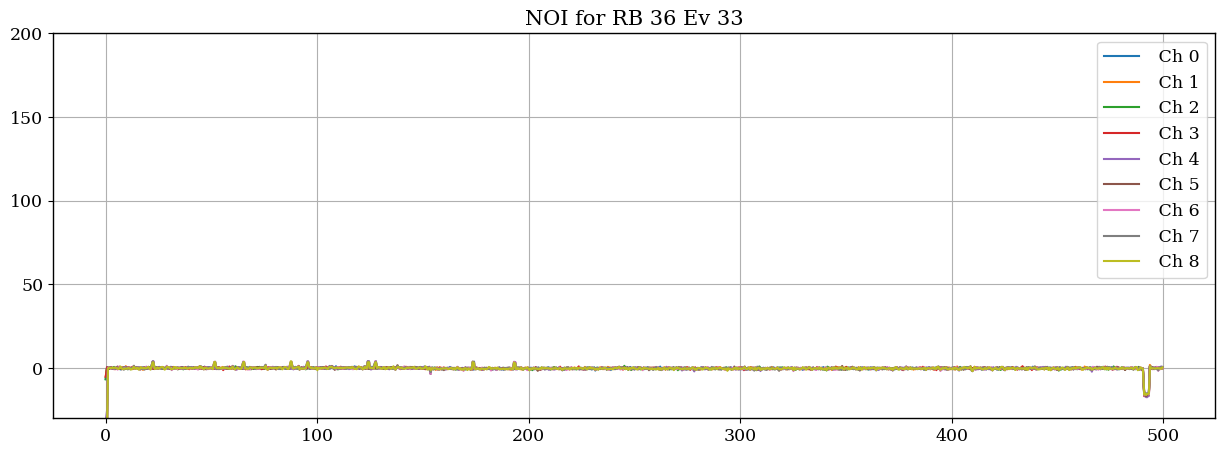

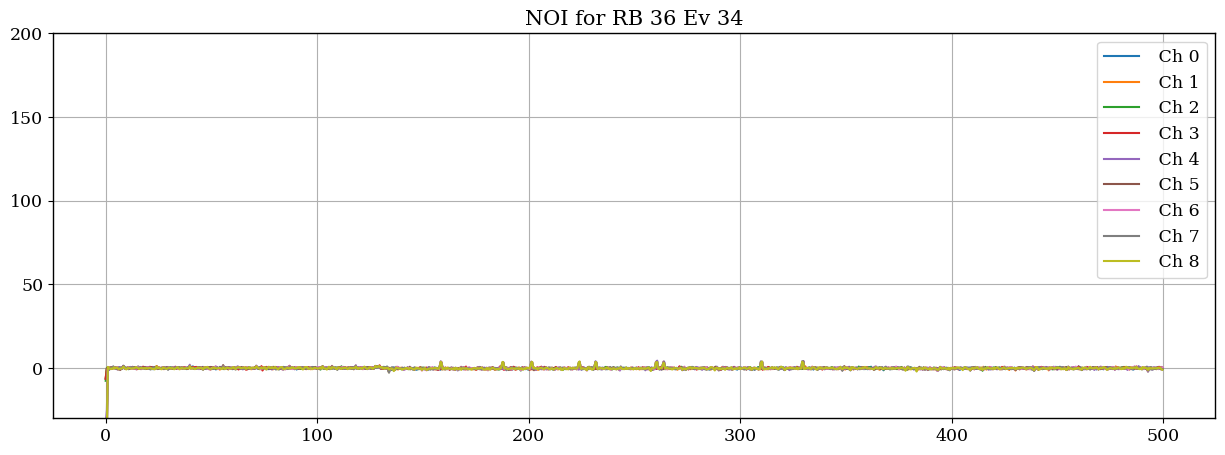

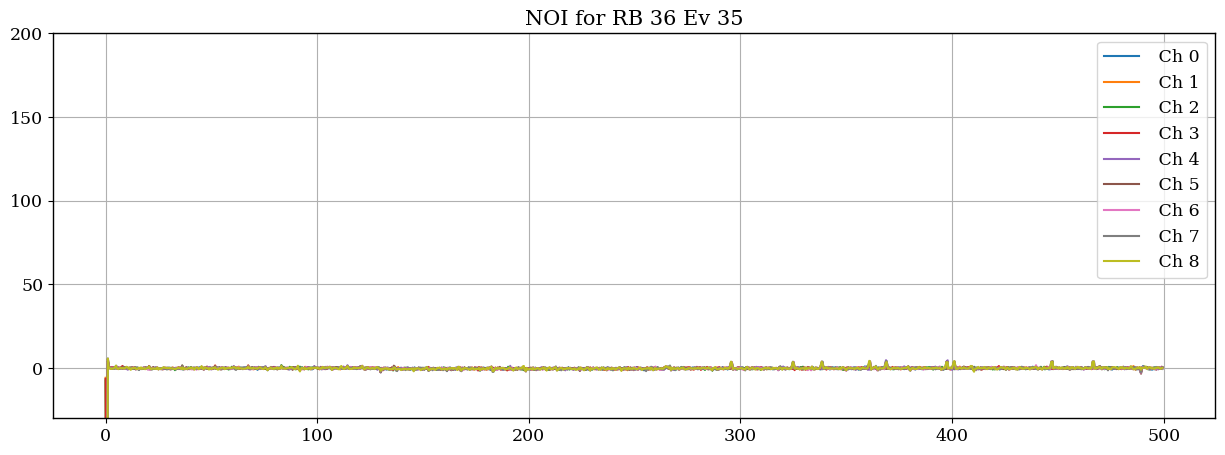

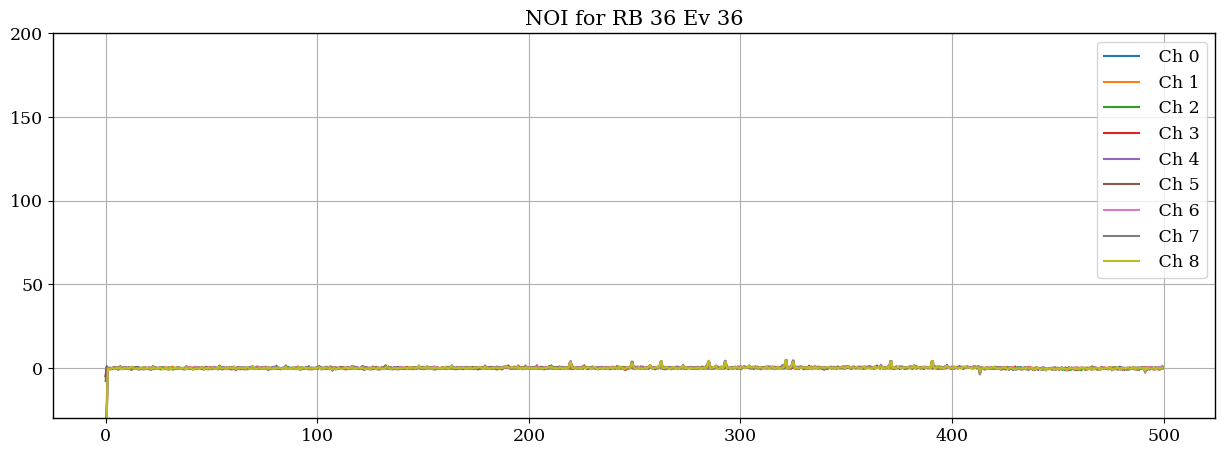

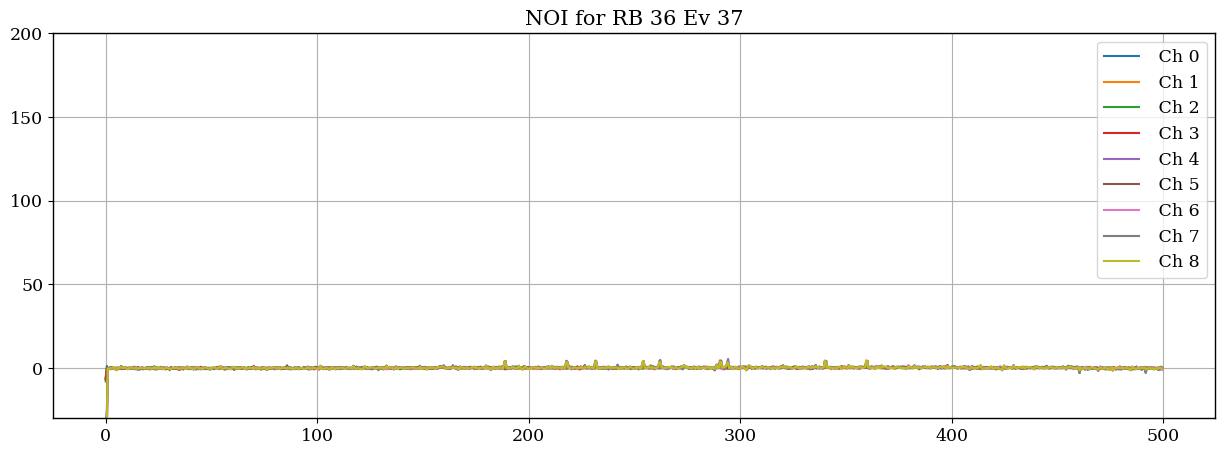

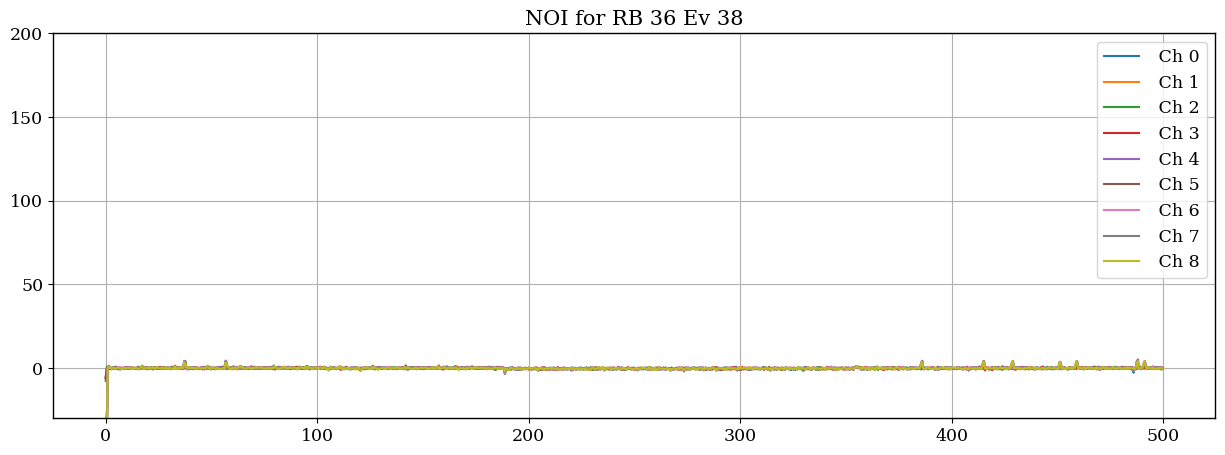

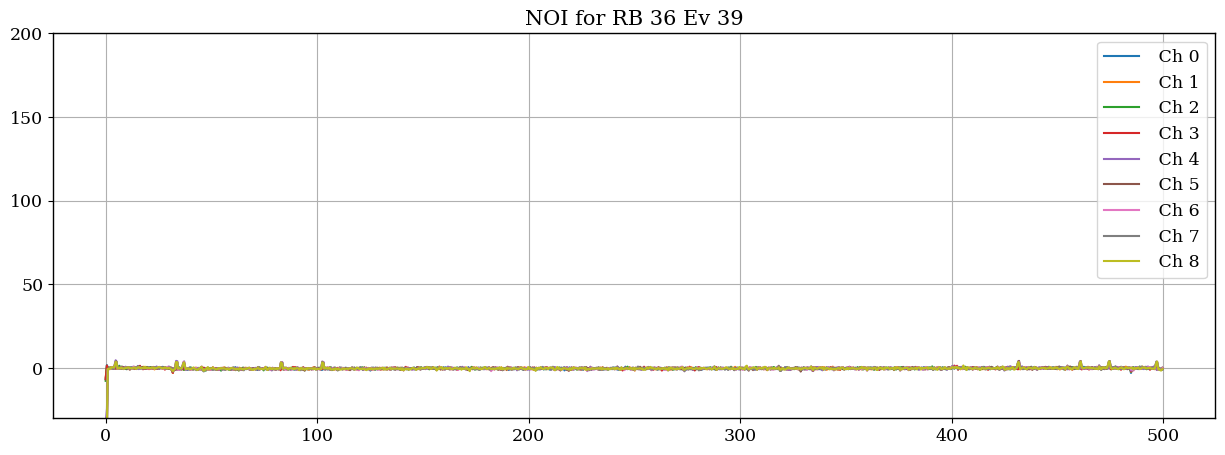

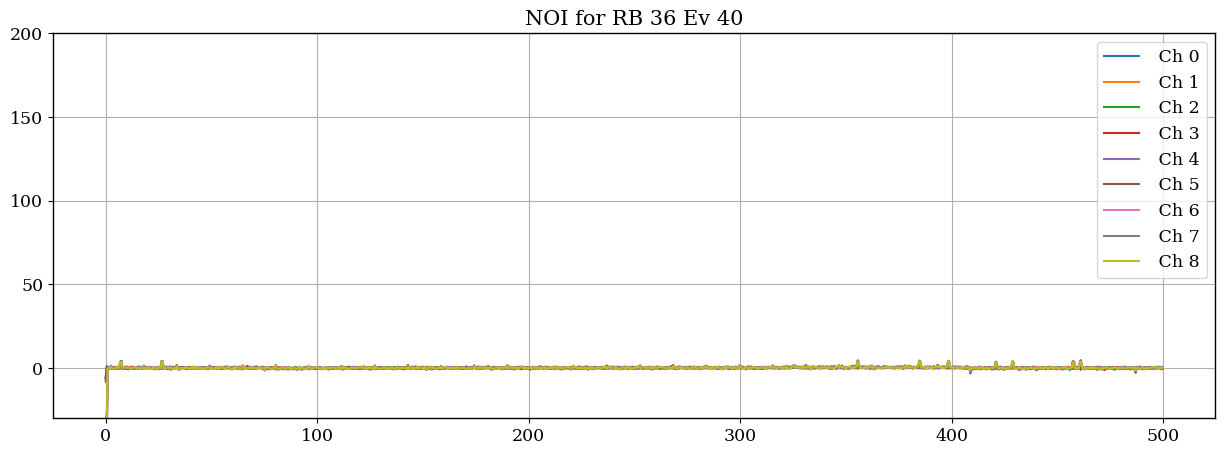

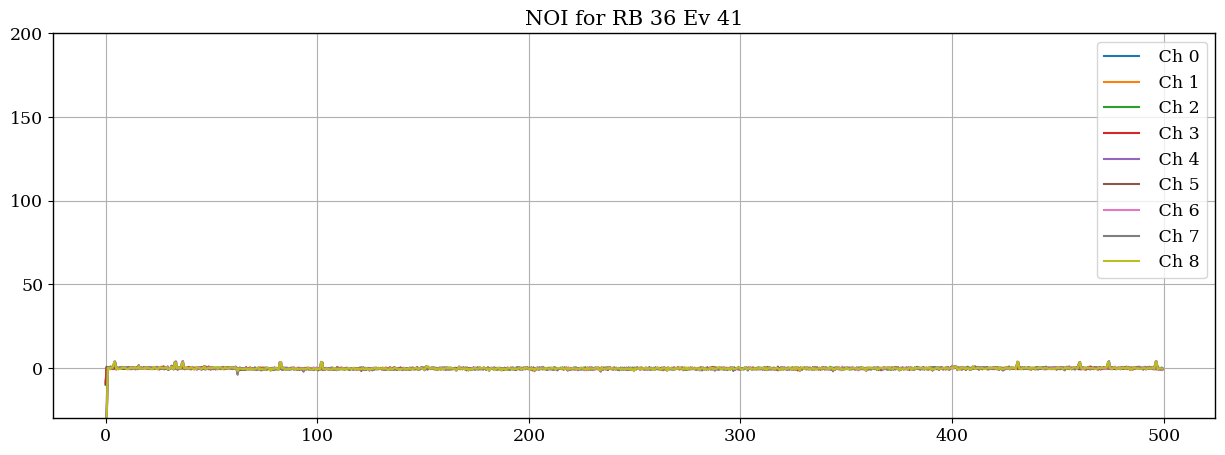

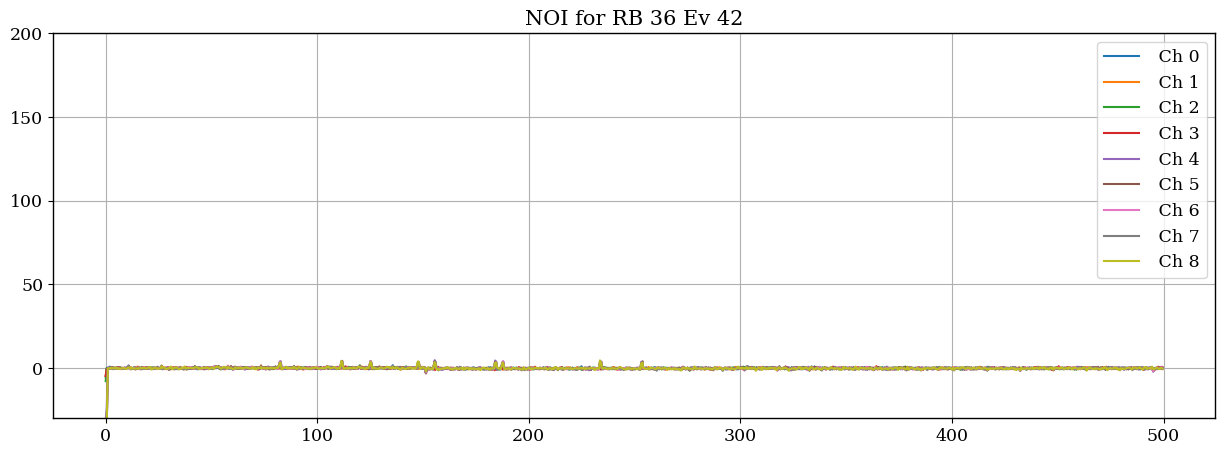

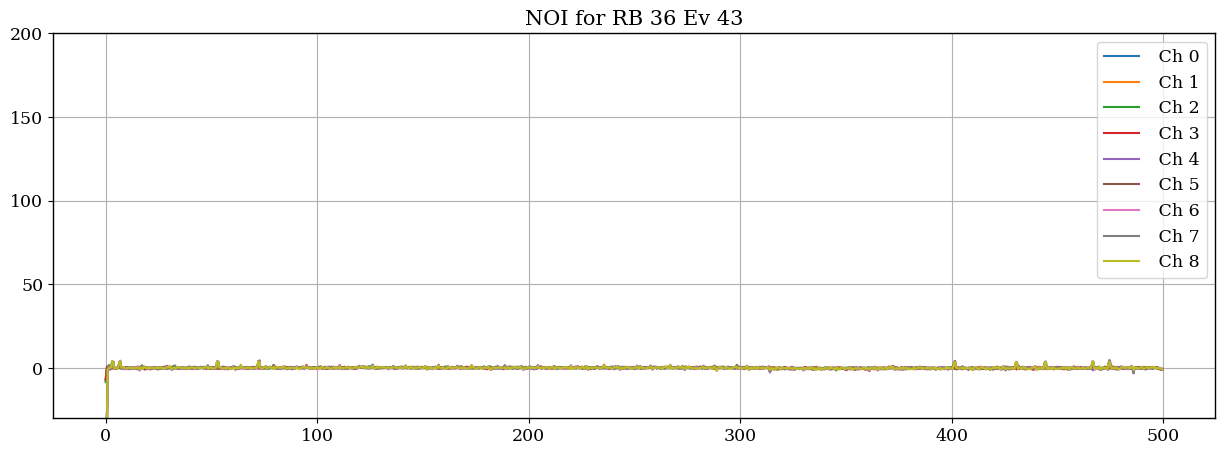

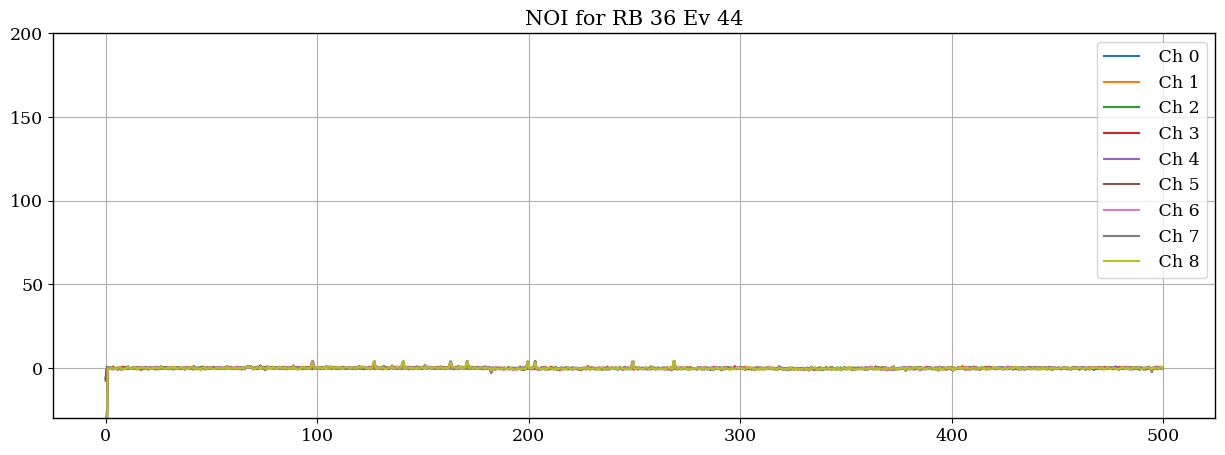

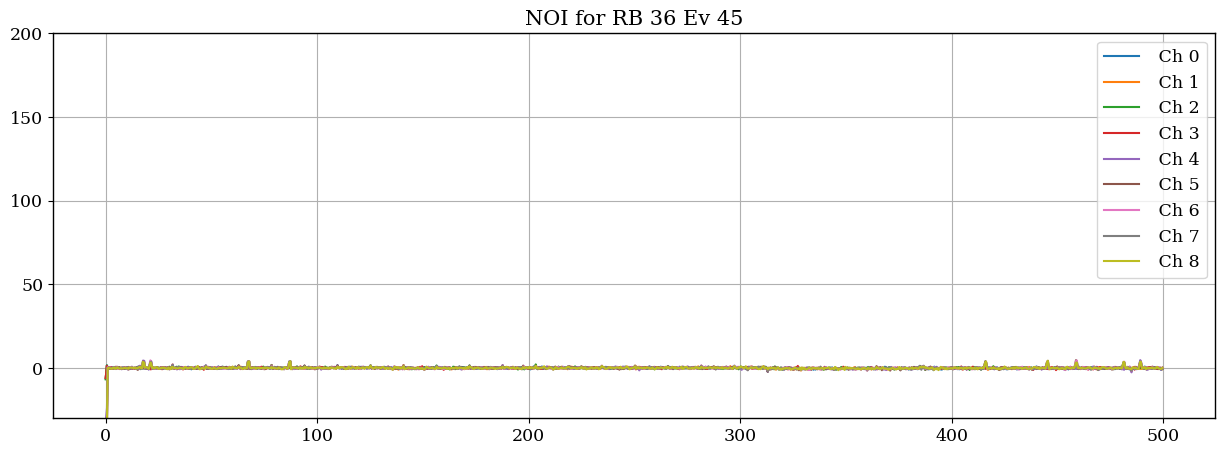

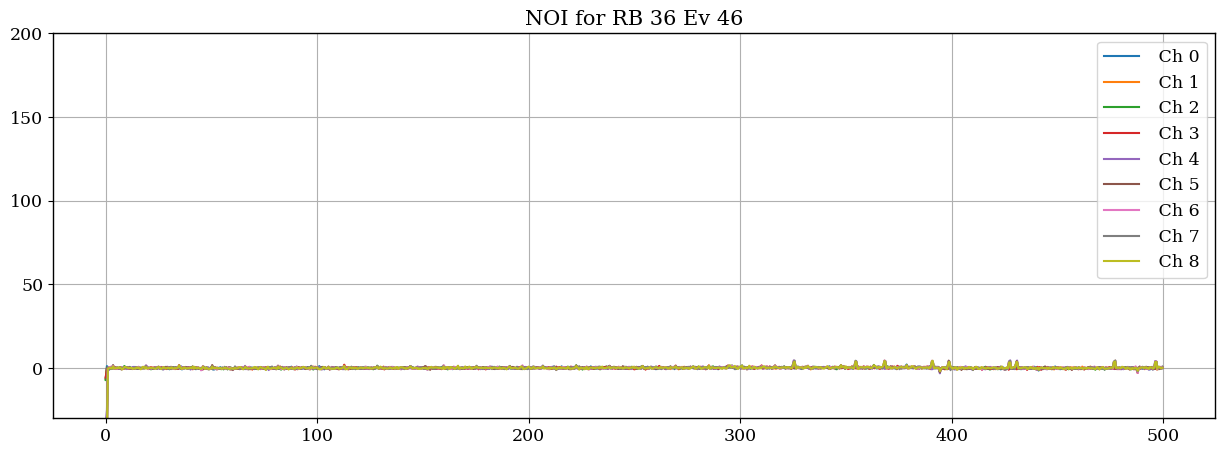

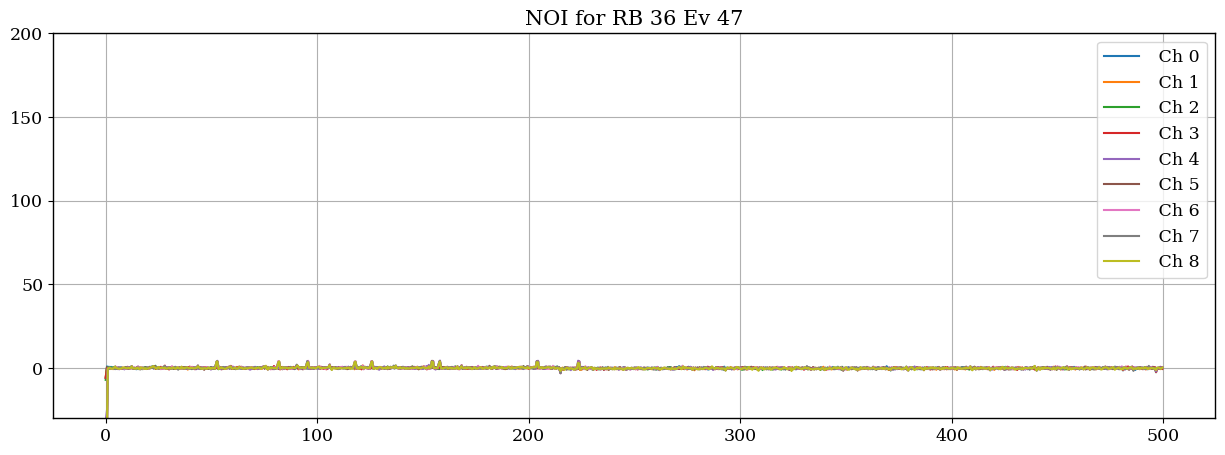

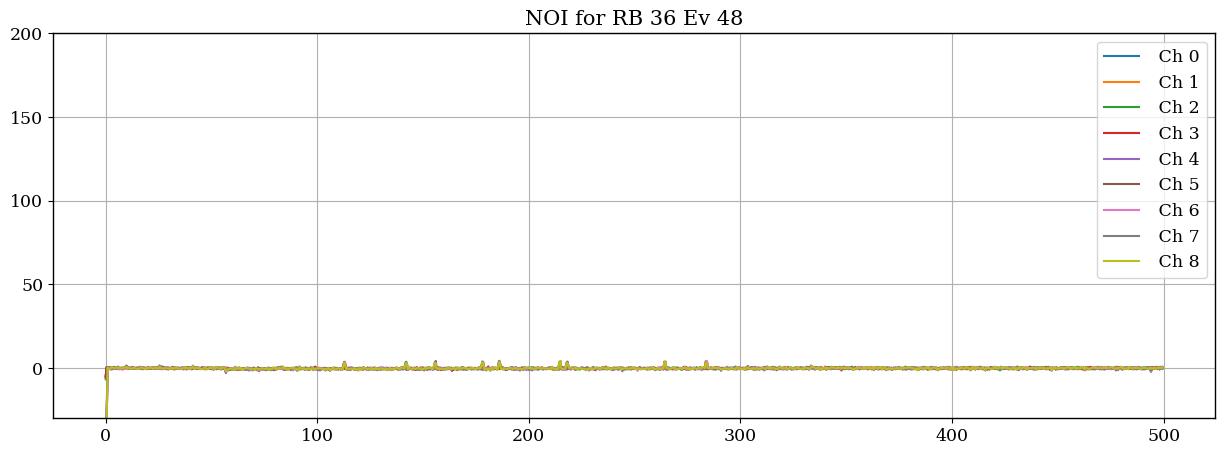

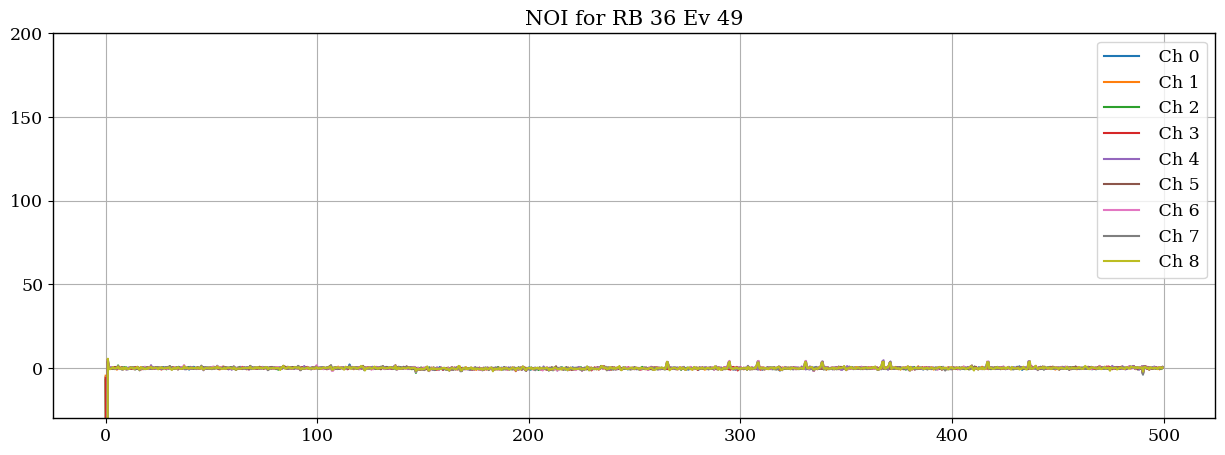

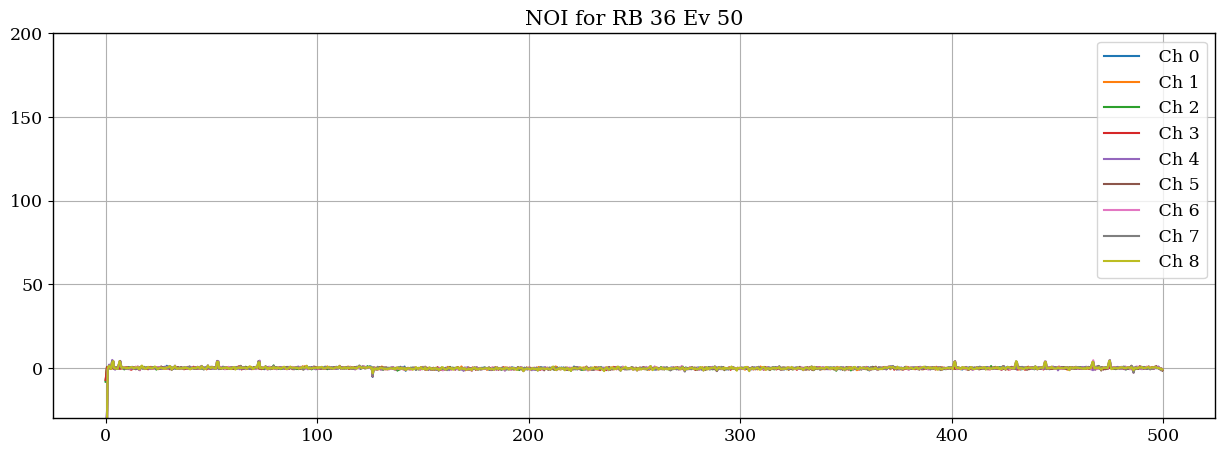

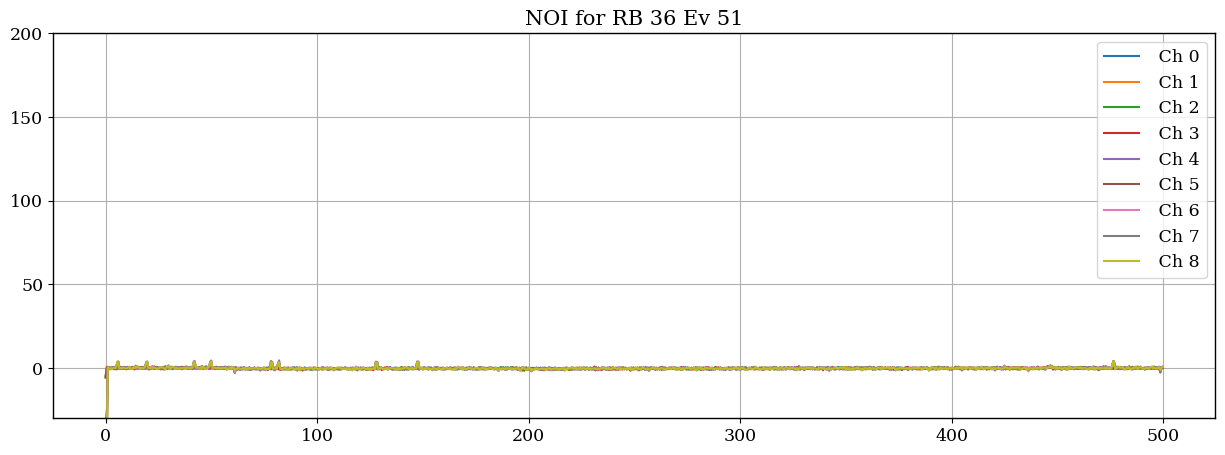

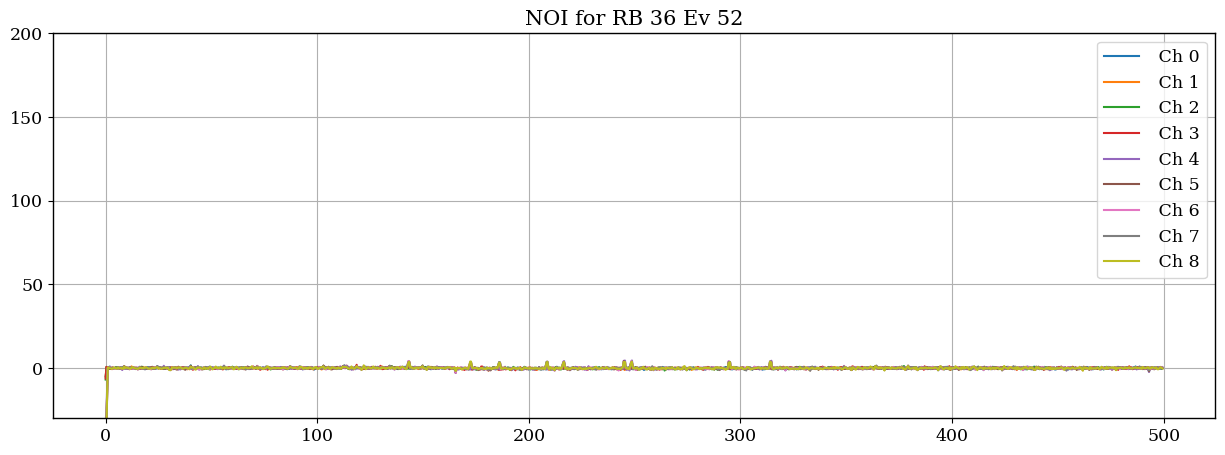

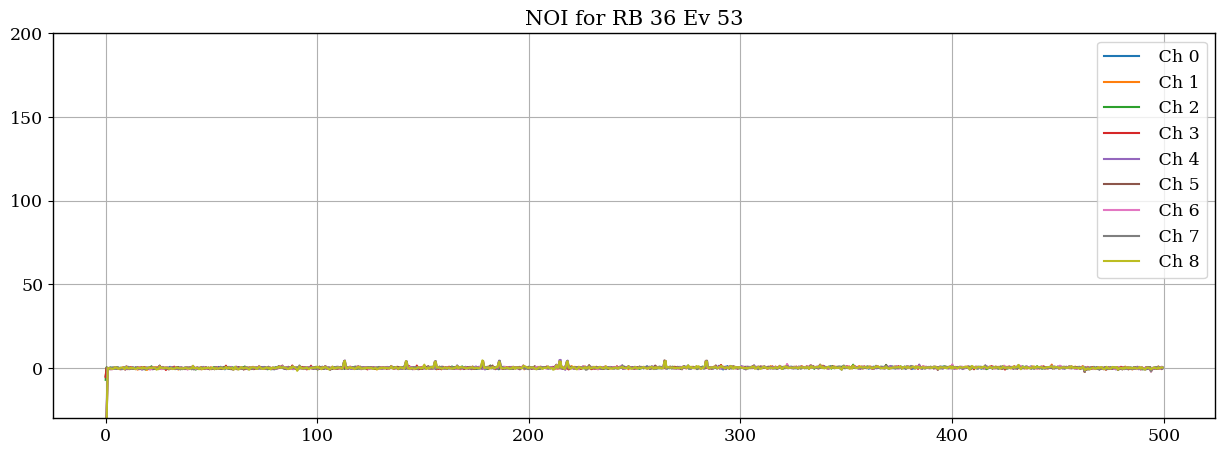

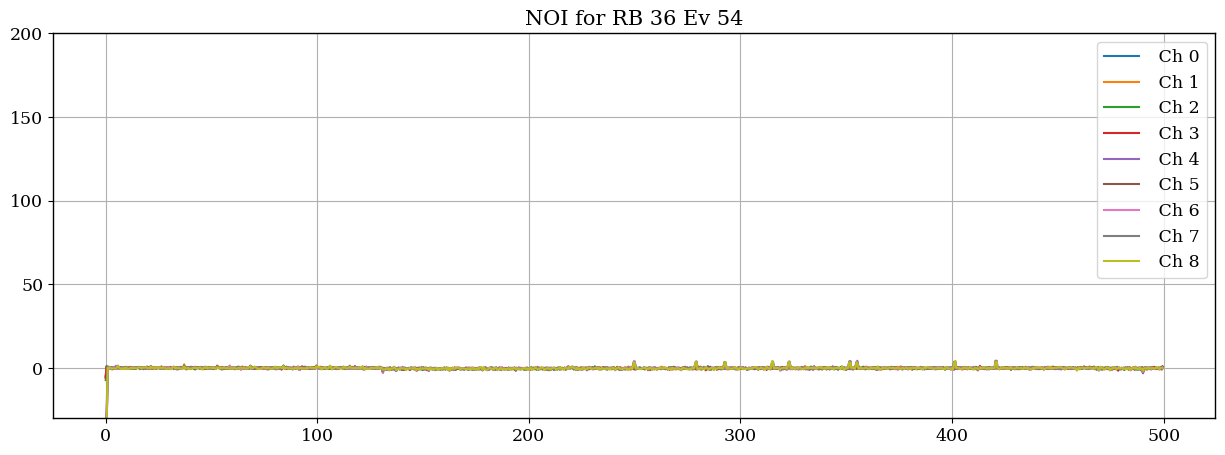

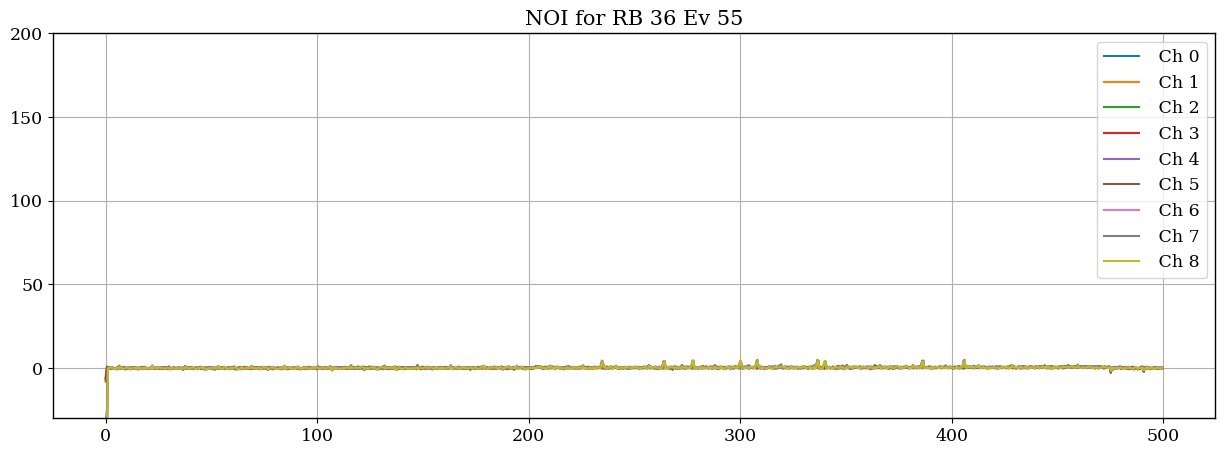

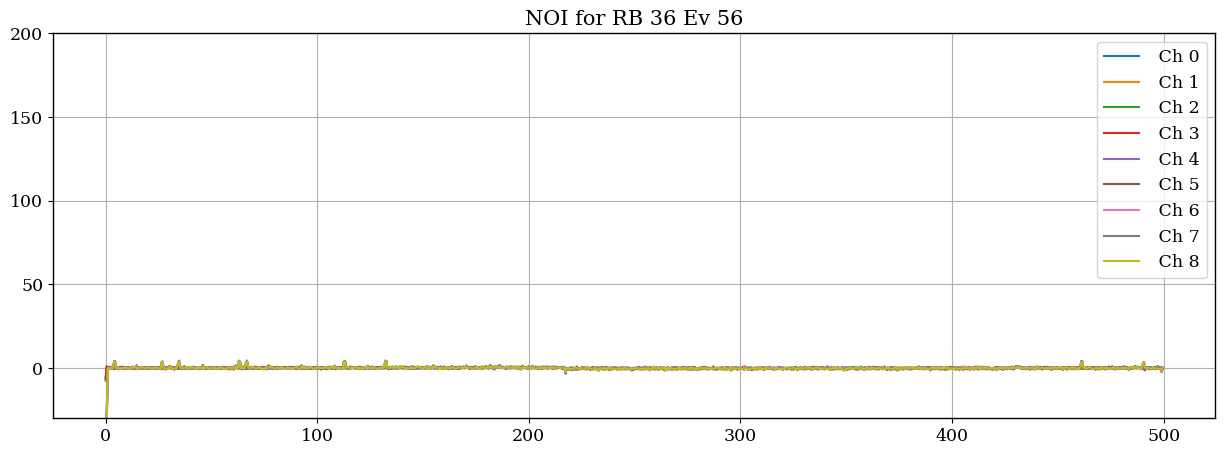

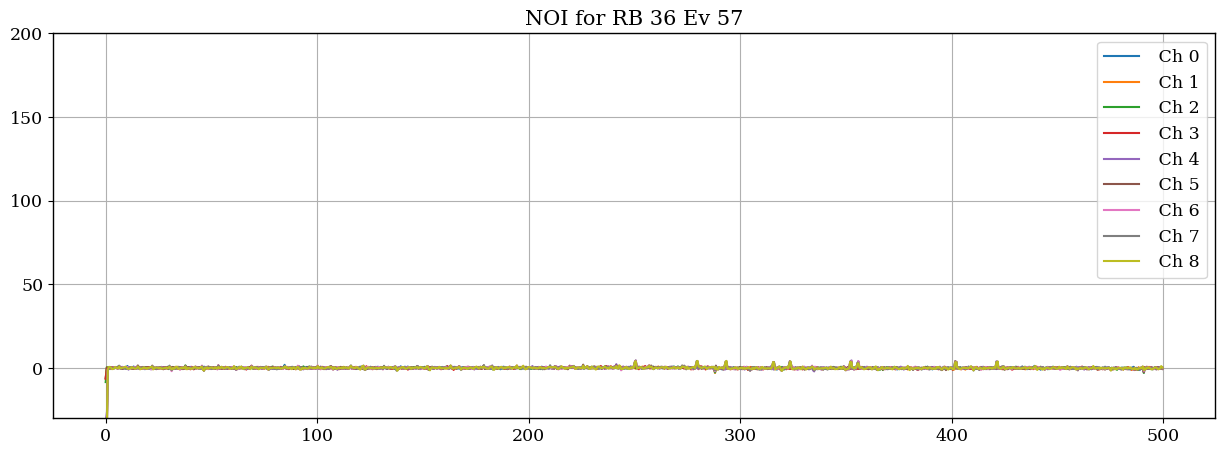

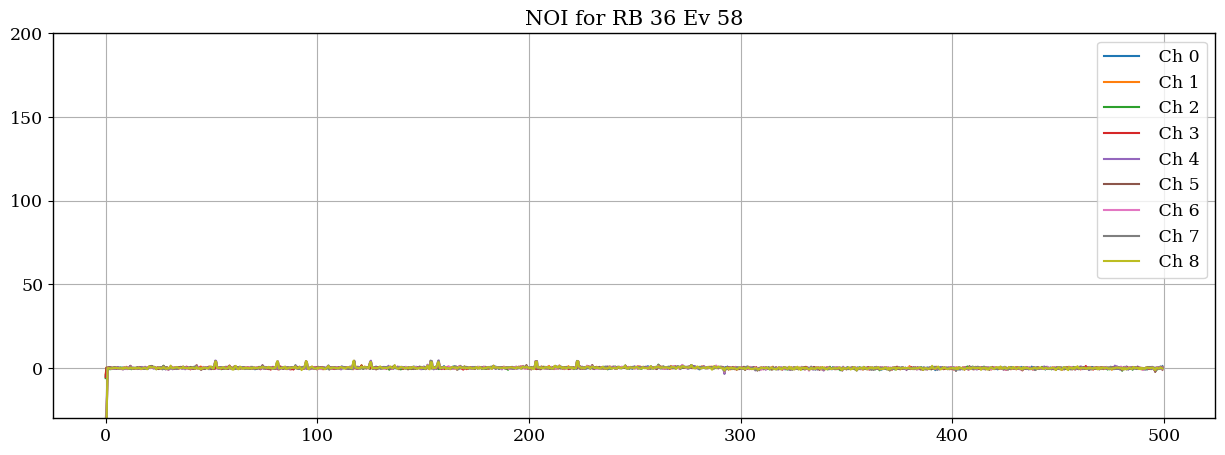

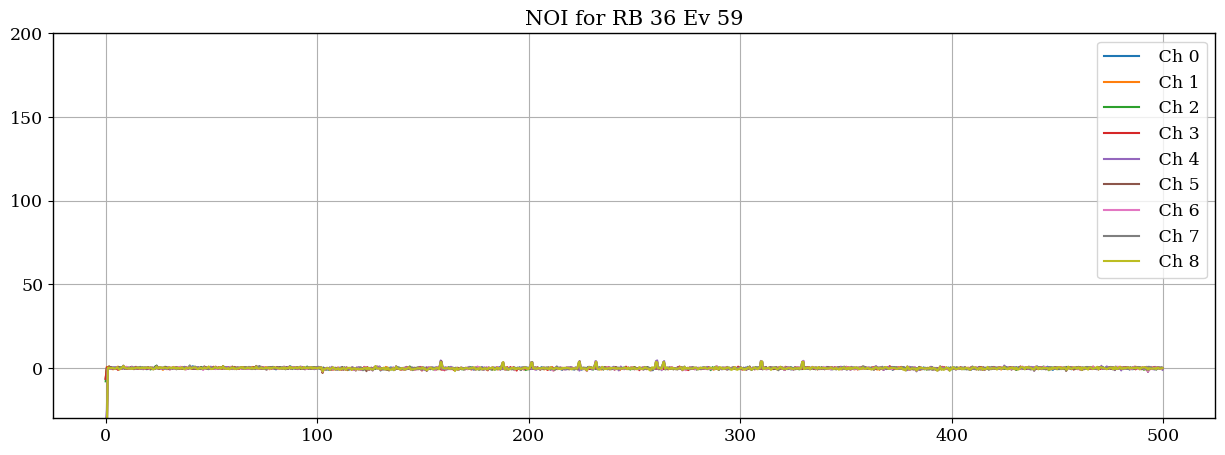

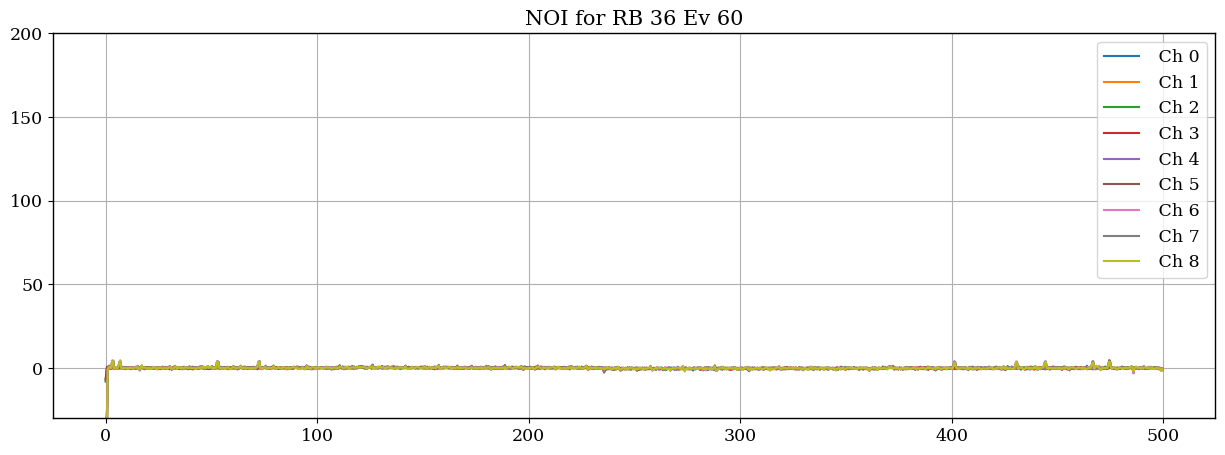

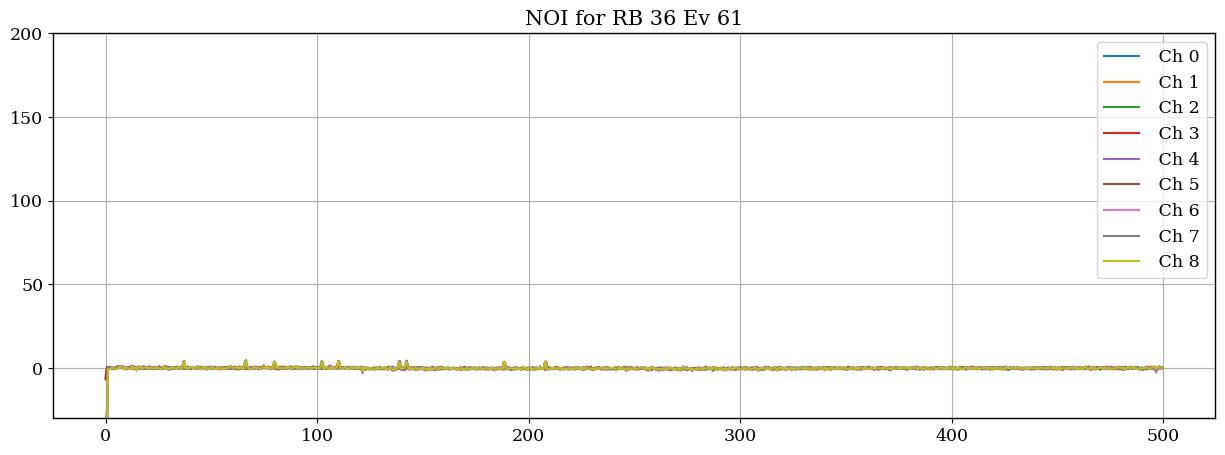

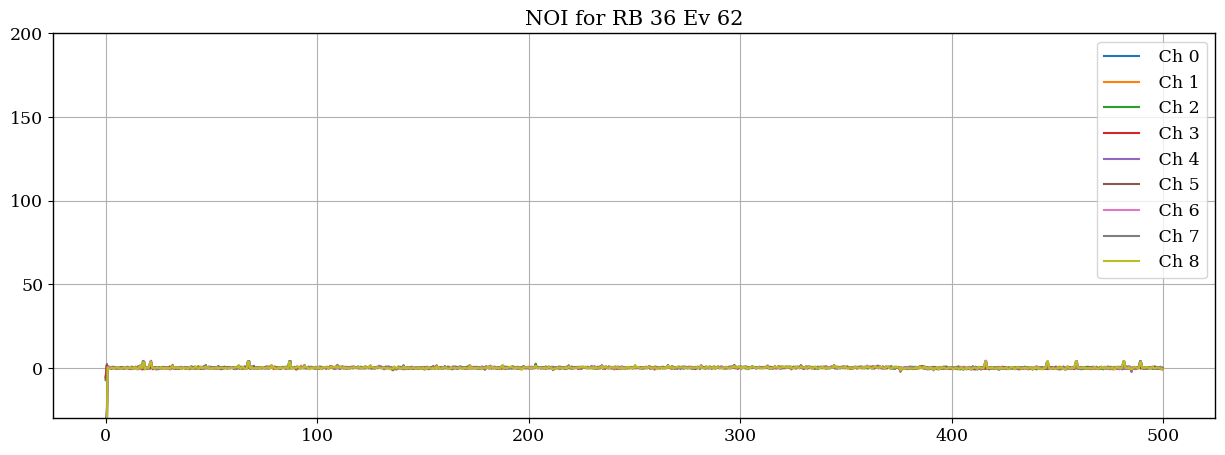

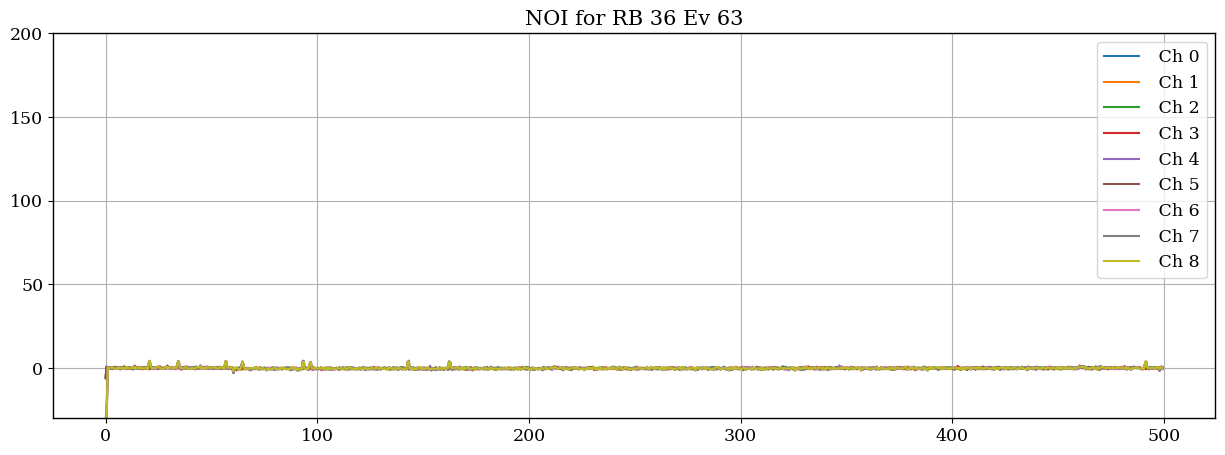

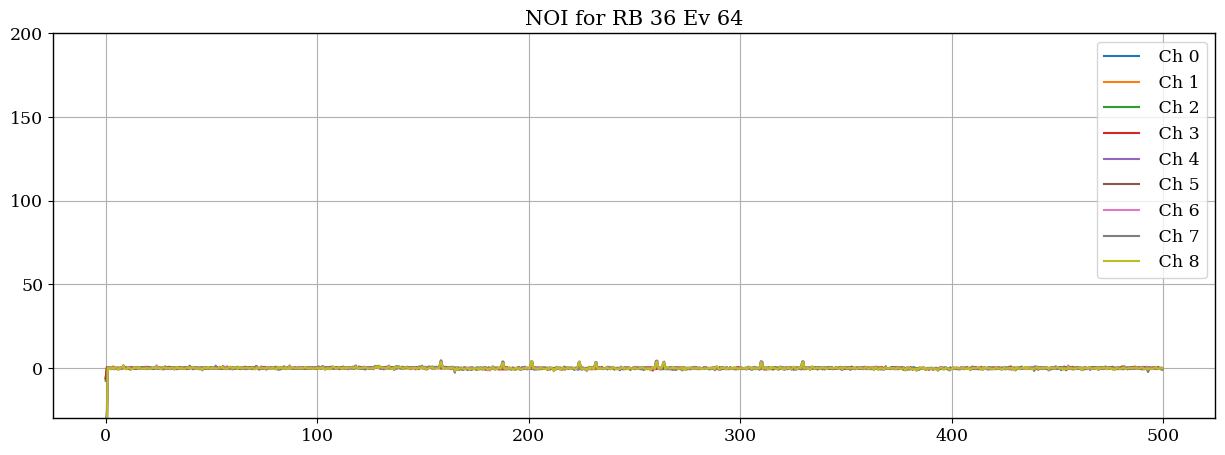

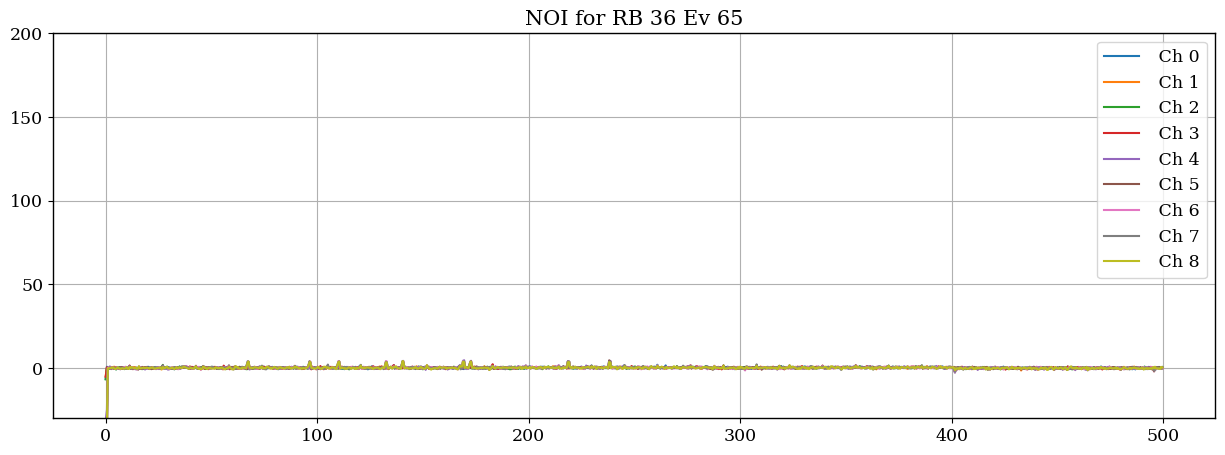

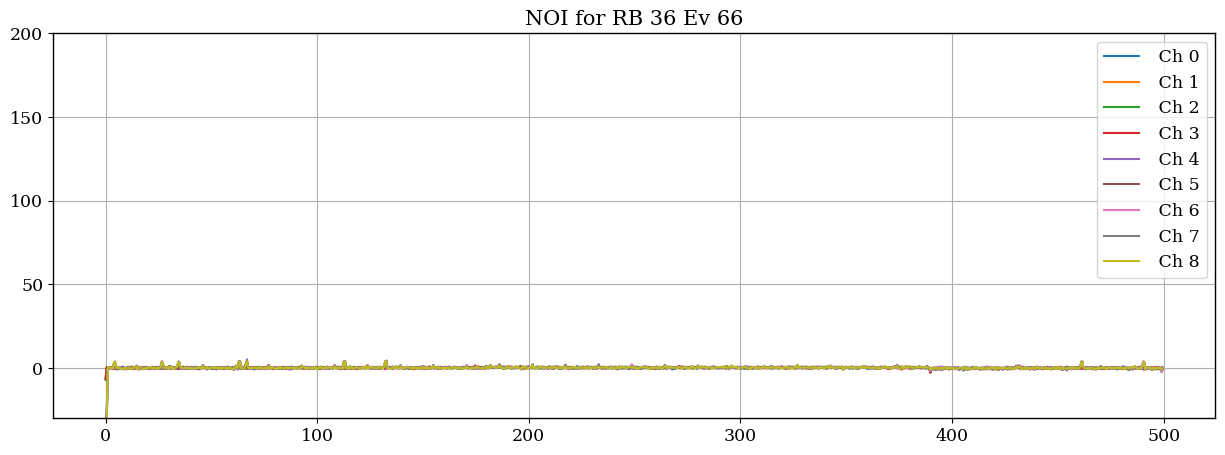

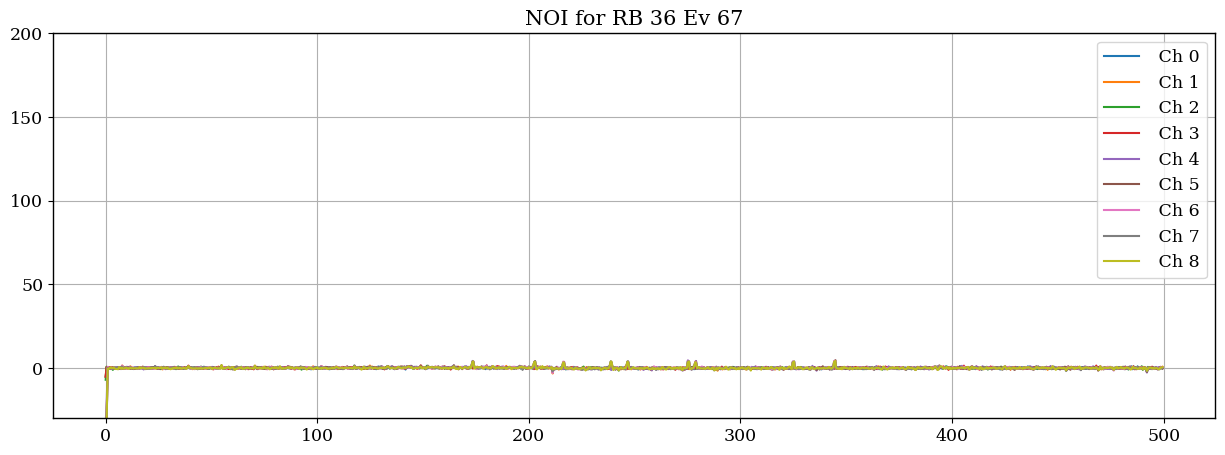

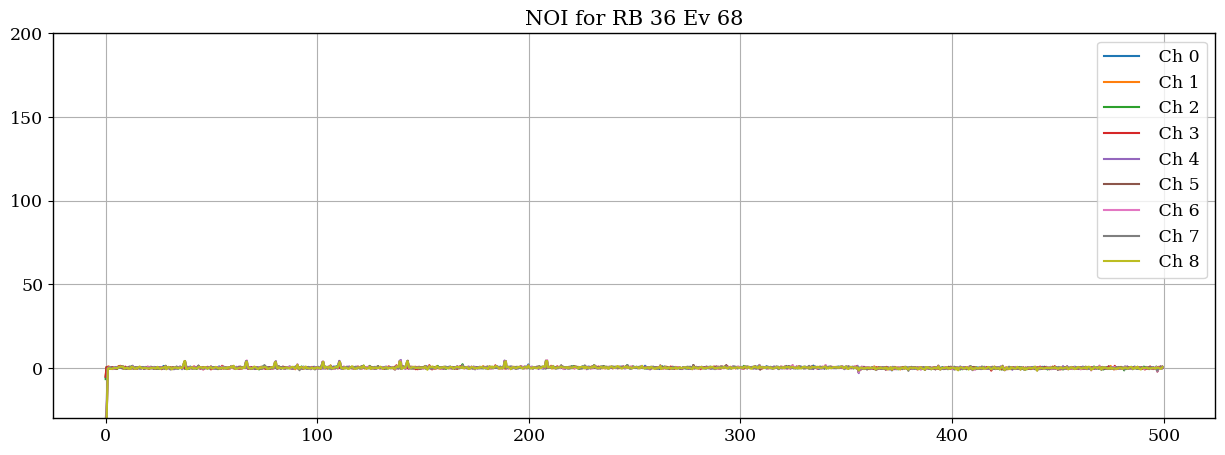

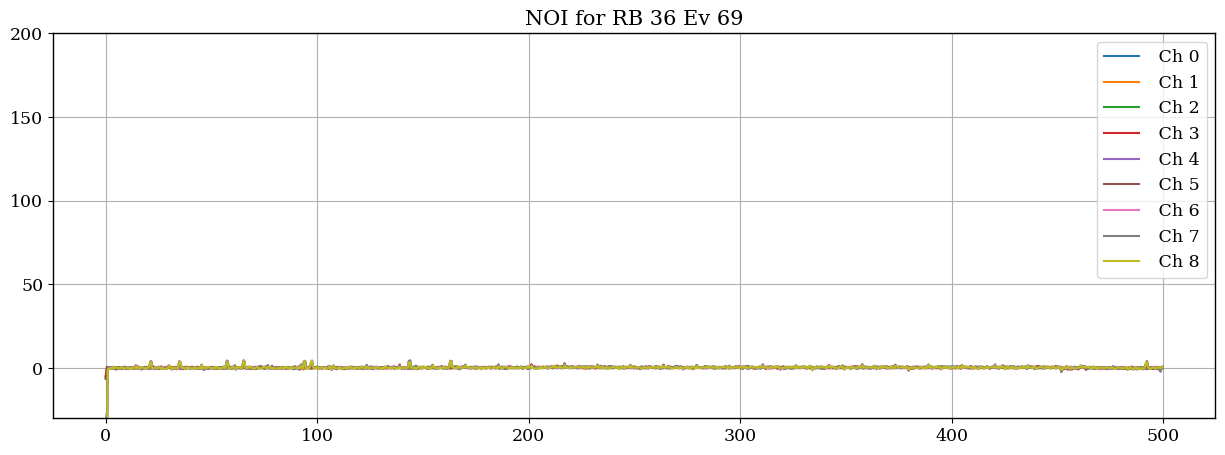

In [11]:
cal = go.cxx_api.RBCalibration.from_califile(calfolder_string + filename[33])

for i in range(70):
    
    ADC = cal.noi_data[i]
    fig,ax = plt.subplots(figsize=(15,5))
    for j in range(9):

        volts = cal.voltages(ADC,j+1)
        times = cal.nanoseconds(ADC,j+1)

        plt.plot(times,volts, label=" Ch " + str(j))
        #plt.plot((np.roll(times,-1)-times[0])[:-2],volts[:-2], label="tbins shifted 1")
    plt.title("NOI for RB " + str(cal.rb_id) + " Ev " + str(i))
    plt.legend()
    plt.ylim(-30,200)
    #plt.xlim(-1,100)
    plt.grid()
    plt.show()